# Eleckart

### Business Understanding-

ElecKart is a leading e-commerce chain based in Ontario, Canada, specialising in electronic products. It sells all major electronic items such as TVs, cameras, OLED screens, and microwaves. The company follows the marketplace model and acts as a platform where buyers and sellers can interact with each other. Sellers can put various products on the website, and buyers purchase these products from them. The company serves as a technology provider for a free but regulated marketplace and deals with all the top-end and low-end brands to cater to different types of customers.

### Problem Statement-

As we studied through Issue tree framework & SPIN Framework. Eleckart facing various issues. As we are part of Eleckart Business Analyst team, Lets evaluate more about major problem Eleckart is facing that is Market Mix Model. We need to develop a market mix model based on the given information and the data sets related to consumer purchases, monthly spends on advertising channels, climatic information and the NPS/stock index.

In [1]:
# Importing Google Drive to Access the file required
# from google.colab import drive
# drive.mount('/content/gdrive')

### Step 1- Importing required Librearies

In [2]:
#Importing warnings to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Pandas & numpy to explore & work on Dataset
import numpy as np
import pandas as pd
from datetime import date, datetime

#Importing libraries for Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Libraries for Model building
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import sklearn

### Step 2- Understanding & Reading Dataset

In [3]:
# As consumer electornics data has \N considering it as null while importing the csv file

consumer_MMM = pd.read_csv(r"C:\Users\Hp\Desktop\Data Science\5. Capstone Project- Eomm\Case Study\ConsumerElectronics.csv", na_values=['\\N', ' '])

consumer_MMM.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
#check the dimensions of the dataframe
consumer_MMM.shape

(1648824, 20)

In [5]:
# Check the type of each column
consumer_MMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [6]:
# let's look at the statistical aspects of the dataframe
consumer_MMM.describe()

,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,sla,cust_id,pincode,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.643920e+06,1.648824e+06,335852.000000,335853.000000,1.648824e+06,1.643920e+06,1.643920e+06,1.648824e+06,1.648824e+06
mean,2.015519e+03,6.585650e+00,2.842445e+15,1.375628e+16,2.461124e+03,1.022087e+00,4.575358,5.248299,5.687832e+00,-7.057686e+15,1.002128e+17,4.108309e+03,5.403451e+00
std,4.996557e-01,3.623351e+00,1.269134e+15,5.594598e+16,5.618842e+03,2.535318e-01,3.382710,12.521473,2.983336e+00,5.327064e+18,5.312979e+18,8.510918e+03,5.346618e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,-98.000000,-5345.000000,0.000000e+00,-9.223351e+18,-9.221830e+18,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602589e+15,1.606725e+15,3.400000e+02,1.000000e+00,3.000000,3.000000,4.000000e+00,-4.616854e+18,-4.414802e+18,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611825e+15,2.619185e+15,7.500000e+02,1.000000e+00,4.000000,5.000000,6.000000e+00,-1.738055e+16,1.240911e+17,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610614e+15,4.397706e+15,1.999000e+03,1.000000e+00,6.000000,7.000000,7.000000e+00,4.603580e+18,4.786651e+18,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,238.000000,278.000000,1.006000e+03,9.223362e+18,9.222980e+18,2.999990e+05,1.000000e+03


### Data Cleaning & Preparation

In [7]:
# Treating Order_date in datetime Format
consumer_MMM['order_datetime'] = pd.to_datetime(consumer_MMM['order_date'], format='%Y-%m-%d %H:%M:%S')

#Removing notation in the following collumns
consumer_MMM['cust_id']=  consumer_MMM['cust_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_MMM['order_id']=  consumer_MMM['order_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_MMM['order_item_id']=  consumer_MMM['order_item_id'].apply(lambda x: '{:.0f}'.format(x))
consumer_MMM['pincode']=  consumer_MMM['pincode'].apply(lambda x: '{:.0f}'.format(x))

In [8]:
# Creating "order_date" column from "order_datetime" column

consumer_MMM['order_date'] = consumer_MMM['order_datetime'].dt.date

### As Instructed to use the data from July 2015 to June 2016

In [9]:
# Lets sort our data in DateRange given:-

start_date = pd.to_datetime("2015-07-01").date()
end_date = pd.to_datetime("2016-06-30").date()

len(consumer_MMM.loc[(consumer_MMM.order_date <= start_date) | (consumer_MMM.order_date >= end_date)])

3909

In [10]:
consumer_MMM = consumer_MMM.loc[(consumer_MMM['order_date']>=start_date) 
                                                      | (consumer_MMM['order_date']<=end_date)]

In [11]:
# Lets create "order_week" Column as we need to create Model aggregated weekly
consumer_MMM['order_week'] = consumer_MMM['order_datetime'].dt.week

In [12]:
# Let's check week along with order date for year 2016 to verify the order weeek for our analysis
consumer_MMM.loc[(consumer_MMM.Year == 2016) & (consumer_MMM.Month==2)].loc[:,['order_date','order_week']].sort_values(by='order_date')

,order_date,order_week
684144,2016-02-01,5
755727,2016-02-01,5
739407,2016-02-01,5
776179,2016-02-01,5
749413,2016-02-01,5
...,...,...
708404,2016-02-29,9
708403,2016-02-29,9
708402,2016-02-29,9
659065,2016-02-29,9


In [13]:
# Therefore the order weeks need to be changed in order for them to be continuous from 2015 for our analysis

def mapWeek(order_week,year):
    if((year == 2016) & (order_week <= 26)):
         return order_week+53
    else:
        return order_week

In [14]:
consumer_MMM['order_week'] = consumer_MMM.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [15]:
consumer_MMM.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,NaN,NaN,...,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,NaN,NaN,...,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,NaN,NaN,...,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,NaN,NaN,...,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,NaN,NaN,...,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


### Duplicate Entries 

In [16]:
# As through description on Columns we can see "'order_item_id', 'order_id', 'order_date'" are Unique id's, Lets check if there are any Duplicates

len(consumer_MMM[consumer_MMM.duplicated(['order_date', 'order_id', 'order_item_id'])])

136591

In [17]:
# Lets remove all Duplicate id from Dataset, Because they can affect our Analysis.

consumer_MMM = consumer_MMM[~consumer_MMM.duplicated(['order_date', 'order_id', 'order_item_id'])]

In [18]:
consumer_MMM.shape

(1512233, 22)

In [19]:
consumer_MMM.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla', 'order_datetime',
       'order_week'],
      dtype='object')

In [20]:
# let's check the null percentage for each column
round(100*(consumer_MMM.isnull().sum()/len(consumer_MMM.index)), 2).sort_values(ascending = False)

deliverybdays                      78.29
deliverycdays                      78.29
product_analytic_vertical           0.38
gmv                                 0.26
fsn_id                              0.00
pincode                             0.00
order_datetime                      0.00
product_procurement_sla             0.00
product_mrp                         0.00
product_analytic_sub_category       0.00
product_analytic_category           0.00
product_analytic_super_category     0.00
sla                                 0.00
cust_id                             0.00
order_date                          0.00
s1_fact.order_payment_type          0.00
units                               0.00
order_item_id                       0.00
order_id                            0.00
Month                               0.00
Year                                0.00
order_week                          0.00
dtype: float64

In [21]:
# As we can see deliverybdays & deliverycdays have 79.63% Null values, we have to drop that colums.

consumer_MMM.drop(['deliverybdays', 'deliverycdays'], axis = 1, inplace = True)

In [22]:
# As product_analytic_vertical & gmv column have some Null values we will drop that rows, So it wont affect our analysis.

consumer_MMM = consumer_MMM.loc[~pd.isnull(consumer_MMM['product_analytic_vertical'])]

consumer_MMM = consumer_MMM.loc[~pd.isnull(consumer_MMM['gmv'])]

In [23]:
round(100*(consumer_MMM.isnull().sum()/len(consumer_MMM.index)), 2).sort_values(ascending = False)

fsn_id                             0.0
order_date                         0.0
order_datetime                     0.0
product_procurement_sla            0.0
product_mrp                        0.0
product_analytic_vertical          0.0
product_analytic_sub_category      0.0
product_analytic_category          0.0
product_analytic_super_category    0.0
pincode                            0.0
cust_id                            0.0
sla                                0.0
s1_fact.order_payment_type         0.0
units                              0.0
gmv                                0.0
order_item_id                      0.0
order_id                           0.0
Month                              0.0
Year                               0.0
order_week                         0.0
dtype: float64

### As mentioned in problem statement we need to make Market mix model for three product subcategories: Camera Accessory, Home Audio, and Gaming Accessory.
#### Lets keep all necessary columns & remove columns which wont be helpful

In [24]:
consumer_MMM.product_analytic_super_category.unique()

array(['CE'], dtype=object)

In [25]:
consumer_MMM.product_analytic_category.unique()

array(['CameraAccessory', 'GamingHardware', 'EntertainmentSmall',
       'GameCDDVD', 'Camera'], dtype=object)

In [26]:
consumer_MMM.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

In [27]:
# Keeping Neccessary rows with sub categories Needed for Model Building

consumer_MMM = consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='CameraAccessory') |
                       (consumer_MMM.product_analytic_sub_category=='GamingAccessory')|
                       (consumer_MMM.product_analytic_sub_category=='HomeAudio')]

In [28]:
consumer_MMM.product_analytic_vertical.unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

In [29]:
consumer_MMM.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000,3419300926147000,6400.0,1,COD,5,-1012991307785880064,-7791755829057349632,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200,1420830839915200,6900.0,1,COD,7,-8990324579055120384,7335411490974310400,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [30]:
# Mode of payments 
consumer_MMM['s1_fact.order_payment_type'].astype('category').value_counts()

COD        377094
Prepaid    136992
Name: s1_fact.order_payment_type, dtype: int64

### Product mrp

In [31]:
#Let's check if we have transactions where MRP of the product is 0
len(consumer_MMM.loc[consumer_MMM.product_mrp == 0])

3083

In [32]:
# Lets drop "product_mrp == 0" as it wont help us in Analysis
consumer_MMM = consumer_MMM.loc[consumer_MMM.product_mrp != 0]

In [33]:
# Lets verify the changes we have made 
len(consumer_MMM.loc[consumer_MMM.product_mrp == 0])

0

### gmv

In [34]:
len(consumer_MMM.loc[consumer_MMM.gmv == 0])

236

In [35]:
# Lets drop "gmv == 0" as gmv means Revenue if its 0 not helping in analysis. Imputing also wont help much
consumer_MMM = consumer_MMM.loc[~(consumer_MMM.gmv == 0)]

In [36]:
# Lets verify the changes we have made 
len(consumer_MMM.loc[consumer_MMM.gmv == 0])

0

### product_mrp vs gmv

In [37]:
# Lets check the gmv(Revenue) > mrp, Because practically its not possible
len(consumer_MMM.loc[consumer_MMM.gmv > (consumer_MMM.product_mrp * consumer_MMM.units)])

12448

In [38]:
# Lets drop the same
consumer_MMM= consumer_MMM.loc[consumer_MMM.gmv <= (consumer_MMM.product_mrp * consumer_MMM.units)]

## Outlier treatment

In [39]:
consumer_MMM.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000
mean,2015.577457,6.221990,1292.778864,1.024203,5.861274,2535.200548,2.563966,55.855578
std,0.493964,3.674516,2441.603152,0.239916,2.700607,4741.281316,1.721561,13.530814
min,2015.000000,1.000000,10.000000,1.000000,0.000000,99.000000,-1.000000,21.000000
25%,2015.000000,3.000000,299.000000,1.000000,4.000000,790.000000,2.000000,45.000000
50%,2016.000000,6.000000,549.000000,1.000000,6.000000,1250.000000,2.000000,56.000000
75%,2016.000000,10.000000,1529.000000,1.000000,7.000000,2899.000000,3.000000,67.000000
max,2016.000000,12.000000,148050.000000,39.000000,60.000000,180000.000000,15.000000,79.000000


<AxesSubplot:ylabel='product_procurement_sla'>

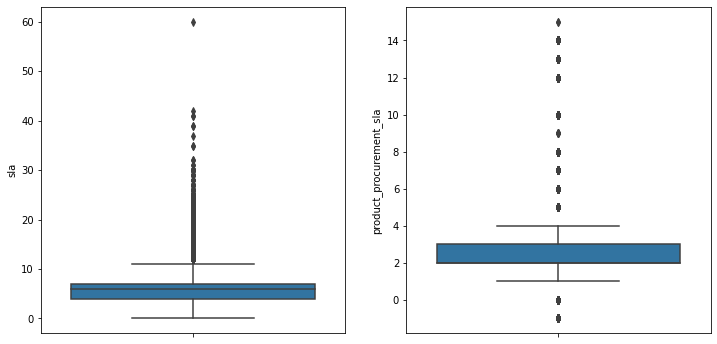

In [40]:
# Checking outliers for "sla" & "product_procurement_sla" with boxplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=consumer_MMM.sla)

plt.subplot(1,2,2)
sns.boxplot(y=consumer_MMM.product_procurement_sla)

In [41]:
# Checking outliers for "sla" 

consumer_MMM.sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.95,0.99,1.0])

count    498319.000000
mean          5.861274
std           2.700607
min           0.000000
0%            0.000000
25%           4.000000
50%           6.000000
75%           7.000000
95%          11.000000
99%          14.000000
100%         60.000000
max          60.000000
Name: sla, dtype: float64

In [42]:
# Lets cap "sla" outliers to 14 because that is maximum practical value & also 99 percentile of overall data

consumer_MMM.loc[consumer_MMM.sla > 14,'sla'] = 14

In [43]:
# Checking outliers for "product_procurement_sla" 

consumer_MMM.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.95,0.99,1.0])

count    498319.000000
mean          2.563966
std           1.721561
min          -1.000000
0%           -1.000000
25%           2.000000
50%           2.000000
75%           3.000000
95%           5.000000
99%           6.000000
100%         15.000000
max          15.000000
Name: product_procurement_sla, dtype: float64

##### As we can see there are some negative values in "product_procurement_sla", As Practically its not possible.

In [44]:
# Lets convert negative values to positive
consumer_MMM.product_procurement_sla = abs(consumer_MMM.product_procurement_sla)

In [45]:
#Lets check the outliers for "product_procurement_sla"
consumer_MMM.product_procurement_sla.describe(percentiles=[0.0,0.25,0.5,0.75,0.95,0.99,1.0])

count    498319.000000
mean          2.603627
std           1.660969
min           0.000000
0%            0.000000
25%           2.000000
50%           2.000000
75%           3.000000
95%           5.000000
99%           6.000000
100%         15.000000
max          15.000000
Name: product_procurement_sla, dtype: float64

In [46]:
# Lets cap "product_procurement_sla" outliers to 6 because of 99 percentile of overall data lies in that range.
consumer_MMM.loc[consumer_MMM.product_procurement_sla > 6,'product_procurement_sla'] = 6

In [47]:
consumer_MMM.shape

(498319, 20)

In [48]:
# Lets see if there are any other outliers 
consumer_MMM.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,order_week
count,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000,498319.000000
mean,2015.577457,6.221990,1292.778864,1.024203,5.841919,2535.200548,2.547316,55.855578
std,0.493964,3.674516,2441.603152,0.239916,2.619146,4741.281316,1.392076,13.530814
min,2015.000000,1.000000,10.000000,1.000000,0.000000,99.000000,0.000000,21.000000
25%,2015.000000,3.000000,299.000000,1.000000,4.000000,790.000000,2.000000,45.000000
50%,2016.000000,6.000000,549.000000,1.000000,6.000000,1250.000000,2.000000,56.000000
75%,2016.000000,10.000000,1529.000000,1.000000,7.000000,2899.000000,3.000000,67.000000
max,2016.000000,12.000000,148050.000000,39.000000,14.000000,180000.000000,6.000000,79.000000


<AxesSubplot:xlabel='product_analytic_sub_category', ylabel='gmv'>

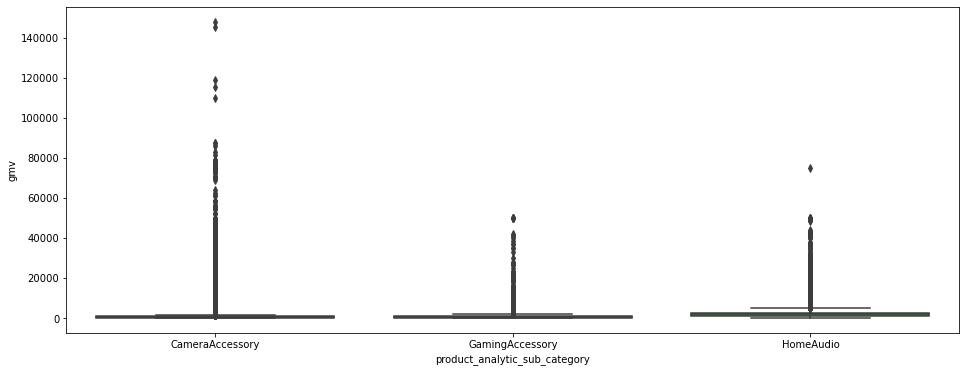

In [49]:
#Lets check outliers in gmv individaully for the three categories ("product_analytic_sub_category")
plt.figure(figsize = (16,6))
sns.boxplot(y = 'gmv',data = consumer_MMM, x = 'product_analytic_sub_category')

In [50]:
# Camera Accessory - capping value for gmv for outlier removal
consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)

6227.29999999993

In [51]:
# Home Audio - capping value for gmv for outlier removal
consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

4698.0

In [52]:
# Gaming Accessory - capping value for gmv for outlier removal
consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)

2899.0

##### Now let's create the box plot for checking the outliers after capping the gmv to 95 percentile for each of the sub-categories

<AxesSubplot:xlabel='gmv'>

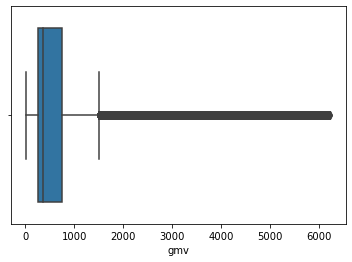

In [53]:
# plotting the box plot for checking the outliers for camera accessory  data after capping it to 95 percentile
sns.boxplot(consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='CameraAccessory') & (consumer_MMM.gmv<6227)]['gmv'])

<AxesSubplot:xlabel='gmv'>

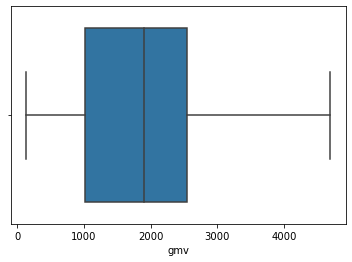

In [54]:
# plotting the box plot for checking the outliers for Home Audio data after capping it to 95 percentile
sns.boxplot(consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='HomeAudio') & (consumer_MMM.gmv<4698)]['gmv'])

<AxesSubplot:xlabel='gmv'>

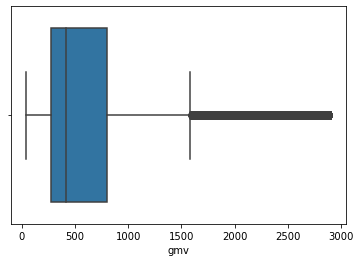

In [55]:
# plotting the box plot for checking the outliers for Gaming accessory  data after capping it to 95 percentile
sns.boxplot(consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='GamingAccessory') & (consumer_MMM.gmv<2899)]['gmv'])

In [56]:
# Lets Cap the outliers for Sub-Categories to 95 percentile
camera_data = consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='CameraAccessory') & (consumer_MMM.gmv<6227)]
homeaudio_data = consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='HomeAudio') & (consumer_MMM.gmv<4698)]
gaming_data = consumer_MMM.loc[(consumer_MMM.product_analytic_sub_category=='GamingAccessory') & (consumer_MMM.gmv<2899)]

In [57]:
## checking the shape of the 3 categories
print(camera_data.shape)
print(gaming_data.shape)
print(homeaudio_data.shape)

(196667, 20)
(172517, 20)
(104156, 20)


In [58]:
# Lets concatenate three categories to a single dataframe data
consumer_MMM = pd.concat([camera_data, homeaudio_data, gaming_data ], axis = 0)

In [59]:
consumer_MMM.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800,2421912925714800,1990.0,1,COD,10,-1040442942046599936,-7477687762286570496,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,-5835931638776609792,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,534735360997241984,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
5,ACCCX3S5JGAJETYR,2015-10-17,2015,10,3419188825145600,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,-1919052697560310016,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-17 12:07:24,42
6,ACCCX3S5JGAJETYR,2015-10-16,2015,10,3418428515041500,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,6404913202077570048,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5,2015-10-16 14:59:57,42


In [60]:
# As we have already removed the outliers from all 3 categories.Now Let's drop the columns which wont be helpful for analysis
consumer_MMM.drop(['fsn_id','order_item_id','pincode','product_analytic_super_category','product_analytic_category'], inplace = True, axis = 1)

In [61]:
# Let's now convert data types for Year, Month & order_week to integer
consumer_MMM['Year'] = consumer_MMM['Year'].astype('int')
consumer_MMM['Month'] = consumer_MMM['Month'].astype('int')
consumer_MMM['order_week'] = consumer_MMM['order_week'].astype('int')

## Exploratory Data Analyisis and KPI Engineering

### Data Visualisation

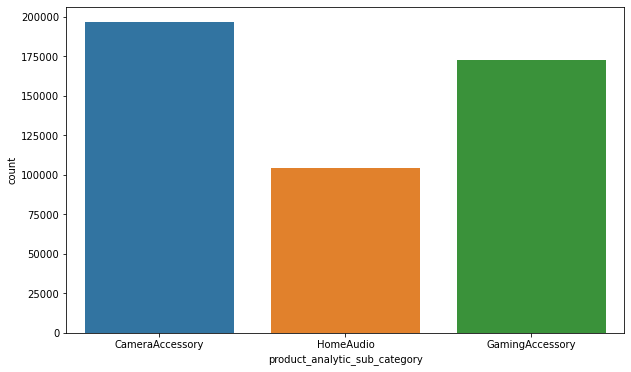

In [62]:
# Transactions by Sub-Category
plt.figure(figsize = (10,6))
sns.countplot(consumer_MMM['product_analytic_sub_category'])
plt.show()

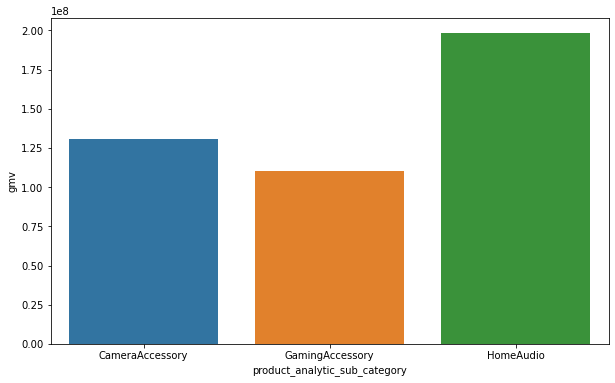

In [63]:
# Revenue of the sub-categories
total_revenue= consumer_MMM.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x='product_analytic_sub_category', y='gmv', data=total_revenue)
plt.show()

<AxesSubplot:>

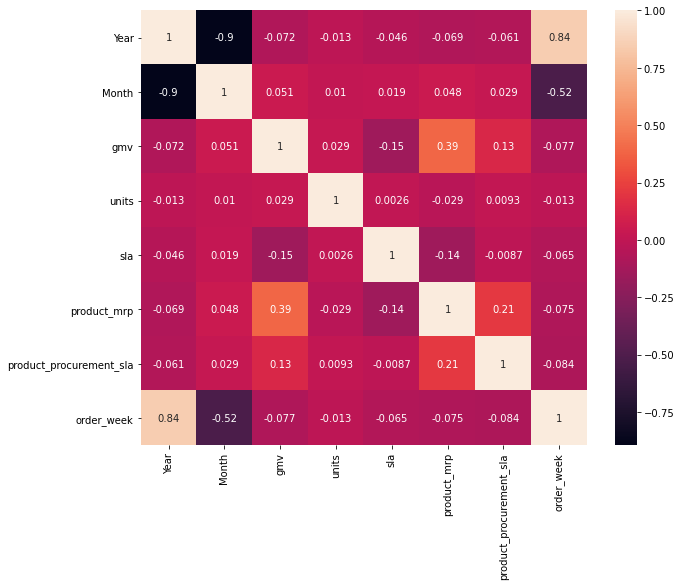

In [64]:
# Now let's check the corelation.
plt.figure(figsize = (10,8))
sns.heatmap(consumer_MMM.corr(), annot=True)

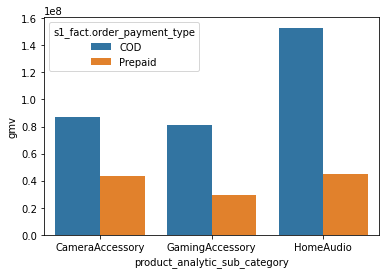

In [65]:
# Let's now visualize the total revenue for each of the sub-categories (total gmv) vs Payment Type
revenue_by_payment_type = consumer_MMM.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].sum().reset_index()
sns.barplot(x='product_analytic_sub_category', y='gmv', hue="s1_fact.order_payment_type", data=revenue_by_payment_type)
plt.show()

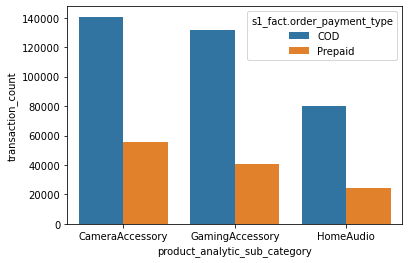

In [66]:
# Now lets visualize the total number of orders for each of the sub-categories vs Payment Type

orders_by_Payment_type = consumer_MMM.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'transaction_count'})
sns.barplot(x='product_analytic_sub_category', y='transaction_count', hue="s1_fact.order_payment_type", data = orders_by_Payment_type)
plt.show()

In [67]:
## Creating the data set for each sub-category
camera_data = consumer_MMM[(consumer_MMM['product_analytic_sub_category']=='CameraAccessory')].drop('product_analytic_sub_category', axis = 1)
gaming_data = consumer_MMM[(consumer_MMM['product_analytic_sub_category']=='GamingAccessory')].drop('product_analytic_sub_category', axis = 1)
homeaudio_data = consumer_MMM[(consumer_MMM['product_analytic_sub_category']=='HomeAudio')].drop('product_analytic_sub_category', axis = 1)

In [68]:
print(gaming_data.shape)
print(camera_data.shape)
print(homeaudio_data.shape)

(172517, 14)
(196667, 14)
(104156, 14)


### Creating the KPIs

In [69]:
# Function to take dataframe of order dates and provide total special and payment dates for each week
def createDFFromDict(listOfValues, desiredColumnName):
    df = pd.DataFrame(listOfValues)
    df[desiredColumnName] = pd.to_datetime(df[desiredColumnName]).dt.date
    df["total_"+desiredColumnName+"s"] = 1
    df['order_week'] = pd.to_datetime(df[desiredColumnName]).dt.week
    df['year'] = pd.to_datetime(df[desiredColumnName]).dt.year
    df['order_week'] = df.apply(lambda x: mapWeek(x['order_week'],x['year']), axis = 1)
    df = df.groupby('order_week').sum()
    df["is_"+desiredColumnName] = 1
    df.drop('year', axis = 1, inplace = True)
    return df

In [70]:
def createKPIs(df):
# KPI 1: Payment mode
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
# KPI 2: Selling price of each product in every transaction
    df['selling_price'] = df['gmv']/df['units']
# KPI 3: Discount offered on  each of the products
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    return df

In [71]:
def createWeeklyAggregatedCollumns():
# KPI 4: Total Holidays
  # Holidays refferences from internet
    holidays = {'holiday':["2015-01-01", "2015-02-16", "2015-04-03", "2015-05-10", "2015-05-18", "2015-06-21", 
            "2015-07-01", "2015-09-07", "2015-10-12", "2015-12-25", "2015-12-26", "2016-01-01", 
            "2016-02-15", "2016-03-25", "2016-05-08", "2016-05-23", "2016-06-19", "2016-07-01", 
            "2016-09-05", "2016-10-10", "2016-12-25", "2016-12-26", "2016-12-27"]}
    holiday_df = createDFFromDict(holidays,"holiday")

# KPI 5: total Special sale days
  # Special Sales Days Mention in Dataset
    special_sale_days = {'special_sale_day':["2015-07-18","2015-07-19","2015-08-15",
                  "2015-08-16","2015-08-17","2015-08-28",
                  "2015-08-29","2015-08-30","2015-10-15",
                  "2015-10-16","2015-10-17","2015-11-07","2015-11-08","2015-11-09","2015-11-10",
                  "2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26",
                  "2015-12-27","2015-12-28","2015-12-29","2015-12-30", "2015-12-31", "2016-01-01","2016-01-02",
                  "2016-01-03","2016-01-20","2016-01-21","2016-01-22","2016-02-01","2016-02-02",
                  "2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08",
                  "2016-03-09","2016-05-25","2016-05-26","2016-05-27"]}
    special_sale_day_df = createDFFromDict(special_sale_days, "special_sale_day")

# KPI 6: total pay days
  #Creating order_day column
    pay_days = {'pay_day':["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                "2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01",
                "2015-11-15","2015-12-01","2015-12-15","2016-01-01","2016-01-15",
                "2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01",
                "2016-04-15","2016-05-01","2016-05-15","2016-06-01","2016-06-15"]}
    pay_days_df = createDFFromDict(pay_days,'pay_day')
    final_df = pd.concat([holiday_df, special_sale_day_df, pay_days_df],axis = 1)
    return final_df.fillna(0).astype('int')

In [72]:
createWeeklyAggregatedCollumns()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
1,1,1,0,0,0,0
8,1,1,0,0,0,0
14,1,1,0,0,0,0
19,1,1,0,0,0,0
21,1,1,0,0,0,0
25,1,1,0,0,0,0
27,1,1,0,0,1,1
29,0,0,2,1,1,1
31,0,0,0,0,1,1


In [73]:
createWeeklyAggregatedCollumns().head()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
1,1,1,0,0,0,0
8,1,1,0,0,0,0
14,1,1,0,0,0,0
19,1,1,0,0,0,0
21,1,1,0,0,0,0


In [74]:
# Now lets Add the KPIs to the dataframes of each sub-category
gaming_data_with_KPIs = createKPIs(gaming_data)
camera_data_with_KPIs = createKPIs(camera_data)
homeaudio_data_with_KPIs = createKPIs(homeaudio_data)

In [75]:
print(homeaudio_data_with_KPIs.shape)
print(gaming_data_with_KPIs.shape)
print(camera_data_with_KPIs.shape)

(104156, 17)
(172517, 17)
(196667, 17)


In [76]:
# Lets check gaming_data_with_KPIs 
gaming_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,GamePad,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,GamePad,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,GamePad,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,GamePad,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31
1607,2015-10-04,2015,10,4408070947414700,2750.0,1,COD,7,4371929922837940224,GamePad,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31


In [77]:
# Lets check camera_data_with_KPIs 
camera_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,CameraTripod,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,CameraTripod,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,CameraTripod,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,CameraTripod,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,CameraTripod,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09


In [78]:
# Lets check homeaudio_data_with_KPIs 
homeaudio_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,HomeAudioSpeaker,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,HomeAudioSpeaker,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,HomeAudioSpeaker,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,HomeAudioSpeaker,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,HomeAudioSpeaker,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23


### Creating KPIs for Product Analytical Vertical

In [79]:
# Creating KPIs for product analytical vertical
prd_vert_CA = camera_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
CA_prdvr_KPI = prd_vert_CA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = CA_prdvr_KPI.columns
CA_prdvr_KPI[cols] = CA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
camera_data_with_KPIs = camera_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

In [80]:
#Counting products sold in each vertical
prd_vrt_units_sold = prd_vert_CA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)
prd_vrt_units_sold.head()

,product_analytic_vertical,units
15,Flash,47795
3,CameraBattery,34522
12,CameraTripod,32993
17,Lens,21596
2,CameraBag,15302


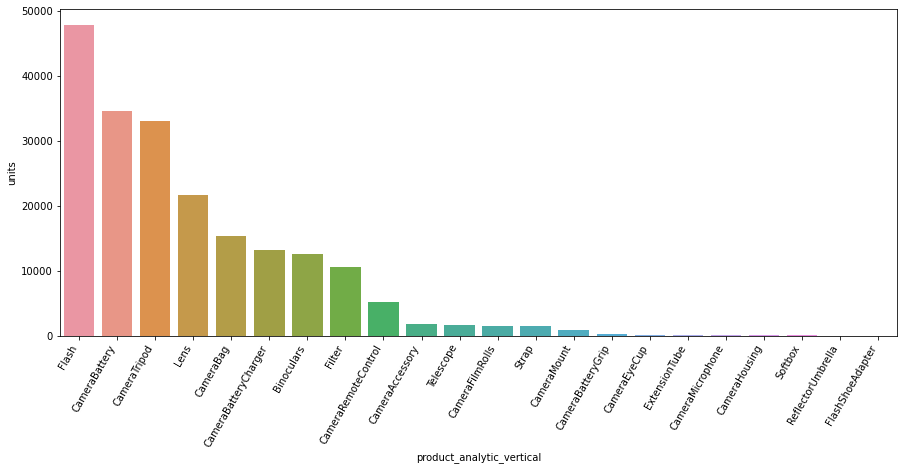

In [81]:
plt.figure(figsize = (15,6))
ax= sns.barplot(x= "product_analytic_vertical", y= "units" , data = prd_vrt_units_sold)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

In [82]:
# Creating KPIs for product analytical vertical
prd_vert_GA = gaming_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
GA_prdvr_KPI = prd_vert_GA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0")
cols = GA_prdvr_KPI.columns
GA_prdvr_KPI[cols] = GA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
gaming_data_with_KPIs = gaming_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

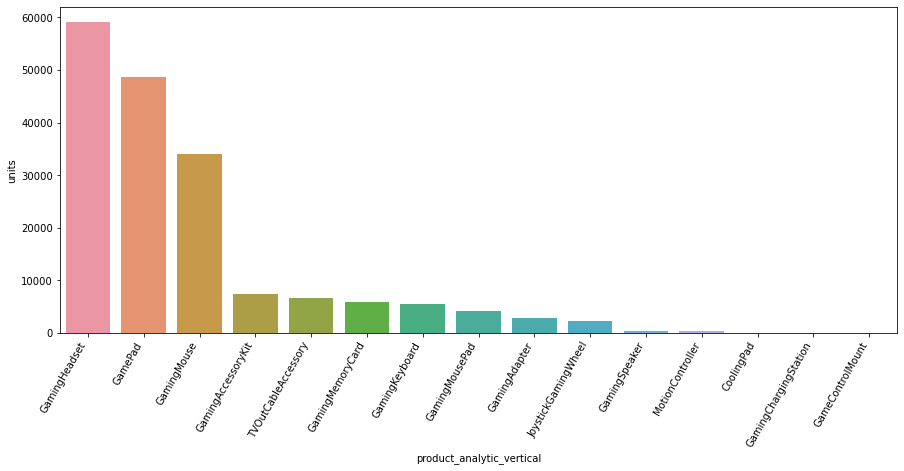

In [83]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_GA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)

plt.figure(figsize = (15,6))
ax= sns.barplot(x= "product_analytic_vertical", y= "units" , data = prd_vrt_units_sold)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

In [84]:
# Creating KPIs for product analytical vertical
prd_vert_HA = homeaudio_data_with_KPIs.groupby(['order_week','product_analytic_vertical'])['units'].sum().reset_index()
HA_prdvr_KPI = prd_vert_HA.pivot_table(index='order_week', columns='product_analytic_vertical', values='units', aggfunc=np.sum).fillna("0").reset_index()
cols = HA_prdvr_KPI.columns
HA_prdvr_KPI[cols] = HA_prdvr_KPI[cols].apply(pd.to_numeric, errors='coerce')
homeaudio_data_with_KPIs = homeaudio_data_with_KPIs.drop(['product_analytic_vertical'],axis=1)

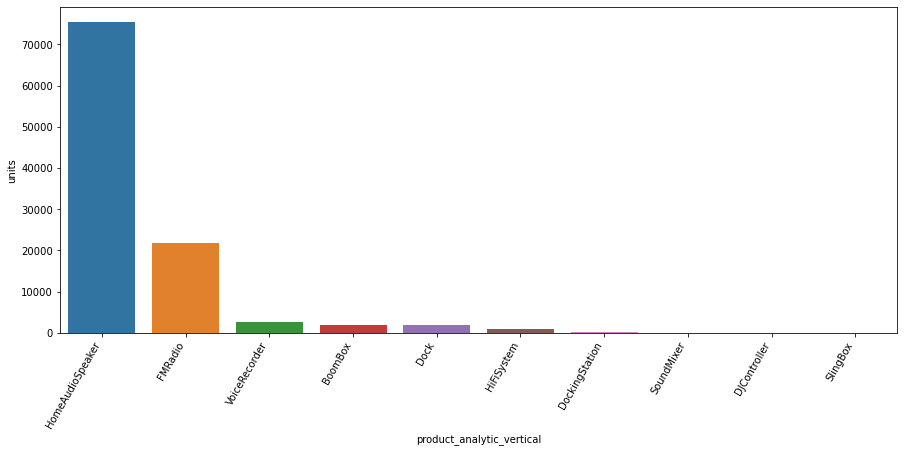

In [85]:
#Creating number of products sold for each vertical & plotting
prd_vrt_units_sold = prd_vert_HA.groupby('product_analytic_vertical')['units'].sum().reset_index().sort_values(by=['units'],ascending=False)

plt.figure(figsize = (15,6))
ax= sns.barplot(x= "product_analytic_vertical", y= "units" , data = prd_vrt_units_sold)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.show()

### KPI 7 : Product Premiumness

In [86]:
def createProductPremiumness(df,cut_off):
    df['premium_product'] = df['gmv'].apply(lambda  x:1 if (x >cut_off) else 0)
    return df

In [87]:
# Checking with camera_data_with_KPIs
camera_data_with_KPIs['gmv'].describe()

count    196667.000000
mean        663.288138
std         812.189632
min          10.000000
25%         248.000000
50%         350.000000
75%         749.000000
max        6226.000000
Name: gmv, dtype: float64

In [88]:
# Therefore the cut-off value for camera acccessory is 749(75% percentile)
camera_data_with_KPIs = createProductPremiumness(camera_data_with_KPIs,749.0)

In [89]:
camera_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2,2015-10-20,2015,10,2421912925714800,1990.0,1,COD,10,-1040442942046599936,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05,1
3,2015-10-14,2015,10,4416592101738400,1690.0,1,Prepaid,4,-7604960843527140352,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19,1
4,2015-10-17,2015,10,4419525153426400,1618.0,1,Prepaid,6,2894557208345299968,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23,1
5,2015-10-17,2015,10,3419188825145600,3324.0,1,Prepaid,5,-7641546361891739648,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18,1
6,2015-10-16,2015,10,3418428515041500,3695.0,1,Prepaid,6,-71561404148106600,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09,1


In [90]:
# Checking with gaming_data_with_KPIs
gaming_data_with_KPIs['gmv'].describe()

count    172517.000000
mean        641.115197
std         565.085643
min          39.000000
25%         279.000000
50%         419.000000
75%         799.000000
max        2898.000000
Name: gmv, dtype: float64

In [91]:
# Therefore the cut-off value for gaming accesory is 799 (75% percentile)
gaming_data_with_KPIs = createProductPremiumness(gaming_data_with_KPIs,799.0)

In [92]:
gaming_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
1599,2015-10-14,2015,10,1416985339691600,2750.0,1,COD,7,9041577304631719936,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31,1
1601,2015-10-17,2015,10,1419414998353400,2609.0,1,Prepaid,5,-4824142736471789568,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35,1
1602,2015-10-26,2015,10,1427167582532600,2772.0,1,Prepaid,5,-3305365297260279808,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31,1
1603,2015-10-16,2015,10,4417730112316700,2750.0,1,Prepaid,7,2297791966161220096,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31,1
1607,2015-10-04,2015,10,4408070947414700,2750.0,1,COD,7,4371929922837940224,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31,1


In [93]:
# Checking with homeaudio_data_with_KPIs
homeaudio_data_with_KPIs['gmv'].describe()

count    104156.000000
mean       1902.451669
std         975.647511
min         129.000000
25%        1020.000000
50%        1905.000000
75%        2549.000000
max        4695.000000
Name: gmv, dtype: float64

In [94]:
# Therefore the cut-off value for camera acccessory is 2549.0(75% percentile)
homeaudio_data_with_KPIs = createProductPremiumness(homeaudio_data_with_KPIs,2549.0)

In [95]:
homeaudio_data_with_KPIs.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2870,2015-10-08,2015,10,1411753777965600,3700.0,1,COD,3,8628124667745449984,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20,1
2871,2015-10-11,2015,10,2414104375842400,3700.0,1,COD,5,5684936202558919680,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20,1
2872,2015-10-08,2015,10,4411629266828400,3700.0,1,COD,3,-1123729755469779968,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20,1
5960,2015-10-01,2015,10,2405684398213000,2159.0,1,Prepaid,6,8509075186971020288,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23,0
5961,2015-10-26,2015,10,3427126275487100,2159.0,1,COD,5,349030327610672000,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23,0


### KPI 8: Including NPS & Stock Index. Creating them separately & merging with 3 dataframes


In [96]:
#Reading media data from the excel file
nps_df = pd.read_excel(r"C:\Users\Hp\Desktop\Data Science\5. Capstone Project- Eomm\Case Study\Media data and other information.xlsx", 
                       sheet_name = 'Monthly NPS Score').T.reset_index()

# resetting index
nps_df.reset_index(drop=True, inplace=True)

# renaming columnsx
nps_df.columns = ['DT', 'NPS', 'Stock Index']
nps_df = nps_df.iloc[1:13,  : ]
nps_df

,DT,NPS,Stock Index
1,July'15,54.599588,1177.0
2,Aug'15,59.987101,1206.0
3,Sept'15,46.925419,1101.0
4,Oct'15,44.398389,1210.0
5,Nov'15,47.0,1233.0
6,Dec'15,45.8,1038.0
7,Jan'16,47.093031,1052.0
8,Feb'16,50.327406,1222.0
9,Mar'16,49.02055,1015.0
10,Apr'16,51.827605,1242.0


In [97]:
nps_df['Year']=[2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016]
nps_df['Month']=[7,8,9,10,11,12,1,2,3,4,5,6]

In [98]:
nps_df.drop('DT',axis=1,inplace=True)

In [99]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NPS          12 non-null     object
 1   Stock Index  12 non-null     object
 2   Year         12 non-null     int64 
 3   Month        12 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 516.0+ bytes


In [100]:
# Converting "NPS" to Float
nps_df['NPS'] = nps_df['NPS'].astype(float)

In [101]:
# Converting 
nps_df['Stock Index'] = nps_df['Stock Index'].astype(float)

In [102]:
nps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     float64
 2   Year         12 non-null     int64  
 3   Month        12 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 516.0 bytes


In [103]:
# Adding NPS KPI to each of the dataframes
gaming_data_with_KPIs = pd.merge(nps_df,gaming_data_with_KPIs,on=['Month','Year'],how='inner')
camera_data_with_KPIs = pd.merge(nps_df,camera_data_with_KPIs,on=['Month','Year'],how='inner')
homeaudio_data_with_KPIs = pd.merge(nps_df,homeaudio_data_with_KPIs,on=['Month','Year'],how='inner')

In [104]:
# Creating dataframes for plots for each of the category
GamingAccessory_data_with_KPIs_for_plot = gaming_data_with_KPIs
GamingAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Gaming Accessory"
CameraAccessory_data_with_KPIs_for_plot = camera_data_with_KPIs
CameraAccessory_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Camera Accessory"
HomeAudio_data_with_KPIs_for_plot = homeaudio_data_with_KPIs
HomeAudio_data_with_KPIs_for_plot['product_analytic_sub_category'] = "Home Audio"

all_data_with_kpi = pd.concat([GamingAccessory_data_with_KPIs_for_plot, CameraAccessory_data_with_KPIs_for_plot, HomeAudio_data_with_KPIs_for_plot], axis = 0)


In [105]:
all_data_with_kpi.head()

,NPS,Stock Index,Year,Month,order_date,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product,product_analytic_sub_category
0,54.599588,1177.0,2015,7,2015-07-10,169460596,2800.0,1,Prepaid,9,8996931547933859840,3999,5,2015-07-10 22:22:38,28,1,2800.0,0.30,1,Gaming Accessory
1,54.599588,1177.0,2015,7,2015-07-20,173845985,2700.0,1,COD,7,1095002556734790016,3999,5,2015-07-20 09:47:28,30,0,2700.0,0.32,1,Gaming Accessory
2,54.599588,1177.0,2015,7,2015-07-26,176570219,2679.0,1,Prepaid,5,-8900627232445830144,3999,5,2015-07-26 20:26:01,30,1,2679.0,0.33,1,Gaming Accessory
3,54.599588,1177.0,2015,7,2015-07-08,168513415,2789.0,1,Prepaid,7,6515060272718419968,3999,5,2015-07-08 23:17:31,28,1,2789.0,0.30,1,Gaming Accessory
4,54.599588,1177.0,2015,7,2015-07-17,172787973,2884.0,1,COD,6,-7661168602558889984,3999,5,2015-07-17 20:47:03,29,0,2884.0,0.28,1,Gaming Accessory


## Weekly Agrregation of Data

####  Gaming Accessory

In [106]:
# GamingAccessory Data - Aggregating weekly some features being summed up & for some taking mean
GamingAccessory_data_sum = gaming_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
GamingAccessory_data_mean = gaming_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                            'product_mrp','selling_price','NPS',
                                                   'discount']].groupby('order_week').mean()
GamingAccessory_data_count = gaming_data_with_KPIs[['order_id','order_week','premium_product']
                                                   ].groupby('order_week').count().rename(columns={'order_id':'total_transactions'
                                                   ,'premium_product':'total_premiumness'})

final_gaming_data = pd.concat([GamingAccessory_data_sum, GamingAccessory_data_mean, GamingAccessory_data_count], axis = 1).reset_index()

In [107]:
# Merging with the weekly aggregate collumns
final_gaming_data = pd.merge(final_gaming_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how= 'left').fillna(0)
final_gaming_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,total_premiumness,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
0,27,2.322200e+04,26,3.360000,2.800000,3381.920000,911.320000,54.599588,0.304400,25,25,1.0,1.0,0.0,0.0,1.0,1.0
1,28,1.946435e+06,2956,5.231232,3.036473,1605.473442,669.711048,54.599588,0.418205,2824,2824,0.0,0.0,0.0,0.0,0.0,0.0
2,29,1.636109e+06,2755,5.193648,2.546088,1593.121611,622.698048,54.599588,0.440705,2582,2582,0.0,0.0,2.0,1.0,1.0,1.0
3,30,1.781214e+06,2382,5.327691,2.377170,2040.311632,760.555339,54.599588,0.391628,2304,2304,0.0,0.0,0.0,0.0,0.0,0.0
4,31,1.351251e+06,1734,5.561562,2.522523,5011.518318,794.699700,54.602824,0.452438,1665,1665,0.0,0.0,0.0,0.0,1.0,1.0


In [108]:
# Merging with Product Analytical Vertical KPI
final_gaming_data = pd.merge(final_gaming_data,GA_prdvr_KPI,on=['order_week'],how='left')
final_gaming_data.shape

(53, 32)

In [109]:
final_gaming_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

#### Camera Accessory

In [110]:
#Camera data  - Aggregating weekly some features being summed up & for some taking mean
CameraAccessory_data_sum = camera_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
CameraAccessory_data_mean = camera_data_with_KPIs[['sla','product_procurement_sla','order_week','product_mrp',
                                                            'selling_price','discount','NPS']].groupby('order_week').mean()
CameraAccessory_data_count = camera_data_with_KPIs[['order_id','order_week','premium_product']
                                                   ].groupby('order_week').count().rename(columns={'order_id':'total_transactions',
                                                                                                   'premium_product':'total_premiumness'})
final_camera_data = pd.concat([CameraAccessory_data_sum, CameraAccessory_data_mean,CameraAccessory_data_count], axis = 1).reset_index()

In [111]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_camera_data = pd.merge(final_camera_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_camera_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,discount,NPS,total_transactions,total_premiumness,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
0,27,17520.0,26,2.384615,2.884615,1511.961538,673.846154,0.515385,54.599588,26,26,1.0,1.0,0.0,0.0,1.0,1.0
1,28,2078963.0,2773,7.078838,2.674085,1664.028668,767.885704,0.460294,54.599588,2651,2651,0.0,0.0,0.0,0.0,0.0,0.0
2,29,2299816.0,2934,6.448239,2.687324,1642.404577,796.104577,0.463511,54.599588,2840,2840,0.0,0.0,2.0,1.0,1.0,1.0
3,30,2185675.0,2915,6.460662,2.734069,1581.604842,762.223567,0.453318,54.599588,2809,2809,0.0,0.0,0.0,0.0,0.0,0.0
4,31,1478298.0,1933,6.451370,2.699624,1548.265986,779.444922,0.447829,54.602483,1861,1861,0.0,0.0,0.0,0.0,1.0,1.0


In [112]:
#Merging with Product Analytical Vertical KPI
final_camera_data = pd.merge(final_camera_data,CA_prdvr_KPI,on=['order_week'],how='left')
final_camera_data.shape

(52, 39)

In [113]:
final_camera_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

#### Home Audio

In [114]:
# Home Audio data
HomeAudio_data_sum = homeaudio_data_with_KPIs[['gmv','units','order_week']].groupby('order_week').sum()
HomeAudio_data_mean = homeaudio_data_with_KPIs[['sla','product_procurement_sla','order_week',
                                                'product_mrp','selling_price','discount','NPS']].groupby('order_week').mean()
HomeAudio_data_count = homeaudio_data_with_KPIs[['order_id','order_week','premium_product']
                                                ].groupby('order_week').count().rename(columns={'order_id':'total_transactions',
                                                                                                'premium_product':'total_premiumness'})
final_home_audio_data = pd.concat([HomeAudio_data_sum, HomeAudio_data_mean,HomeAudio_data_count], axis = 1).reset_index()

In [115]:
#Merging with the weekly aggregate KPIs i.e. total_paydays, total_holidays, is_payday, is_holiday, total_special_days, is_special_day
final_home_audio_data = pd.merge(final_home_audio_data, createWeeklyAggregatedCollumns().reset_index(), on = 'order_week', how = 'left').fillna(0)
final_home_audio_data.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,discount,NPS,total_transactions,total_premiumness,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
0,27,7.894800e+04,34,3.000000,3.558824,4196.088235,2322.000000,0.393235,54.599588,34,34,1.0,1.0,0.0,0.0,1.0,1.0
1,28,3.556734e+06,1952,7.447491,2.736161,3087.430936,1834.178548,0.339400,54.599588,1933,1933,0.0,0.0,0.0,0.0,0.0,0.0
2,29,4.163357e+06,2269,7.114754,2.673460,3186.193620,1839.068232,0.349734,54.599588,2257,2257,0.0,0.0,2.0,1.0,1.0,1.0
3,30,3.721554e+06,2075,7.132231,2.737482,3165.331551,1798.388916,0.344584,54.599588,2057,2057,0.0,0.0,0.0,0.0,0.0,0.0
4,31,2.644372e+06,1439,7.269553,2.654330,3181.113128,1840.911313,0.343003,54.599588,1432,1432,0.0,0.0,0.0,0.0,1.0,1.0


In [116]:
#Merging with Product Analytical Vertical KPI
final_home_audio_data = pd.merge(final_home_audio_data,HA_prdvr_KPI,on=['order_week'],how='left')
final_home_audio_data.shape

(50, 27)

In [117]:
final_home_audio_data.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'discount', 'NPS', 'total_transactions',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [118]:
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 32)
Shape of Camera Accessory DF (52, 39)
Shape of Home Audio DF (50, 27)


### KPI 9: Media Investment data - Creating separately & merging with the 3 dataframes of each category

In [119]:
# Reading the media data from the provided file
media_investment = pd.read_excel(r"C:\Users\Hp\Desktop\Data Science\5. Capstone Project- Eomm\Case Study\Media data and other information.xlsx", 
                                 sheet_name = 'Media Investment', header = 2)
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2015.0,12.0,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2016.0,1.0,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2016.0,2.0,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,2016.0,3.0,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,2016.0,4.0,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#Formatting the dataframe in the required format i.e. removing the extra rows & columns
media_investment = media_investment.iloc[:-4,1:13].reset_index()
media_investment.drop('index', inplace = True, axis = 1)

In [121]:
media_investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [122]:
#Converting columns year & month in int type
media_investment['Year']  = media_investment['Year'] .astype('int')
media_investment['Month']  = media_investment['Month'] .astype('int')

In [123]:
#Filling NaN values as 0 assuming that the investment done in respective area was 0
media_investment  = media_investment.fillna(0)

In [124]:
#Checking the final media_investment DF
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [125]:
#Creating a mapping of the Months & no of weeks in order to find the media data weekly for each of the months
number_of_weeks = {'Month':[1,2,3,4,5,6,7,8,9,10,11,12], 'number_of_weeks':[4,4,5,4,4,5,4,4,5,4,4,5]}
number_of_weeks_df = pd.DataFrame(number_of_weeks)
number_of_weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [126]:
#Merging the media_investment data with DF containing the mapping of months & no of weeks in that month
media_investment = pd.merge(media_investment,number_of_weeks_df, on = 'Month', how = 'inner')
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000,4
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000,4
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000,5
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000,4
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000,4
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000,5
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000,4
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000,4
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545,5
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000,4


In [127]:
# Calculating the final media_investments weekly by dividing the value in a month with the respecitve number_of_weeks in the month
media_investment['TV']  = media_investment['TV']/media_investment['number_of_weeks']
media_investment['Digital']  = media_investment['Digital']/media_investment['number_of_weeks']
media_investment['Sponsorship']  = media_investment['Sponsorship']/media_investment['number_of_weeks']
media_investment['Content Marketing']  = media_investment['Content Marketing']/media_investment['number_of_weeks']
media_investment['Online marketing']  = media_investment['Online marketing']/media_investment['number_of_weeks']
media_investment[' Affiliates']  = media_investment[' Affiliates']/media_investment['number_of_weeks']
media_investment['SEM']  = media_investment['SEM']/media_investment['number_of_weeks']
media_investment['Radio']  = media_investment['Radio']/media_investment['number_of_weeks']
media_investment['Other']  = media_investment['Other']/media_investment['number_of_weeks']

In [128]:
# Checking the media investment data
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,number_of_weeks
0,2015,7,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.000,0.000000,4
1,2015,8,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.000,0.000000,4
2,2015,9,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,1.240430,0.000,0.000000,5
3,2015,10,170.156297,1.536178,3.155620,21.168133,0.861019,6.092944,1.743428,7.981753,0.000,0.000000,4
4,2015,11,51.216220,1.055157,0.318867,3.543029,0.042158,4.890394,1.648942,1.305508,0.000,0.000000,4
5,2015,12,106.745312,1.079500,0.612672,11.341084,0.213461,4.500751,1.365388,2.236206,0.000,0.000000,5
6,2016,1,74.196000,1.095000,0.114000,1.050000,0.225000,5.725000,1.842500,1.050000,0.675,6.772500,4
7,2016,2,48.052000,0.646502,0.478163,2.931389,0.149193,4.973092,1.616255,1.218407,0.000,0.000000,4
8,2016,3,100.024621,1.860000,0.420000,8.318000,0.074000,3.687564,1.243533,1.038718,0.174,3.189109,5
9,2016,4,56.848241,1.301299,0.217973,6.077088,0.008719,4.128627,1.423364,1.054990,0.000,0.000000,4


In [129]:
# Getting unique order_week, month & year present in the original DF
order_week_data = consumer_MMM[['order_week',"Month","Year"]].drop_duplicates(keep = 'first', subset = None).reset_index().drop('index', axis = 1).sort_values(by = 'order_week')
order_week_data = order_week_data.sort_values(by = ['order_week','Month']).drop_duplicates(keep = 'last', subset = 'order_week')
order_week_data

,order_week,Month,Year
66,21,5,2015
60,26,6,2015
50,27,7,2016
55,28,7,2015
53,29,7,2015
56,30,7,2015
59,31,8,2015
64,32,8,2015
65,33,8,2015
67,34,8,2015


In [130]:
# Merging the media_investment_data with the order_week_data to add order_week into this DF for final merging with other DF containing the KPIs
media_investment_weekly = pd.merge(order_week_data, media_investment, on = ["Month","Year"], how = "inner").drop('number_of_weeks', axis =1)
media_investment_weekly.head()

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,28,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,29,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
2,30,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
3,31,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0
4,32,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,0.628382,0.0,0.0


<AxesSubplot:title={'center':'Other:Weekly Trend'}, xlabel='order_week'>

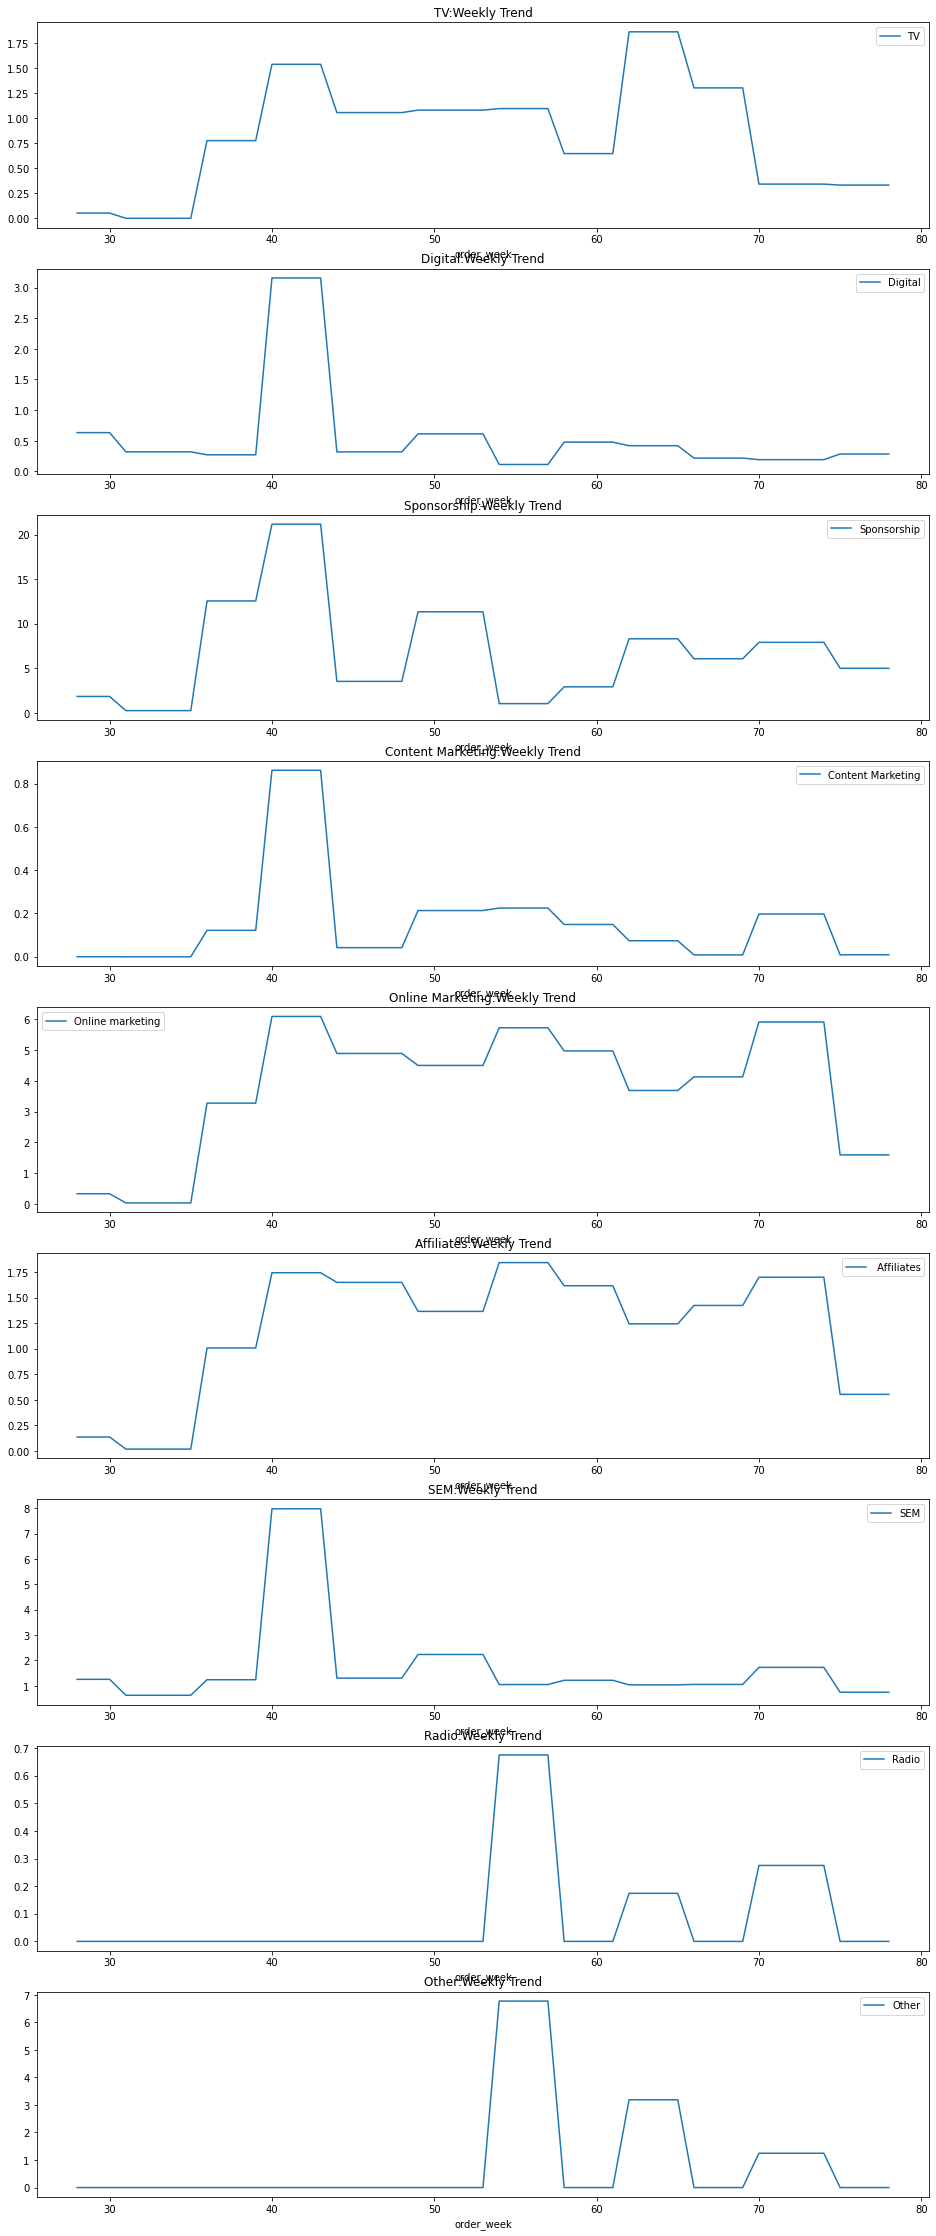

In [131]:
# Lets Analyze the Weekly Spends on different channels
fig = plt.figure(figsize=(16,40))

ax1 = fig.add_subplot(911)
ax1.set_title('TV:Weekly Trend')
ax2 = fig.add_subplot(912)
ax2.set_title('Digital:Weekly Trend')
ax3 = fig.add_subplot(913)
ax3.set_title('Sponsorship:Weekly Trend')
ax4 = fig.add_subplot(914)
ax4.set_title('Content Marketing:Weekly Trend')
ax5 = fig.add_subplot(915)
ax5.set_title('Online Marketing:Weekly Trend')
ax6 = fig.add_subplot(916)
ax6.set_title('Affiliates:Weekly Trend')
ax7 = fig.add_subplot(917)
ax7.set_title('SEM:Weekly Trend')
ax8 = fig.add_subplot(918)
ax8.set_title('Radio:Weekly Trend')
ax9 = fig.add_subplot(919)
ax9.set_title('Other:Weekly Trend')

media_investment_weekly.plot(x= 'order_week',y=['TV'],ax = ax1)
media_investment_weekly.plot(x= 'order_week',y=['Digital'],ax = ax2)
media_investment_weekly.plot(x= 'order_week',y=['Sponsorship'],ax = ax3)
media_investment_weekly.plot(x= 'order_week',y=['Content Marketing'],ax = ax4)
media_investment_weekly.plot(x= 'order_week',y=['Online marketing'],ax = ax5)
media_investment_weekly.plot(x= 'order_week',y=[' Affiliates'],ax = ax6)
media_investment_weekly.plot(x= 'order_week',y=['SEM'],ax = ax7)
media_investment_weekly.plot(x= 'order_week',y=['Radio'],ax = ax8)
media_investment_weekly.plot(x= 'order_week',y=['Other'],ax = ax9)

### KPI 9 : Adstock creation Fucntion to create adstocks

In [132]:
def getAdStockValue(media_investment_weekly,col_name, adstock_rate):
    media_investment_weekly['week_carry_over_1_value'] = adstock_rate**1 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_2_value'] = adstock_rate**2 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_3_value'] = adstock_rate**3 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_4_value'] = adstock_rate**4 * media_investment_weekly[col_name]
    media_investment_weekly['week_carry_over_5_value'] = adstock_rate**5 * media_investment_weekly[col_name]
    for i in range(0, len(media_investment_weekly)):
        week1CarryOverValue  = media_investment_weekly.loc[i-1,["week_carry_over_1_value"]][0] if(i-1 > -1) else 0
        week2CarryOverValue  = media_investment_weekly.loc[i-2,["week_carry_over_2_value"]][0] if(i-2 > -1) else 0
        week3CarryOverValue  = media_investment_weekly.loc[i-3,["week_carry_over_3_value"]][0] if(i-3 > -1) else 0
        week4CarryOverValue  = media_investment_weekly.loc[i-4,["week_carry_over_4_value"]][0] if(i-4 > -1) else 0
        week5CarryOverValue  = media_investment_weekly.loc[i-5,["week_carry_over_5_value"]][0] if(i-5 > -1) else 0
        media_investment_weekly.loc[i,"adStock_"+col_name] = media_investment_weekly.loc[i,[col_name]][0] + week1CarryOverValue + week2CarryOverValue + week3CarryOverValue + week4CarryOverValue + week5CarryOverValue
    return media_investment_weekly[["order_week","adStock_"+col_name]]

In [133]:
#Creating adstocks for each of the investments by calling the above created function
adStock_TV = getAdStockValue(media_investment_weekly[['TV','order_week']],"TV", 0.5)[["adStock_TV"]]
adStock_digital = getAdStockValue(media_investment_weekly[['Digital','order_week']],"Digital", 0.5)[["adStock_Digital"]]
adStock_sponsorship = getAdStockValue(media_investment_weekly[['Sponsorship','order_week']],"Sponsorship", 0.5)[["adStock_Sponsorship"]]
adStock_content_marketing = getAdStockValue(media_investment_weekly[['Content Marketing','order_week']],"Content Marketing", 0.5)[["adStock_Content Marketing"]]
adStock_online_marketing = getAdStockValue(media_investment_weekly[['Online marketing','order_week']],"Online marketing", 0.5)[["adStock_Online marketing"]]
adStock_affiliates = getAdStockValue(media_investment_weekly[[' Affiliates','order_week']]," Affiliates", 0.5)[["adStock_ Affiliates"]]
adStock_SEM = getAdStockValue(media_investment_weekly[['SEM','order_week']],"SEM", 0.5)[["adStock_SEM"]]
adStock_radio = getAdStockValue(media_investment_weekly[['Radio','order_week']],"Radio", 0.5)[["adStock_Radio"]]
adStock_other = getAdStockValue(media_investment_weekly[['Other','order_week']],"Other", 0.5)

In [134]:
# Concatenating all individual adstocks to form the final DF containing all the adstock data
all_adstock = pd.concat([adStock_TV,adStock_digital,adStock_sponsorship, adStock_content_marketing, adStock_online_marketing, adStock_affiliates, adStock_SEM, adStock_radio, adStock_other], axis = 1)

In [135]:
#Exploring first few rows
all_adstock.head()

,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,order_week,adStock_Other
0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,28,0.0
1,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,29,0.0
2,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,30,0.0
3,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,0.0,31,0.0
4,0.025966,0.756326,1.209685,0.000104,0.193638,0.087487,1.492040,0.0,32,0.0


In [136]:
# Merging the adstock data with the media investment data on order week
final_adstock_data = pd.merge(media_investment_weekly, all_adstock, on = "order_week", how = 'inner')

In [137]:
final_adstock_data

,order_week,Month,Year,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,...,Other,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,28,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.000000,0.000000
1,29,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.000000,0.000000
2,30,7,2015,17.061775,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,...,0.000000,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.000000,0.000000
3,31,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,0.000000,0.000000
4,32,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.025966,0.756326,1.209685,0.000104,0.193638,0.087487,1.492040,0.000000,0.000000
5,33,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.014593,0.697681,0.870676,0.000054,0.129130,0.062165,1.374402,0.000000,0.000000
6,34,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.008065,0.658465,0.672209,0.000025,0.091691,0.047366,1.295959,0.000000,0.000000
7,35,8,2015,5.064306,0.001610,0.319518,0.265833,0.000002,0.032311,0.018421,...,0.000000,0.004801,0.638856,0.572975,0.000010,0.072972,0.039966,1.256738,0.000000,0.000000
8,36,9,2015,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,...,0.000000,0.777460,0.580839,12.815056,0.122060,3.307299,1.025499,1.849175,0.000000,0.000000
9,37,9,2015,96.254380,0.775901,0.271306,12.557530,0.122058,3.275998,1.007653,...,0.000000,1.164606,0.556733,18.960905,0.183088,4.929143,1.520115,2.155199,0.000000,0.000000


In [138]:
final_adstock_data.drop(['Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other'],inplace = True, axis = 1)

In [139]:
final_adstock_data.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other'],
      dtype='object')

In [140]:
#Checking the first few rows
final_adstock_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,adStock_Radio,adStock_Other
0,28,7,2015,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,0.0,0.0
1,29,7,2015,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,0.0,0.0
2,30,7,2015,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,0.0,0.0
3,31,8,2015,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,0.0,0.0
4,32,8,2015,0.025966,0.756326,1.209685,0.000104,0.193638,0.087487,1.492040,0.0,0.0


<AxesSubplot:>

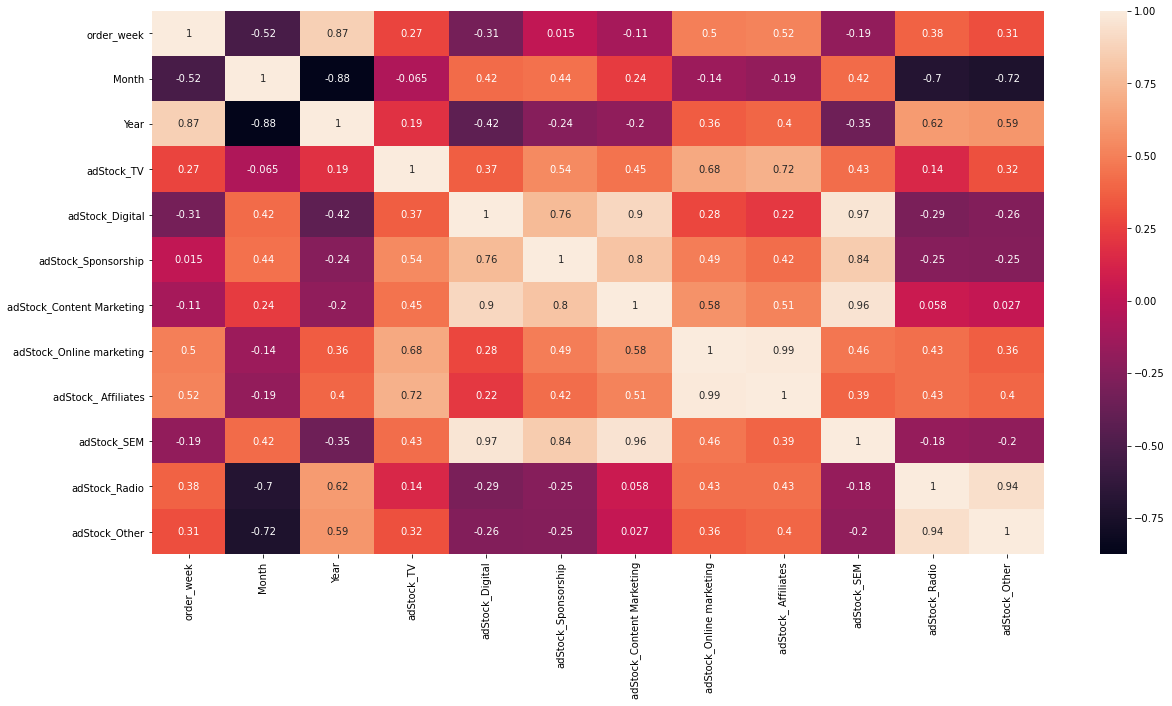

In [141]:
# Let's now visualise the correlations b/w the adstocks to check for colinearity
plt.figure(figsize = (20,10))
sns.heatmap(final_adstock_data.corr(), annot = True)

In [142]:
#Preparing final_data for 3 categories by adding the adstock data
final_camera_data = pd.merge(final_adstock_data,final_camera_data, on = "order_week", how = 'right')
final_gaming_data = pd.merge(final_adstock_data,final_gaming_data, on = "order_week", how = 'right')
final_home_audio_data = pd.merge(final_adstock_data,final_home_audio_data, on = "order_week", how = 'right')

In [143]:
final_camera_data = final_camera_data.fillna(0)
final_gaming_data = final_gaming_data.fillna(0)
final_home_audio_data = final_home_audio_data.fillna(0)

In [144]:
#Checking the shape of the final dataframes
print("Shape of Gaming Accessory DF",final_gaming_data.shape)
print("Shape of Camera Accessory DF",final_camera_data.shape)
print("Shape of Home Audio DF",final_home_audio_data.shape)

Shape of Gaming Accessory DF (53, 43)
Shape of Camera Accessory DF (52, 50)
Shape of Home Audio DF (50, 38)


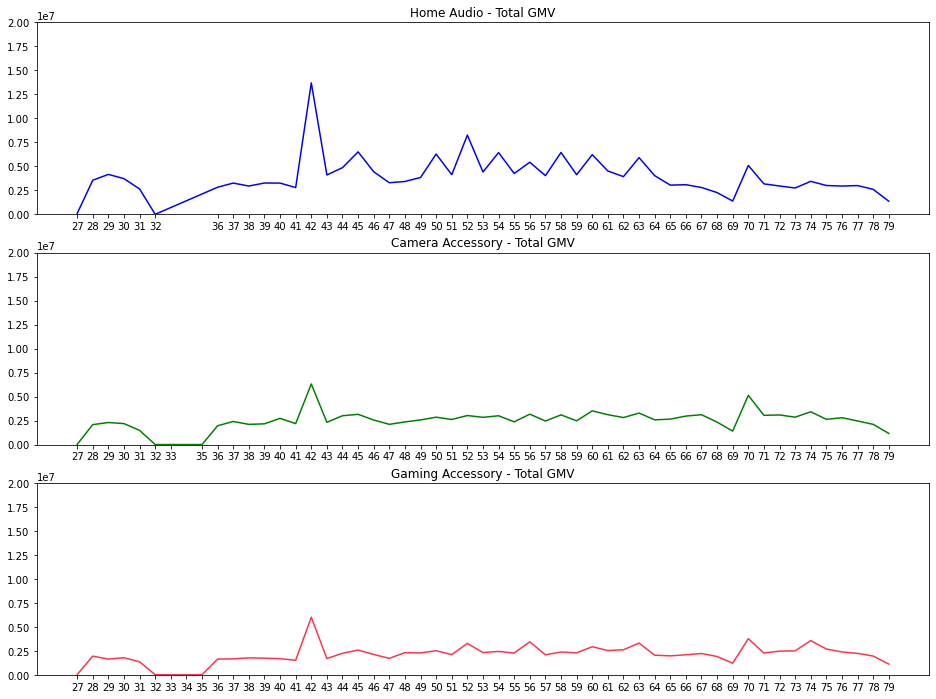

In [145]:
## Total GMV vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,20000000)
ax1 = plt.title('Home Audio - Total GMV')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['gmv'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,20000000)
ax2 = plt.title('Camera Accessory - Total GMV')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['gmv'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,20000000)
ax3 = plt.title('Gaming Accessory - Total GMV')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['gmv'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()

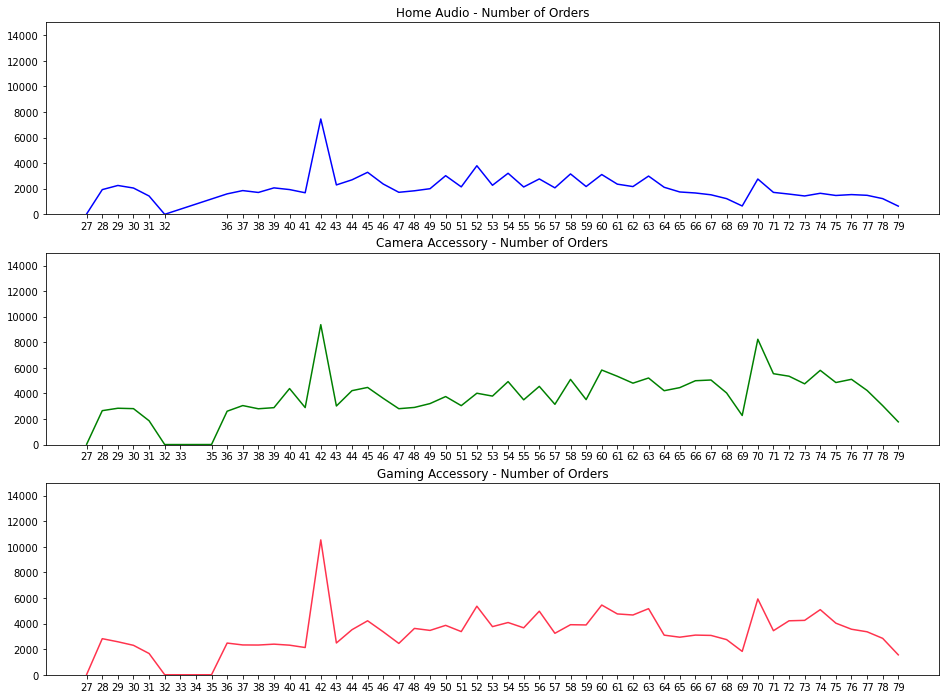

In [146]:
## No of Orders vs Week
fig, axes= plt.subplots(nrows=3, ncols=1,figsize=(16,12))

# subplot 1
ax1 = plt.subplot(3,1,1)
ax1.set_ylim(0,15000)
ax1 = plt.title('Home Audio - Number of Orders')
ax1 = plt.plot(final_home_audio_data['order_week'],final_home_audio_data['total_transactions'],color='blue')
plt.xticks(final_home_audio_data['order_week'])

# subplot 2
ax2 = plt.subplot(3,1,2)
ax2.set_ylim(0,15000)
ax2 = plt.title('Camera Accessory - Number of Orders')
ax2 = plt.plot(final_camera_data['order_week'],final_camera_data['total_transactions'],color='g')
plt.xticks(final_camera_data['order_week'])

# subplot 3
ax3 = plt.subplot(3,1,3)
ax3.set_ylim(0,15000)
ax3 = plt.title('Gaming Accessory - Number of Orders')
ax3 = plt.plot(final_gaming_data['order_week'],final_gaming_data['total_transactions'],color=(1.0,0.2,0.3))
plt.xticks(final_gaming_data['order_week'])

plt.show()

In [147]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].mean().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].mean().reset_index()

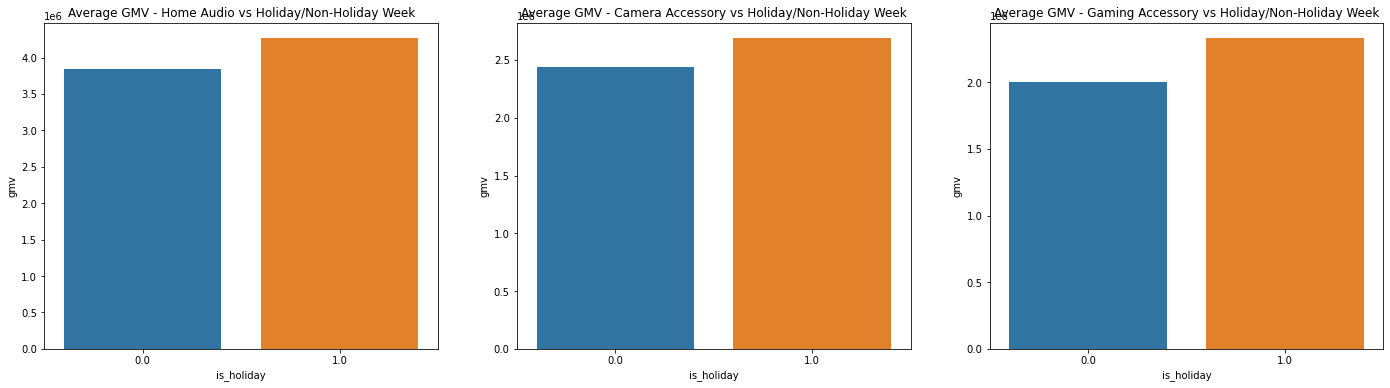

In [148]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 5: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [149]:
## Holiday week vs Average GMV
Holiday_week_sale_HA = final_home_audio_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_CA = final_camera_data.groupby('is_holiday')[['gmv']].sum().reset_index()
Holiday_week_sale_GA = final_gaming_data.groupby('is_holiday')[['gmv']].sum().reset_index()

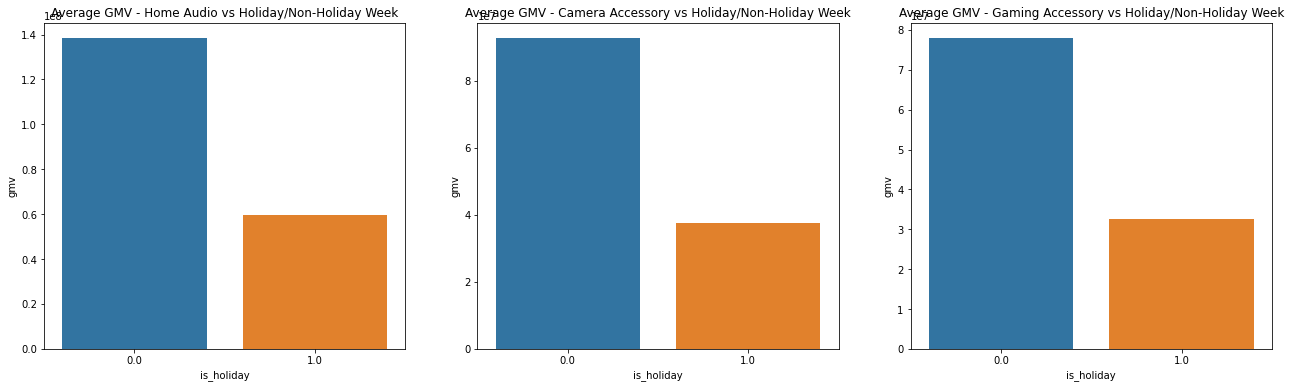

In [150]:
# figure size 
plt.figure(figsize=(22,6))

# subplot 1: Average GMV - Home Audio vs Holiday/Non-Holiday Week
ax1 = plt.subplot(1, 3, 1)
# ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Holiday/Non-Holiday Week")

# subplot 2: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
# ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Holiday/Non-Holiday Week")

# subplot 3: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
# ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_holiday', y='gmv', data=Holiday_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week")

plt.show()

In [151]:
## Speacial Sale week vs Average GMV
Special_week_sale_HA = final_home_audio_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_CA = final_camera_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()
Special_week_sale_GA = final_gaming_data.groupby('is_special_sale_day')[['gmv']].mean().reset_index()

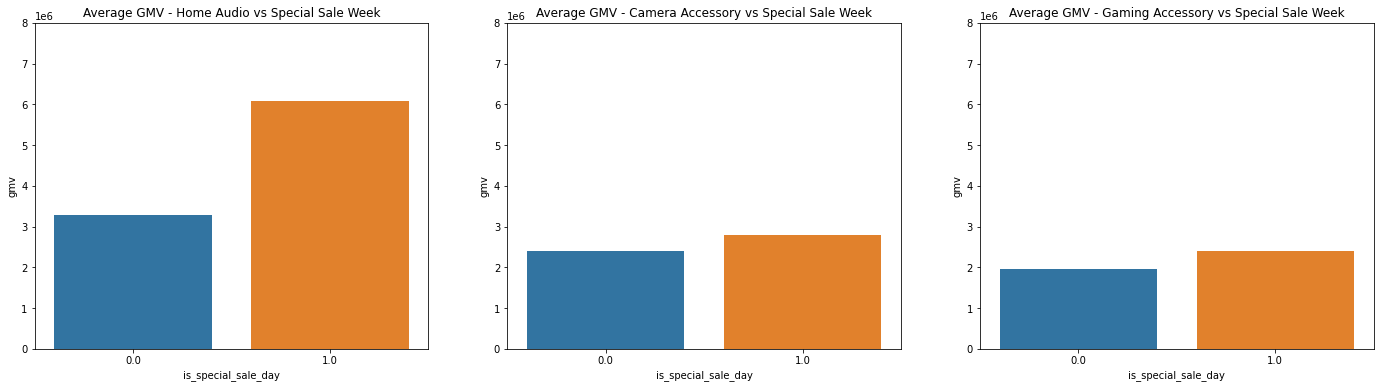

In [152]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Special Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_special_sale_day', y='gmv', data= Special_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Special Sale Week")

# subplot 2: Average GMV - Camera Accessory vs Holiday/Non-Holiday Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Special Sale Week")

# subplot 3: Average GMV - Gaming Accessory vs Holiday/Non-Holiday Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_special_sale_day', y='gmv', data=Special_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Special Sale Week")

plt.show()

In [153]:
## Pay day week vs Average GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].mean().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].mean().reset_index()

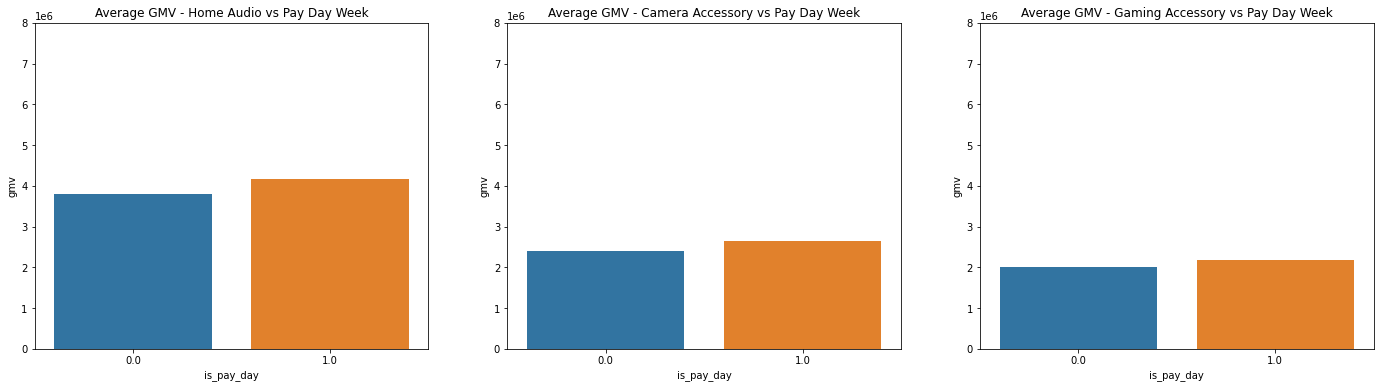

In [154]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Average GMV - Home Audio vs Pay Day Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,8000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Average GMV - Home Audio vs Pay Day Week")

# subplot 2: Average GMV - Camera Accessory vs Pay Day Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,8000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Average GMV - Camera Accessory vs Pay Day Week")

# subplot 3: Average GMV - Gaming Accessory vs Pay Day Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,8000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Average GMV - Gaming Accessory vs Pay Day Week")

plt.show()

In [155]:
## Pay Day week vs Total GMV
PayDay_week_sale_HA = final_home_audio_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_CA = final_camera_data.groupby('is_pay_day')[['gmv']].sum().reset_index()
PayDay_week_sale_GA = final_gaming_data.groupby('is_pay_day')[['gmv']].sum().reset_index()

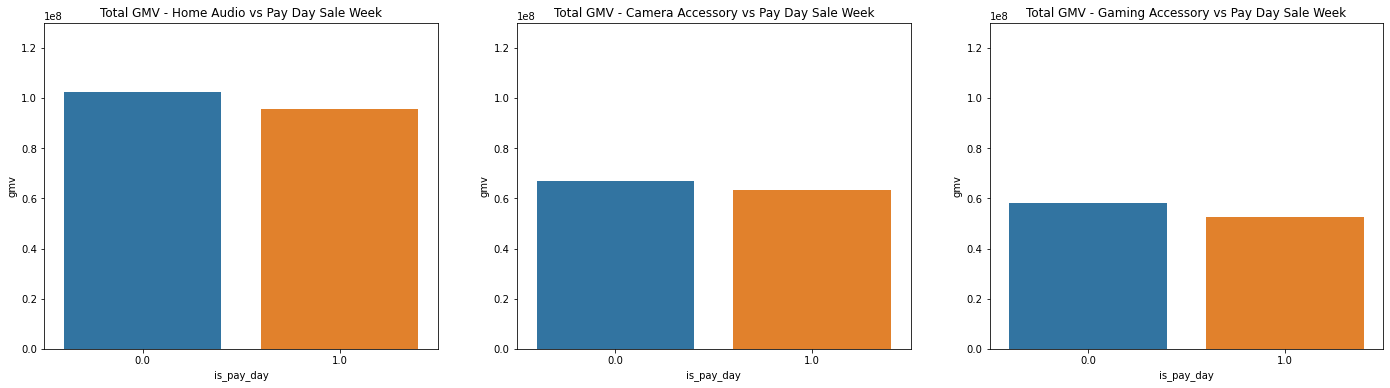

In [156]:
# increase figure size 
plt.figure(figsize=(24,6))

# subplot 1: Total GMV - Home Audio vs Pay Day Sale Week
ax1 = plt.subplot(1, 3, 1)
ax1.set_ylim(0,130000000)
ax1 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_HA)
ax1 = plt.title("Total GMV - Home Audio vs Pay Day Sale Week")

# subplot 2: Total GMV - Camera Accessory vs Pay Day Sale Week
ax2 = plt.subplot(1, 3, 2)
ax2.set_ylim(0,130000000)
ax2 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_CA)
ax2 = plt.title("Total GMV - Camera Accessory vs Pay Day Sale Week")

# subplot 3: Total GMV - Gaming Accessory vs Pay Day Sale Week
ax3 = plt.subplot(1, 3, 3)
ax3.set_ylim(0,130000000)
ax3 = sns.barplot(x='is_pay_day', y='gmv', data=PayDay_week_sale_GA)
ax3 = plt.title("Total GMV - Gaming Accessory vs Pay Day Sale Week")

plt.show()

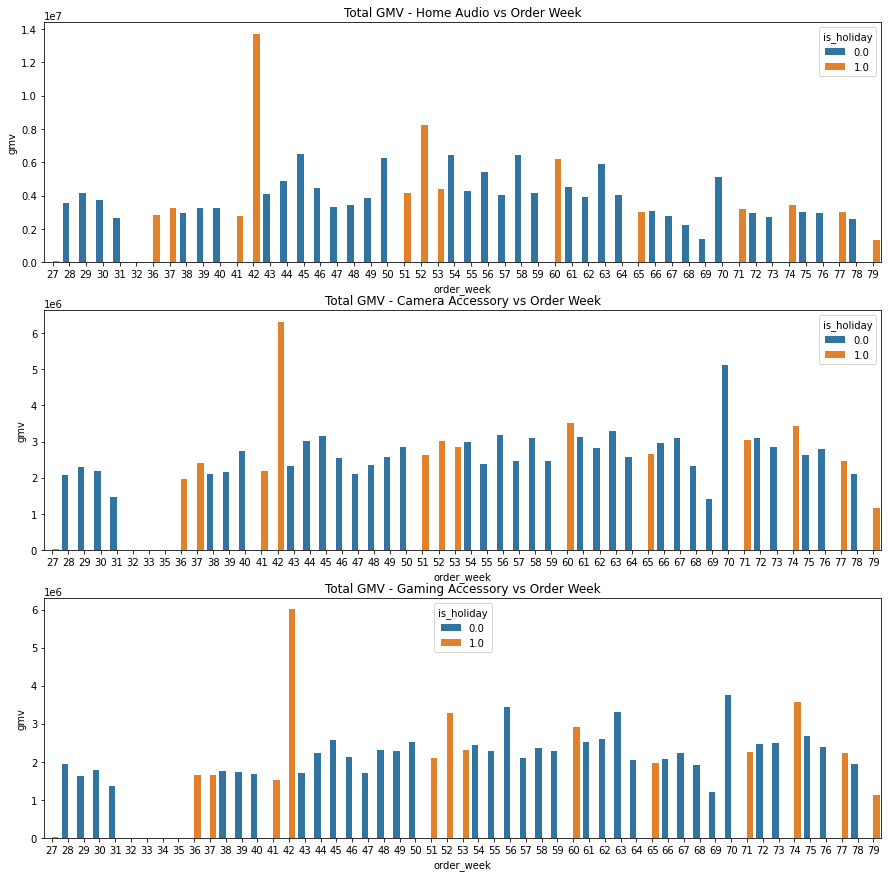

In [157]:
#Analyzing the total gmv over the weeks based upon whether the week contained a holiday or not for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_holiday')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")

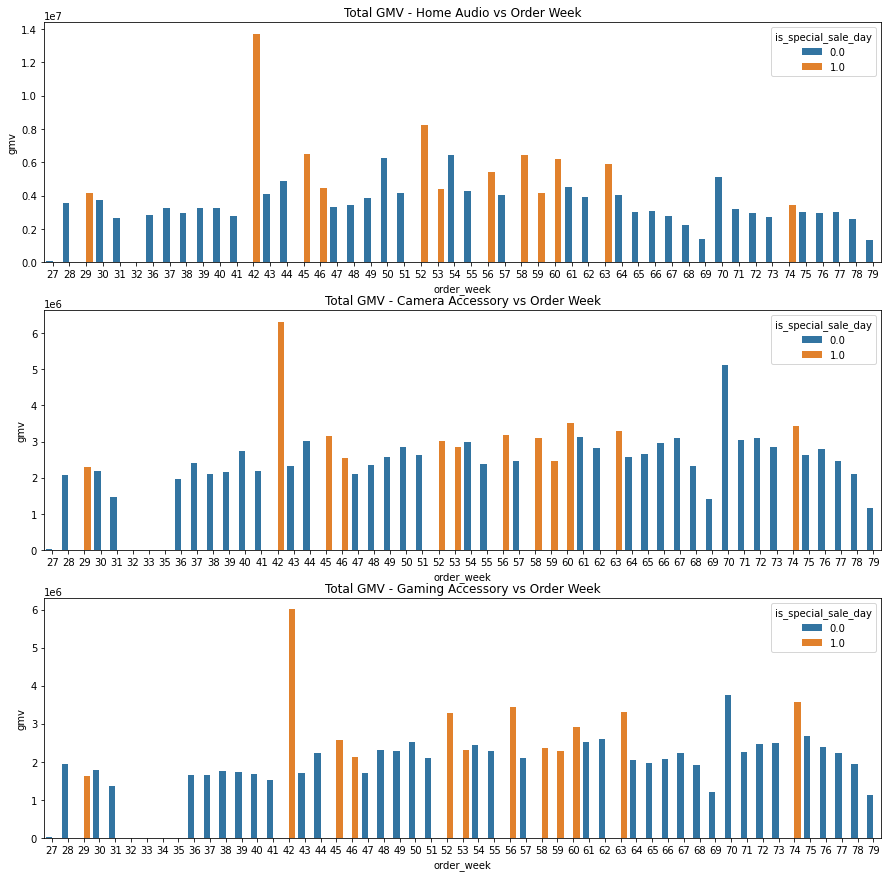

In [158]:
# Analyzing the total gmv over the weeks based upon specialday present in week for all the three categories
plt.figure(figsize = (15,15))
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_home_audio_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Home Audio vs Order Week")

ax1 = plt.subplot(3, 1, 2)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_camera_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Camera Accessory vs Order Week")

ax1 = plt.subplot(3, 1, 3)
ax1 = sns.barplot(x = 'order_week', y = 'gmv', data = final_gaming_data, hue = 'is_special_sale_day')
ax1 = plt.title("Total GMV - Gaming Accessory vs Order Week")

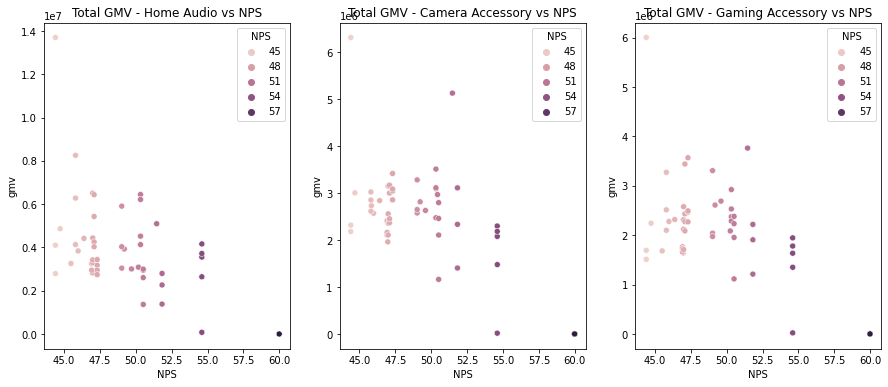

In [159]:
# Plot to see the trend b/w product_procurement_sla & NPS
plt.figure(figsize = (15,6))
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_home_audio_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Home Audio vs NPS")

ax1 = plt.subplot(1, 3, 2)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_camera_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Camera Accessory vs NPS")

ax1 = plt.subplot(1, 3, 3)
ax1 = sns.scatterplot(x = 'NPS', y = 'gmv', data = final_gaming_data, hue = 'NPS')
ax1 = plt.title("Total GMV - Gaming Accessory vs NPS")

<AxesSubplot:title={'center':'GMV vs NPS:Gaming Accessory'}, xlabel='NPS', ylabel='gmv'>

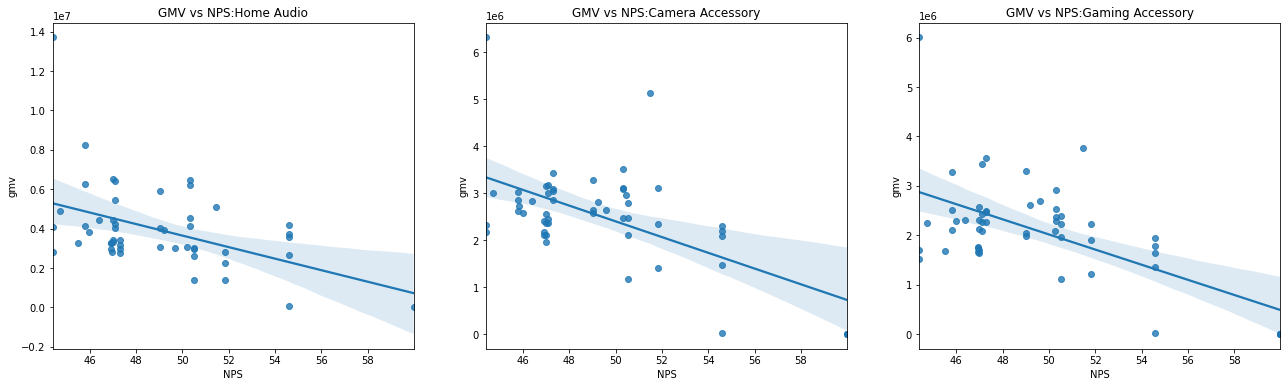

In [160]:
fig = plt.figure(figsize=(22,6))

ax1 = fig.add_subplot(131)
ax1.set_title('GMV vs NPS:Home Audio')
ax2 = fig.add_subplot(132)
ax2.set_title('GMV vs NPS:Camera Accessory')
ax3 = fig.add_subplot(133)
ax3.set_title('GMV vs NPS:Gaming Accessory')

sns.regplot(final_home_audio_data['NPS'],final_home_audio_data['gmv'],ax = ax1)
sns.regplot(final_camera_data['NPS'],final_camera_data['gmv'],ax = ax2)
sns.regplot(final_gaming_data['NPS'],final_gaming_data['gmv'],ax = ax3) 

# Climate Feature

In [161]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2015 = pd.read_excel(r"C:\Users\Hp\Desktop\Data Science\5. Capstone Project- Eomm\Case Study\ONTARIO-2015.xlsx", skiprows=24)

climate_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [162]:
# Skipping the first 24 rows while reading the data to ignore the metadata

climate_2016 = pd.read_excel(r"C:\Users\Hp\Desktop\Data Science\5. Capstone Project- Eomm\Case Study\ONTARIO-2016.xlsx", skiprows=24)

climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# Dropping the columns with all nulls

climate_2015.dropna(axis=1, thresh=1, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head(10)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,...,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,...,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,...,0.0,NaN,0.0,NaN,3.0,NaN,3.0,NaN,1.0,NaN
5,2015-01-06,2015,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-01-07,2015,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-01-08,2015,1,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-01-09,2015,1,9,†,-7.0,NaN,-14.0,NaN,-10.5,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,4.0,NaN
9,2015-01-10,2015,1,10,†,-2.5,NaN,NaN,M,NaN,...,NaN,M,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [164]:
climate_2016.dropna(axis=1, thresh=1, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head(10)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-06,2016,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-07,2016,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-08,2016,1,8,†,7.0,NaN,-14.0,NaN,-3.5,...,0.0,NaN,9.0,NaN,0.0,NaN,9.0,NaN,0.0,NaN
8,2016-01-09,2016,1,9,†,11.0,NaN,3.0,NaN,7.0,...,0.0,NaN,14.6,NaN,0.0,T,14.6,NaN,0.0,NaN
9,2016-01-10,2016,1,10,†,-1.5,NaN,-5.0,NaN,-3.3,...,0.0,NaN,0.0,NaN,7.0,NaN,7.0,NaN,0.0,T


In [165]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2015.columns:
    if 'Flag' in col:
        print(climate_2015[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2015.drop(drop_cols, axis=1, inplace=True)

print(climate_2015.columns)

M    13
Name: Max Temp Flag, dtype: int64

M    39
Name: Min Temp Flag, dtype: int64

M    39
Name: Mean Temp Flag, dtype: int64

M    39
Name: Heat Deg Days Flag, dtype: int64

M    39
Name: Cool Deg Days Flag, dtype: int64

T    7
Name: Total Rain Flag, dtype: int64

T    9
Name: Total Snow Flag, dtype: int64

T    12
Name: Total Precip Flag, dtype: int64

T    2
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [166]:
# Dropping columns with only one distinct value

drop_cols = []

for col in climate_2016.columns:
    if 'Flag' in col:
        print(climate_2016[col].value_counts())
        print()
        drop_cols.append(col)

drop_cols.append('Data Quality')

climate_2016.drop(drop_cols, axis=1, inplace=True)

print(climate_2016.columns)

M    1
Name: Max Temp Flag, dtype: int64

M    8
Name: Min Temp Flag, dtype: int64

M    8
Name: Mean Temp Flag, dtype: int64

M    8
Name: Heat Deg Days Flag, dtype: int64

M    8
Name: Cool Deg Days Flag, dtype: int64

T    3
Name: Total Rain Flag, dtype: int64

T    7
Name: Total Snow Flag, dtype: int64

T    7
Name: Total Precip Flag, dtype: int64

T    6
Name: Snow on Grnd Flag, dtype: int64

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)'],
      dtype='object')


In [167]:
# Formatting column names

climate_2015.columns = [col.replace(' (°C)','').strip() for col in climate_2015.columns]
climate_2016.columns = [col.replace(' (°C)','').strip() for col in climate_2016.columns]
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Max Temp', 'Min Temp',
       'Mean Temp', 'Heat Deg Days', 'Cool Deg Days', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)'],
      dtype='object')

In [168]:
# Dropping rows where all the columns have nulls

cols = ['Mean Temp',
 'Total Rain (mm)']

climate_2015.dropna(subset=cols, inplace=True)

climate_2015.reset_index(drop=True, inplace=True)

climate_2016.dropna(subset=cols, inplace=True)

climate_2016.reset_index(drop=True, inplace=True)

climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Year               190 non-null    int64         
 2   Month              190 non-null    int64         
 3   Day                190 non-null    int64         
 4   Max Temp           190 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    190 non-null    float64       
 10  Total Snow (cm)    190 non-null    float64       
 11  Total Precip (mm)  190 non-null    float64       
 12  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 19.4 KB


In [169]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [170]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          190 non-null    datetime64[ns]
 1   Year               190 non-null    int64         
 2   Month              190 non-null    int64         
 3   Day                190 non-null    int64         
 4   Max Temp           190 non-null    float64       
 5   Min Temp           190 non-null    float64       
 6   Mean Temp          190 non-null    float64       
 7   Heat Deg Days      190 non-null    float64       
 8   Cool Deg Days      190 non-null    float64       
 9   Total Rain (mm)    190 non-null    float64       
 10  Total Snow (cm)    190 non-null    float64       
 11  Total Precip (mm)  190 non-null    float64       
 12  Snow on Grnd (cm)  190 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 19.4 KB


In [171]:
# Extracting week # from the date field and formatting it

climate_2015['Date']= pd.to_datetime(climate_2015['Date/Time'], format='%Y-%m-%d')

climate_2015['order_week'] = climate_2015['Date'].dt.week

climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Date,order_week
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0,2015-01-01,1
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,1
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0,2015-01-03,1
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0,2015-01-04,1
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0,2015-01-05,2


In [172]:
# Extracting week # from the date field and formatting it

climate_2016['Date']= pd.to_datetime(climate_2016['Date/Time'], format='%Y-%m-%d')

climate_2016['order_week'] = climate_2016['Date'].dt.week

climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Date,order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,2016-01-08,1
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,2016-01-09,1
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,2016-01-10,1
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2016-01-12,2
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2016-01-14,2


In [173]:
climate_2015['order_week'] = climate_2015['order_week'].astype(int)

In [174]:
climate_2016['order_week'] = climate_2016['order_week'].astype(int)

In [175]:
#Mapping order_week according to the new logic
climate_2016['order_week'] = climate_2016.apply(lambda x: mapWeek(x['order_week'],x['Year']), axis = 1)

In [176]:
climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Date,order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,2016-01-08,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,2016-01-09,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,2016-01-10,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2016-01-12,55
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2016-01-14,55


In [177]:
# Extracting July to Dec month's data

climate_2015 = climate_2015[climate_2015['Month'] >= 7]
climate_2015.reset_index(drop=True, inplace=True)

climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Date,order_week
0,2015-07-01,2015,7,1,24.5,17.0,20.8,0.0,2.8,0.0,0.0,0.0,0.0,2015-07-01,27
1,2015-07-02,2015,7,2,24.0,14.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,2015-07-02,27
2,2015-07-03,2015,7,3,25.0,10.0,17.5,0.5,0.0,0.0,0.0,0.0,0.0,2015-07-03,27
3,2015-07-04,2015,7,4,26.0,11.0,18.5,0.0,0.5,0.0,0.0,0.0,0.0,2015-07-04,27
4,2015-07-05,2015,7,5,28.0,14.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0,2015-07-05,27


In [178]:
# Extracting Jan to June month's data

climate_2016 = climate_2016[climate_2016['Month'] <= 6]
climate_2016.reset_index(drop=True, inplace=True)

climate_2016.head()

,Date/Time,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Date,order_week
0,2016-01-08,2016,1,8,7.0,-14.0,-3.5,21.5,0.0,9.0,0.0,9.0,0.0,2016-01-08,54
1,2016-01-09,2016,1,9,11.0,3.0,7.0,11.0,0.0,14.6,0.0,14.6,0.0,2016-01-09,54
2,2016-01-10,2016,1,10,-1.5,-5.0,-3.3,21.3,0.0,0.0,7.0,7.0,0.0,2016-01-10,54
3,2016-01-12,2016,1,12,-5.0,-12.0,-8.5,26.5,0.0,0.0,0.0,0.0,12.0,2016-01-12,55
4,2016-01-14,2016,1,14,2.5,-10.5,-4.0,22.0,0.0,0.0,0.0,0.0,11.0,2016-01-14,55


In [179]:
climate_2015.sort_values(by=['order_week'], ascending = True, inplace = True)

In [180]:
climate_2016.sort_values(by=['order_week'], ascending = True, inplace = True)

In [181]:
# Getting weekly data

climate_2015 = climate_2015.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2015.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,28.0,10.0,19.360000,0.100000,1.460000,0.000000,0.0,0.000000,0.0
1,28,28.0,12.5,20.100000,0.283333,2.383333,4.416667,0.0,4.416667,0.0
2,29,33.0,11.0,23.183333,0.000000,5.183333,1.400000,0.0,1.400000,0.0
3,30,31.5,14.5,23.060000,0.000000,5.060000,1.080000,0.0,1.080000,0.0
4,31,33.5,16.0,24.566667,0.000000,6.566667,4.633333,0.0,4.633333,0.0


In [182]:
# Getting weekly data

climate_2016 = climate_2016.groupby(['order_week']).agg({'Max Temp':"max", 'Min Temp':"min", 'Mean Temp':"mean", 'Heat Deg Days':"mean", 'Cool Deg Days':"mean", 'Total Rain (mm)':"mean", 'Total Snow (cm)':"mean", 'Total Precip (mm)':"mean", 'Snow on Grnd (cm)':"mean"}).reset_index(drop=False)

climate_2016.head()

,order_week,Max Temp,Min Temp,Mean Temp,Heat Deg Days,Cool Deg Days,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,54,11.0,-14.0,0.066667,17.933333,0.0,7.866667,2.333333,10.200000,0.000000
1,55,4.5,-12.0,-3.733333,21.733333,0.0,2.533333,0.000000,2.533333,10.333333
2,57,5.5,-9.0,-1.800000,19.800000,0.0,0.000000,0.000000,0.000000,0.000000
3,58,13.0,-5.5,3.200000,14.800000,0.0,3.400000,0.000000,3.400000,0.000000
4,59,5.0,-18.0,-7.266667,25.266667,0.0,0.000000,2.666667,2.666667,2.000000


### Checking duplicates

In [183]:
climate_2015.duplicated().any()

False

In [184]:
climate_2016.duplicated().any()

False

In [185]:
climate_2015.isnull().values.any()

False

In [186]:
climate_2016.isnull().values.any()

False

In [187]:
climate = pd.concat([climate_2015, climate_2016], axis = 0)

climate.shape

(52, 10)

In [188]:
# Dropping redundant columns
climate_data=climate.drop('Max Temp',axis=1)
climate_data=climate_data.drop('Min Temp',axis=1)
climate_data=climate_data.drop('Heat Deg Days',axis=1)
climate_data=climate_data.drop('Cool Deg Days',axis=1)
climate_data=climate_data.drop('Total Snow (cm)',axis=1)
climate_data=climate_data.drop('Total Precip (mm)',axis=1)
climate_data=climate_data.drop('Snow on Grnd (cm)',axis=1)
climate_data.head()

,order_week,Mean Temp,Total Rain (mm)
0,27,19.360000,0.000000
1,28,20.100000,4.416667
2,29,23.183333,1.400000
3,30,23.060000,1.080000
4,31,24.566667,4.633333


In [189]:
# Final data Preparation for modeling for the 3 categories
final_camera_data_climate = pd.merge(final_camera_data,climate_data, on = "order_week", how = 'inner')
final_gaming_data_climate = pd.merge(final_gaming_data,climate_data, on = "order_week", how = 'inner')
final_home_audio_data_climate = pd.merge(final_home_audio_data,climate_data, on = "order_week", how = 'inner')

# Data Modelling

In [190]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

## Building the Basic Linear Models

### I. Camera Accessory - Basic Linear Model

In [191]:
# taking the final camera accessory data for basic linear mode
final_camera_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.0,0.0,4.0,13.0,0.0,14.0,0.0,0.0,1.0,1.0
1,28,7.0,2015.0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,439.0,0.0,228.0,19.0,0.0,367.0,0.0,0.0,13.0,16.0
2,29,7.0,2015.0,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,495.0,0.0,190.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7.0,2015.0,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,463.0,0.0,198.0,18.0,0.0,425.0,0.0,0.0,23.0,30.0
4,31,8.0,2015.0,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,...,367.0,0.0,118.0,26.0,0.0,235.0,0.0,0.0,23.0,13.0


In [192]:
# Let's drop the columns which is very unpredicteable due to market scanarios
df = final_camera_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [193]:
# checking the number of columns in the dataset
len(df.columns)

46

In [194]:
# printing the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [195]:
# splitting the data into test and train set
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [196]:
scaler = MinMaxScaler()

In [197]:
# Apply scaler() to all the columns except the categorical variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [198]:
# assigning the x_train and y_train values
y_train = df_train.pop('gmv')
X_train = df_train

## RFE

In [199]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [200]:
# selecting  the top 20 features selected by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'discount', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraMicrophone', 'CameraRemoteControl',
       'CameraTripod', 'Filter', 'Flash', 'ReflectorUmbrella', 'Strap',
       'Telescope'],
      dtype='object')

In [201]:
#checking  the features which are not included in the top 20 
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'sla', 'product_procurement_sla', 'NPS',
       'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMount',
       'ExtensionTube', 'FlashShoeAdapter', 'Lens', 'Softbox'],
      dtype='object')

In [202]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [203]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     320.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.58e-21
Time:                        20:09:19   Log-Likelihood:                 135.56
No. Observations:                  41   AIC:                            -229.1
Df Residuals:                      20   BIC:                            -193.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,3832.97
2,adStock_Digital,2650.75
3,adStock_Online marketing,2508.12
4,adStock_ Affiliates,2301.21
6,adStock_Radio,1238.96
7,adStock_Other,1210.15
1,adStock_TV,220.56
11,CameraBag,37.16
0,const,34.24
16,Filter,22.52


In [205]:
#removing the feature with highest p-values
X_train_new= X_train_rfe.drop(["CameraAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     329.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.38e-22
Time:                        20:26:42   Log-Likelihood:                 134.08
No. Observations:                  41   AIC:                            -228.2
Df Residuals:                      21   BIC:                            -193.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,3823.45
2,adStock_Digital,2643.60
3,adStock_Online marketing,2502.36
4,adStock_ Affiliates,2299.96
6,adStock_Radio,1189.87
7,adStock_Other,1150.63
1,adStock_TV,212.81
10,CameraBag,35.83
0,const,33.81
15,Filter,21.38


In [206]:
#removing the feature with highest p-values
X_train_new1 = X_train_new.drop(["discount"], axis = 1)

X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     341.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.64e-23
Time:                        20:29:00   Log-Likelihood:                 132.77
No. Observations:                  41   AIC:                            -227.5
Df Residuals:                      22   BIC:                            -195.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2788.40
3,adStock_Online marketing,1973.99
2,adStock_Digital,1944.08
4,adStock_ Affiliates,1756.70
6,adStock_Radio,891.11
7,adStock_Other,847.90
1,adStock_TV,145.02
9,CameraBag,35.10
14,Filter,19.90
0,const,16.71


In [207]:
#removing the feature with highest p-values
X_train_new2 = X_train_new1.drop(["Telescope"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     303.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.41e-23
Time:                        20:32:45   Log-Likelihood:                 128.25
No. Observations:                  41   AIC:                            -220.5
Df Residuals:                      23   BIC:                            -189.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,2504.17
3,adStock_Online marketing,1973.15
4,adStock_ Affiliates,1756.41
2,adStock_Digital,1705.53
6,adStock_Radio,758.66
7,adStock_Other,721.43
1,adStock_TV,130.62
9,CameraBag,26.93
14,Filter,18.75
0,const,16.28


In [208]:
# dropping feature based on the highest p-value
X_train_new3 = X_train_new2.drop(["CameraRemoteControl"], axis = 1)

X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     282.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.32e-23
Time:                        20:33:10   Log-Likelihood:                 124.68
No. Observations:                  41   AIC:                            -215.4
Df Residuals:                      24   BIC:                            -186.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [209]:
#removing the feature with highest p-values
X_train_new4 = X_train_new3.drop(["CameraMicrophone"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
 
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     251.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.95e-23
Time:                        20:33:41   Log-Likelihood:                 120.19
No. Observations:                  41   AIC:                            -208.4
Df Residuals:                      25   BIC:                            -181.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1314.19
3,adStock_Online marketing,969.77
2,adStock_Digital,934.92
4,adStock_ Affiliates,803.68
6,adStock_Radio,616.98
7,adStock_Other,584.76
1,adStock_TV,70.30
9,CameraBag,26.17
12,Filter,16.08
0,const,15.11


In [210]:
#removing the feature with highest p-values
X_train_new5 = X_train_new4.drop(["ReflectorUmbrella"], axis = 1)
# Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     256.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.51e-24
Time:                        20:34:14   Log-Likelihood:                 118.40
No. Observations:                  41   AIC:                            -206.8
Df Residuals:                      26   BIC:                            -181.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1210.11
2,adStock_Digital,869.31
3,adStock_Online marketing,830.16
4,adStock_ Affiliates,693.62
6,adStock_Radio,616.65
7,adStock_Other,584.66
1,adStock_TV,68.49
9,CameraBag,24.59
12,Filter,16.03
0,const,14.28


In [211]:
#removing the feature with highest p-values
X_train_new6 = X_train_new5.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.95e-24
Time:                        20:34:39   Log-Likelihood:                 114.31
No. Observations:                  41   AIC:                            -200.6
Df Residuals:                      27   BIC:                            -176.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1208.69
2,adStock_Digital,869.16
3,adStock_Online marketing,801.45
4,adStock_ Affiliates,653.27
6,adStock_Radio,594.43
7,adStock_Other,563.42
1,adStock_TV,67.06
0,const,13.49
8,Binoculars,7.75
13,Strap,7.51


In [212]:
#removing the feature with highest VIF
X_train_new7= X_train_new6.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.17e-20
Time:                        20:36:54   Log-Likelihood:                 95.529
No. Observations:                  41   AIC:                            -165.1
Df Residuals:                      28   BIC:                            -142.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,354.81
4,adStock_ Affiliates,283.73
5,adStock_Radio,210.59
6,adStock_Other,186.31
1,adStock_TV,24.89
0,const,12.85
7,Binoculars,7.75
12,Strap,7.03
11,Flash,6.40
8,CameraBattery,6.18


In [214]:
#removing the feature with highest p-values
X_train_new8= X_train_new7.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     117.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.51e-21
Time:                        20:40:08   Log-Likelihood:                 95.528
No. Observations:                  41   AIC:                            -167.1
Df Residuals:                      29   BIC:                            -146.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,309.08
3,adStock_ Affiliates,276.67
4,adStock_Radio,46.69
5,adStock_Other,40.24
0,const,12.78
11,Strap,6.62
10,Flash,6.39
6,Binoculars,6.06
1,adStock_Digital,5.47
9,Filter,5.47


In [215]:
#removing the feature with highest p-values
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.65e-22
Time:                        20:41:15   Log-Likelihood:                 95.514
No. Observations:                  41   AIC:                            -169.0
Df Residuals:                      30   BIC:                            -150.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,100.30
3,adStock_ Affiliates,92.58
0,const,12.40
9,Flash,6.08
10,Strap,6.04
5,Binoculars,5.41
8,Filter,5.21
6,CameraBattery,4.20
7,CameraTripod,3.00
1,adStock_Digital,2.72


In [216]:
#removing the feature with highest p-values
X_train_new10= X_train_new9.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.87e-23
Time:                        20:41:53   Log-Likelihood:                 95.117
No. Observations:                  41   AIC:                            -170.2
Df Residuals:                      31   BIC:                            -153.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
2,adStock_Online marketing,99.94
3,adStock_ Affiliates,91.04
0,const,12.36
9,Strap,5.89
8,Flash,5.64
7,Filter,5.04
4,Binoculars,4.85
5,CameraBattery,4.16
6,CameraTripod,2.94
1,adStock_Digital,2.69


In [217]:
#removing the feature with highest p-values
X_train_new11= X_train_new10.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.50e-24
Time:                        20:42:19   Log-Likelihood:                 94.549
No. Observations:                  41   AIC:                            -171.1
Df Residuals:                      32   BIC:                            -155.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,12.15
8,Strap,5.81
7,Flash,5.34
6,Filter,5.04
3,Binoculars,4.85
4,CameraBattery,4.15
5,CameraTripod,2.90
1,adStock_Digital,2.18
2,adStock_Online marketing,2.13


In [218]:
#removing the feature with highest p-values
X_train_new12= X_train_new11.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new12)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.52e-25
Time:                        20:42:48   Log-Likelihood:                 93.515
No. Observations:                  41   AIC:                            -171.0
Df Residuals:                      33   BIC:                            -157.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.66
3,Binoculars,4.85
6,Filter,4.73
4,CameraBattery,2.92
5,CameraTripod,2.89
7,Flash,2.85
1,adStock_Digital,2.18
2,adStock_Online marketing,2.02


In [219]:
#removing the feature with highest vif as all the p-values were in the acceptable range.
X_train_new13= X_train_new12.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.65e-25
Time:                        20:43:33   Log-Likelihood:                 91.582
No. Observations:                  41   AIC:                            -169.2
Df Residuals:                      34   BIC:                            -157.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.65
5,Filter,4.62
2,Binoculars,4.49
3,CameraBattery,2.84
4,CameraTripod,2.84
6,Flash,2.21
1,adStock_Online marketing,1.84


In [220]:
#removing the feature with highest p-values
X_train_new14= X_train_new13.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     220.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.10e-25
Time:                        20:44:04   Log-Likelihood:                 88.530
No. Observations:                  41   AIC:                            -165.1
Df Residuals:                      35   BIC:                            -154.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0451      0.014      3.242

,Features,VIF
0,const,8.69
4,Filter,4.61
1,Binoculars,4.40
2,CameraBattery,2.78
3,CameraTripod,2.46
5,Flash,1.74


In [221]:
# Dropping feature based on the highest p-value
X_train_new15= X_train_new14.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new15)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     212.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.64e-24
Time:                        20:44:54   Log-Likelihood:                 82.883
No. Observations:                  41   AIC:                            -155.8
Df Residuals:                      36   BIC:                            -147.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0510      0.016      3.266

,Features,VIF
0,const,8.55
3,Filter,3.59
1,CameraBattery,2.69
2,CameraTripod,2.26
4,Flash,1.41


In [222]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new16= X_train_new15.drop(["Filter"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3 .values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     123.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.59e-19
Time:                        20:45:34   Log-Likelihood:                 66.351
No. Observations:                  41   AIC:                            -124.7
Df Residuals:                      37   BIC:                            -117.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0336      0.023      1.477

,Features,VIF
0,const,8.31
1,CameraBattery,1.87
2,CameraTripod,1.50
3,Flash,1.37


In [223]:
# Dropping another feature to see if the model is able to explain the variance with one less feature or not based upon minimum loss in adjusted r-squared
X_train_new17= X_train_new16.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm4 = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.params
print(lr4.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm4 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm4 .values, i) for i in range(X_train_lm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     69.88
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.86e-13
Time:                        20:46:04   Log-Likelihood:                 48.831
No. Observations:                  41   AIC:                            -91.66
Df Residuals:                      38   BIC:                            -86.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1431      0.025      5.683   

,Features,VIF
0,const,4.45
1,CameraTripod,1.00
2,Flash,1.00


In [225]:
# k-fold CV - adjusted R-squared
lm = LinearRegression()
#Checking performance of top 3 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_test, y_test , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.6199985279596929
lr model 2 r2_score 0.6009214782863639
lr model 3 r2_score 0.2986176009713508


In [226]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [227]:
# k-fold CV
lm = LinearRegression()
# scores = cross_val_score(lm, X_train_lm4, y_train, scoring='r2', cv=5)
# scores

#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm, X_train_lm2, X_train_lm3, X_train_lm4]
for i in range(0,len(x_trains)):
    x_test = df[x_trains[i].drop('const',axis = 1).columns]
    x_test = sm.add_constant(x_test)
    y_test = df['gmv']
    scores = cross_val_score(lm, x_trains[i], y_train , scoring='neg_mean_squared_error', cv=10)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.002159177407993728
lr model 2 MSE 0.002532294969965967
lr model 3 MSE 0.00434234100112806
lr model 4 MSE 0.008977592319219465


### Model Evaluation

In [228]:
y_test = df_test.pop('gmv')
X_test = df_test

In [229]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [230]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
6,33,8.0,2015.0,0.004718,0.582850,0.039426,0.000125,0.011255,0.018719,0.314261,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
32,60,2.0,2016.0,0.443223,0.719892,0.242692,0.718649,0.867712,0.973066,0.540055,...,0.957983,0.0,0.758123,0.687636,0.0,0.652516,0.0,0.0,0.731707,0.483333
38,66,4.0,2016.0,0.991014,0.523523,0.632439,0.191658,0.674726,0.794861,0.472594,...,0.686675,0.4,0.740072,0.628200,0.0,0.619497,0.0,1.0,0.731707,0.750000
35,63,3.0,2016.0,1.000000,0.713556,0.627198,0.419032,0.685303,0.789812,0.486849,...,0.798319,1.0,1.000000,0.654230,0.0,0.690252,1.0,0.0,0.951220,0.783333
33,61,2.0,2016.0,0.425098,0.757920,0.253341,0.696704,0.859520,0.964550,0.544868,...,0.975990,0.6,0.707581,0.878959,0.0,0.581761,0.0,1.0,0.975610,0.716667


In [231]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_Digital,adStock_Online marketing,Binoculars,CameraBattery,CameraTripod,Filter,Flash
6,1.0,0.582850,0.011255,0.000000,0.000000,0.000000,0.000000,0.000000
32,1.0,0.719892,0.867712,0.869565,1.000000,0.957983,0.758123,0.687636
38,1.0,0.523523,0.674726,0.902174,0.741096,0.686675,0.740072,0.628200
35,1.0,0.713556,0.685303,0.880435,0.747260,0.798319,1.000000,0.654230
33,1.0,0.757920,0.859520,1.000000,0.543151,0.975990,0.707581,0.878959
51,1.0,0.000000,0.000000,0.420290,0.169178,0.144058,0.350181,0.227332
5,1.0,0.631843,0.016878,0.000000,0.000000,0.000000,0.000000,0.000000
26,1.0,0.591075,0.879030,0.876812,0.364384,1.000000,0.736462,0.880260
25,1.0,1.000000,0.773384,0.887681,0.419863,0.909964,0.826715,0.358351
45,1.0,0.318602,1.000000,0.989130,0.506164,0.501801,0.678700,0.686768


In [232]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

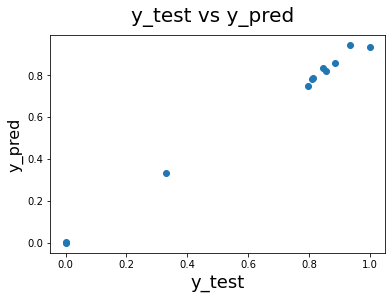

In [233]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Elasticity - Camera Accessory - Basic Linear Model

In [234]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

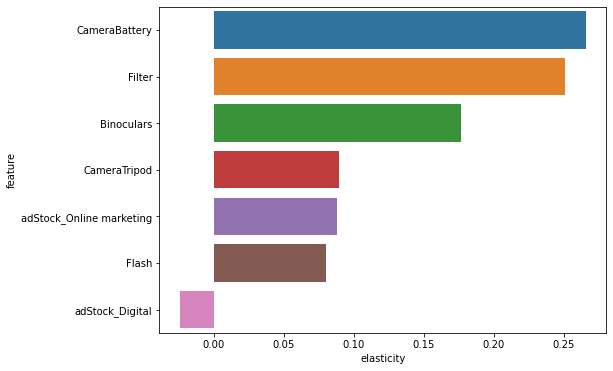

In [236]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## II. Gaming Accessory - Basic Linear Model

In [237]:
# Creating df1 by dropping the features which the company cannot control
df1= final_gaming_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)

In [238]:
#Checking the columns
df1.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [239]:
#Doing the test train split
np.random.seed(0)
df1_train, df1_test = train_test_split(df1, train_size = 0.8, test_size = 0.2, random_state = 100)

In [240]:
#Scaling the features
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df1_train[num_vars1] = scaler.fit_transform(df1_train[num_vars1])
df1_test[num_vars1] = scaler.fit_transform(df1_test[num_vars1])

In [241]:
# assiging the values for x_train & y_train
y_train1 = df1_train.pop('gmv')
X_train1 = df1_train

## RFE

In [242]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train1, y_train1)

In [243]:
## selecting the top 20 rfe features
col = X_train1.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'NPS', 'CoolingPad', 'GamePad',
       'GamingAccessoryKit', 'GamingChargingStation', 'GamingHeadset',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [244]:
## checking the columns excluded by rfe
X_train1.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Content Marketing', 'sla',
       'product_procurement_sla', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day',
       'GameControlMount', 'GamingAdapter', 'GamingKeyboard',
       'JoystickGamingWheel'],
      dtype='object')

In [245]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train1[col]

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe1)
# Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     157.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.55e-18
Time:                        20:52:58   Log-Likelihood:                 121.66
No. Observations:                  42   AIC:                            -201.3
Df Residuals:                      21   BIC:                            -164.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
6,adStock_SEM,2597.53
2,adStock_Digital,1945.81
4,adStock_Online marketing,1726.47
5,adStock_ Affiliates,1660.98
7,adStock_Radio,1321.21
8,adStock_Other,1308.34
1,adStock_TV,175.03
0,const,166.93
3,adStock_Sponsorship,34.99
9,NPS,14.85


In [246]:
# removing the feature with highest p-value
X_train1_new= X_train_rfe1.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new)
  
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.27e-19
Time:                        20:54:03   Log-Likelihood:                 121.46
No. Observations:                  42   AIC:                            -202.9
Df Residuals:                      22   BIC:                            -168.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
5,adStock_SEM,1519.52
2,adStock_Digital,1178.08
6,adStock_Radio,976.98
7,adStock_Other,925.12
0,const,138.50
1,adStock_TV,96.55
4,adStock_Online marketing,75.62
3,adStock_Sponsorship,25.34
8,NPS,12.96
15,GamingMouse,8.99


In [247]:
# removing the feature with highest p-values
X_train1_new1= X_train1_new.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new1)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     189.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.55e-21
Time:                        20:54:42   Log-Likelihood:                 121.35
No. Observations:                  42   AIC:                            -204.7
Df Residuals:                      23   BIC:                            -171.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_SEM,1120.55
5,adStock_Radio,954.84
2,adStock_Digital,943.16
6,adStock_Other,908.26
0,const,118.33
1,adStock_TV,95.43
3,adStock_Online marketing,62.19
7,NPS,11.60
14,GamingMouse,8.45
12,GamingHeadset,8.03


In [248]:
# dropping feature on the basis of highest p-value
X_train1_new2= X_train1_new1.drop(["GamingChargingStation"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new2)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.19e-22
Time:                        20:55:10   Log-Likelihood:                 121.16
No. Observations:                  42   AIC:                            -206.3
Df Residuals:                      24   BIC:                            -175.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_SEM,1114.22
2,adStock_Digital,938.33
5,adStock_Radio,925.26
6,adStock_Other,881.62
0,const,117.86
1,adStock_TV,93.94
3,adStock_Online marketing,60.94
7,NPS,11.55
11,GamingHeadset,7.92
13,GamingMouse,7.59


In [249]:
# removing feature on the basis of highest vif value  as all the p-values are in acceptable range
X_train1_new3= X_train1_new2.drop(["GamingMousePad"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new3)
    # Create a first fitted model
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     227.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.11e-23
Time:                        20:55:38   Log-Likelihood:                 120.99
No. Observations:                  42   AIC:                            -208.0
Df Residuals:                      25   BIC:                            -178.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_SEM,1114.21
2,adStock_Digital,938.33
5,adStock_Radio,914.97
6,adStock_Other,873.18
0,const,117.56
1,adStock_TV,93.11
3,adStock_Online marketing,57.99
7,NPS,11.55
11,GamingHeadset,7.85
9,GamePad,5.95


In [250]:
# removing feature on the basis of highest p-value
X_train1_new4= X_train1_new3.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new4)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.89e-24
Time:                        20:56:13   Log-Likelihood:                 119.97
No. Observations:                  42   AIC:                            -207.9
Df Residuals:                      26   BIC:                            -180.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [251]:
# removing feature on the basis of highest p-value
X_train1_new5= X_train1_new4.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new5)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.80e-24
Time:                        20:56:38   Log-Likelihood:                 116.25
No. Observations:                  42   AIC:                            -202.5
Df Residuals:                      27   BIC:                            -176.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_Radio,197.05
5,adStock_Other,180.75
2,adStock_Online marketing,41.55
1,adStock_TV,36.80
0,const,10.44
9,GamingHeadset,6.91
7,GamePad,5.31
8,GamingAccessoryKit,4.71
11,GamingMouse,4.17
14,TVOutCableAccessory,3.08


In [252]:
# removing feature on the basis of highest p-value
X_train1_new6= X_train1_new5.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new6)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.76e-25
Time:                        20:57:13   Log-Likelihood:                 116.00
No. Observations:                  42   AIC:                            -204.0
Df Residuals:                      28   BIC:                            -179.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Radio,192.79
4,adStock_Other,178.32
2,adStock_Online marketing,36.47
1,adStock_TV,36.01
0,const,10.42
8,GamingHeadset,5.79
6,GamePad,5.31
7,GamingAccessoryKit,4.68
10,GamingMouse,3.03
13,TVOutCableAccessory,3.03


In [253]:
# removing feature on the basis of highest p-value
X_train1_new7= X_train1_new6.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new7)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     240.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.20e-25
Time:                        20:57:59   Log-Likelihood:                 113.08
No. Observations:                  42   AIC:                            -200.2
Df Residuals:                      29   BIC:                            -177.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.40
2,adStock_Online marketing,5.68
5,GamePad,5.25
1,adStock_TV,4.61
6,GamingAccessoryKit,4.60
7,GamingHeadset,3.06
12,TVOutCableAccessory,3.02
3,adStock_Radio,2.87
11,MotionController,2.82
9,GamingMouse,2.61


In [254]:
# removing feature on the basis of highest p-value
X_train1_new8= X_train1_new7.drop(["GamingMemoryCard"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new8)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     249.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.41e-26
Time:                        20:58:27   Log-Likelihood:                 111.36
No. Observations:                  42   AIC:                            -198.7
Df Residuals:                      30   BIC:                            -177.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.26
2,adStock_Online marketing,5.58
5,GamePad,5.25
6,GamingAccessoryKit,4.52
1,adStock_TV,4.48
7,GamingHeadset,3.05
11,TVOutCableAccessory,2.92
8,GamingMouse,2.60
10,MotionController,2.55
9,GamingSpeaker,2.33


In [255]:
# removing feature on the basis of highest p-value
X_train1_new9= X_train1_new8.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new9)
   
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     250.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.13e-27
Time:                        20:58:51   Log-Likelihood:                 108.79
No. Observations:                  42   AIC:                            -195.6
Df Residuals:                      31   BIC:                            -176.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,10.09
4,GamePad,5.21
5,GamingAccessoryKit,4.50
1,adStock_Online marketing,3.06
6,GamingHeadset,2.99
10,TVOutCableAccessory,2.77
7,GamingMouse,2.59
2,adStock_Radio,1.97
8,GamingSpeaker,1.96
9,MotionController,1.88


In [256]:
# removing feature on the basis of highest p-value
X_train1_new10= X_train1_new9.drop(["MotionController"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new10)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     274.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.07e-27
Time:                        20:59:12   Log-Likelihood:                 107.84
No. Observations:                  42   AIC:                            -195.7
Df Residuals:                      32   BIC:                            -178.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,9.88
4,GamePad,4.98
5,GamingAccessoryKit,4.39
6,GamingHeadset,2.99
1,adStock_Online marketing,2.89
9,TVOutCableAccessory,2.77
7,GamingMouse,2.59
2,adStock_Radio,1.92
8,GamingSpeaker,1.84
3,CoolingPad,1.63


In [257]:
# removing feature on the basis of highest p-value
X_train1_new11= X_train1_new10.drop(["CoolingPad"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new11)

lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     299.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.64e-28
Time:                        20:59:55   Log-Likelihood:                 106.51
No. Observations:                  42   AIC:                            -195.0
Df Residuals:                      33   BIC:                            -179.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,9.87
3,GamePad,4.54
4,GamingAccessoryKit,3.97
5,GamingHeadset,2.97
1,adStock_Online marketing,2.73
8,TVOutCableAccessory,2.64
6,GamingMouse,2.45
2,adStock_Radio,1.77
7,GamingSpeaker,1.52


In [258]:
# removing feature on the basis of highest p-value
X_train1_new12= X_train1_new11.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new12)
    
lr = sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     328.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.62e-29
Time:                        21:00:14   Log-Likelihood:                 105.09
No. Observations:                  42   AIC:                            -194.2
Df Residuals:                      34   BIC:                            -180.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0098    

,Features,VIF
0,const,9.39
2,GamePad,3.88
3,GamingAccessoryKit,3.42
4,GamingHeadset,2.82
5,GamingMouse,2.40
7,TVOutCableAccessory,2.27
6,GamingSpeaker,1.50
1,adStock_Radio,1.45


In [259]:
# removing feature on the basis of highest p-value
X_train1_new13= X_train1_new12.drop(["TVOutCableAccessory"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new13)
    
lr= sm.OLS(y_train1, X_train_lm1).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     327.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.16e-29
Time:                        21:00:29   Log-Likelihood:                 101.22
No. Observations:                  42   AIC:                            -188.4
Df Residuals:                      35   BIC:                            -176.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0142      0

,Features,VIF
0,const,9.15
3,GamingAccessoryKit,3.27
2,GamePad,3.23
4,GamingHeadset,2.65
5,GamingMouse,2.30
6,GamingSpeaker,1.45
1,adStock_Radio,1.42


In [260]:
# removing feature on the basis of highest p-value
X_train1_new14= X_train1_new13.drop(["GamingSpeaker"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train1_new14)
    
lr1= sm.OLS(y_train1, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     350.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.86e-29
Time:                        21:00:54   Log-Likelihood:                 98.265
No. Observations:                  42   AIC:                            -184.5
Df Residuals:                      36   BIC:                            -174.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0103      0

,Features,VIF
0,const,8.94
3,GamingAccessoryKit,3.23
2,GamePad,3.21
4,GamingHeadset,2.55
5,GamingMouse,2.24
1,adStock_Radio,1.27


In [261]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new15= X_train1_new14.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train1_new15)

lr2= sm.OLS(y_train1, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     288.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.50e-27
Time:                        21:01:19   Log-Likelihood:                 89.140
No. Observations:                  42   AIC:                            -168.3
Df Residuals:                      37   BIC:                            -159.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0274      0.013      2.043

,Features,VIF
0,const,7.95
4,GamingMouse,2.21
3,GamingHeadset,2.14
2,GamePad,1.72
1,adStock_Radio,1.22


In [262]:
# Dropping the feature to see if the model is able to explain much variance with one less feature
X_train1_new16= X_train1_new15.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm3 = sm.add_constant(X_train1_new16)
    # Create a first fitted model
lr3= sm.OLS(y_train1, X_train_lm3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     331.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.83e-27
Time:                        21:01:54   Log-Likelihood:                 85.600
No. Observations:                  42   AIC:                            -163.2
Df Residuals:                      38   BIC:                            -156.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0283      0.014      1.963

,Features,VIF
0,const,7.95
3,GamingMouse,2.09
2,GamingHeadset,1.79
1,GamePad,1.72


In [263]:
#Checking performance of top 3 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9438566421798363
lr model 2 r2_score 0.9137782206022319
lr model 3 r2_score 0.8965383073852854


In [264]:
#Checking performance of top 4 models finding MSE
x_trains = [X_train_lm1, X_train_lm2, X_train_lm3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train1 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.0015669873192791217
lr model 2 MSE 0.002685458343256704
lr model 3 MSE 0.0035124461722720406


### Model Evaluation

In [265]:
y_test = df1_test.pop('gmv')
X_test = df1_test

In [266]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'NPS', 'discount', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [267]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
25,52,12.0,2015.0,0.625065,0.602123,1.000000,0.865805,0.775506,0.801676,0.757105,...,1.0,0.854663,0.689394,1.000000,0.610190,0.873016,0.236364,0.154321,0.882353,0.644444
48,75,6.0,2016.0,0.195600,0.240428,0.587229,0.429150,0.638194,0.649825,0.424692,...,0.0,0.511102,0.893939,0.106796,0.518723,0.507937,1.000000,1.000000,0.411765,0.883333
52,79,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.223658,0.515152,0.016181,0.162676,0.134921,0.145455,0.530864,0.647059,0.344444
37,64,3.0,2016.0,1.000000,0.428914,0.703707,0.347305,0.657291,0.747058,0.365682,...,0.0,0.361324,0.992424,0.085761,0.332106,0.500000,0.145455,0.197531,0.470588,1.000000
6,33,8.0,2015.0,0.004296,0.356415,0.040315,0.000115,0.011255,0.018358,0.241135,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [268]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_Radio,GamePad,GamingAccessoryKit,GamingHeadset,GamingMouse
25,1.0,0.000000,1.000000,0.846154,0.854663,0.610190
48,1.0,0.420988,0.922949,1.000000,0.511102,0.518723
52,1.0,0.000000,0.344656,0.466346,0.223658,0.162676
37,1.0,0.481185,0.821872,0.889423,0.361324,0.332106
6,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
18,1.0,0.000000,0.966860,0.927885,0.415826,1.000000
20,1.0,0.000000,0.601491,0.802885,0.327412,0.238797
46,1.0,0.814815,0.766363,0.913462,0.800969,0.370780
5,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
31,1.0,1.000000,0.724109,0.557692,0.643117,0.432781


In [269]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

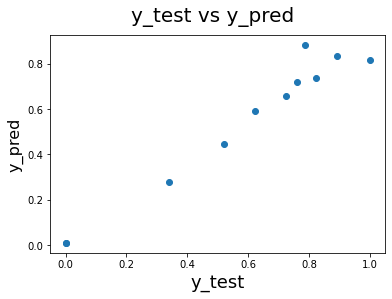

In [270]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Elasticity - Gaming Accessory - Basic Linear Model

In [271]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train1, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

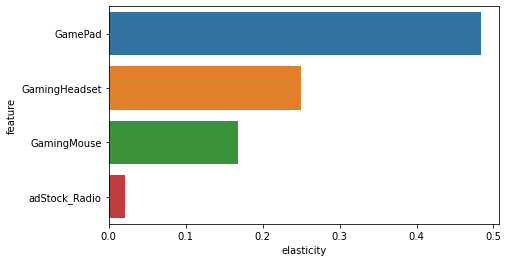

In [272]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## III. Home Audio - Basic Linear Model

In [273]:
# Dropping the unnecessary features which the company cannot control from the Home Audio data frame with KPIs
df2= final_home_audio_data.drop(['selling_price','units','product_mrp','total_transactions'], axis = 1)
df2.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [274]:
#Doing the test-train split
np.random.seed(0)
df2_train, df2_test = train_test_split(df2, train_size = 0.8, test_size = 0.2, random_state = 100)

In [275]:
scaler=MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars2=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df2_train[num_vars2] = scaler.fit_transform(df2_train[num_vars2])
df2_test[num_vars2] = scaler.fit_transform(df2_test[num_vars2])

In [276]:
# Splitting into X_train & y_train
y_train2 = df2_train.pop('gmv')
X_train2 = df2_train

### RFE

In [277]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train2, y_train2)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train2, y_train2)

In [278]:
# selecting the top 20 features given by rfe
col = X_train2.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'is_holiday', 'total_pay_days', 'BoomBox', 'Dock', 'FMRadio',
       'HomeAudioSpeaker', 'VoiceRecorder'],
      dtype='object')

In [279]:
# checking the features not selected in top 20
X_train2.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'sla', 'total_premiumness',
       'total_special_sale_days', 'is_special_sale_day', 'is_pay_day',
       'DJController', 'DockingStation', 'HiFiSystem', 'SlingBox',
       'SoundMixer'],
      dtype='object')

In [280]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe2 = X_train2[col]

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)
# Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1748.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.45e-27
Time:                        21:05:39   Log-Likelihood:                 168.76
No. Observations:                  40   AIC:                            -295.5
Df Residuals:                      19   BIC:                            -260.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
7,adStock_SEM,3843.47
2,adStock_Digital,2475.58
9,adStock_Other,2389.50
8,adStock_Radio,2205.65
6,adStock_ Affiliates,1768.29
5,adStock_Online marketing,1586.97
0,const,886.00
1,adStock_TV,297.71
4,adStock_Content Marketing,270.73
3,adStock_Sponsorship,93.69


In [281]:
# removing the feature based on the highest p-value
X_train2_new= X_train_rfe2.drop(["adStock_ Affiliates"], axis = 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train2_new)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1886.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.86e-28
Time:                        21:05:40   Log-Likelihood:                 168.23
No. Observations:                  40   AIC:                            -296.5
Df Residuals:                      20   BIC:                            -262.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
6,adStock_SEM,3285.10
2,adStock_Digital,2150.58
8,adStock_Other,2061.16
7,adStock_Radio,1970.07
0,const,626.23
4,adStock_Content Marketing,261.85
1,adStock_TV,192.25
5,adStock_Online marketing,97.57
3,adStock_Sponsorship,38.76
11,NPS,33.83


In [282]:
# removing the feature based on the highest p-value
X_train2_new1= X_train2_new.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new1)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2089.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.99e-30
Time:                        21:06:31   Log-Likelihood:                 168.22
No. Observations:                  40   AIC:                            -298.4
Df Residuals:                      21   BIC:                            -266.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,3278.72
2,adStock_Digital,2069.72
7,adStock_Other,2004.39
6,adStock_Radio,1951.09
0,const,483.85
1,adStock_TV,165.27
3,adStock_Content Marketing,147.00
4,adStock_Online marketing,65.25
10,NPS,32.50
17,HomeAudioSpeaker,9.93


In [283]:
# removing the feature on the basis of highest p-value
X_train2_new2= X_train2_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new2)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2240.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.17e-31
Time:                        21:06:48   Log-Likelihood:                 167.54
No. Observations:                  40   AIC:                            -299.1
Df Residuals:                      22   BIC:                            -268.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,890.64
7,adStock_Other,606.23
6,adStock_Radio,567.12
2,adStock_Digital,442.79
0,const,159.36
3,adStock_Content Marketing,132.83
1,adStock_TV,66.02
4,adStock_Online marketing,29.80
16,HomeAudioSpeaker,8.76
15,FMRadio,8.44


In [284]:
# removing the feature based on highest p-value
X_train2_new3= X_train2_new2.drop(["Dock"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new3)
    # Create a first fitted model
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2429.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.01e-33
Time:                        21:07:12   Log-Likelihood:                 167.06
No. Observations:                  40   AIC:                            -300.1
Df Residuals:                      23   BIC:                            -271.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,885.30
7,adStock_Other,597.49
6,adStock_Radio,559.18
2,adStock_Digital,441.17
0,const,159.30
3,adStock_Content Marketing,130.85
1,adStock_TV,64.91
4,adStock_Online marketing,28.73
15,HomeAudioSpeaker,8.67
10,total_holidays,7.74


In [285]:
# removing the feature on the basis of highest p-value
X_train2_new4= X_train2_new3.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new4)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2626.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.02e-35
Time:                        21:07:34   Log-Likelihood:                 166.47
No. Observations:                  40   AIC:                            -300.9
Df Residuals:                      24   BIC:                            -273.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,865.84
7,adStock_Other,585.29
6,adStock_Radio,550.34
2,adStock_Digital,440.32
3,adStock_Content Marketing,115.54
1,adStock_TV,63.40
0,const,45.24
4,adStock_Online marketing,21.29
14,HomeAudioSpeaker,7.83
13,FMRadio,6.14


In [286]:
# removing the features in the basis of highest p-values
X_train2_new5= X_train2_new4.drop(["total_pay_days"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new5)
  
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2482.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.15e-35
Time:                        21:08:00   Log-Likelihood:                 163.15
No. Observations:                  40   AIC:                            -296.3
Df Residuals:                      25   BIC:                            -271.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,865.04
7,adStock_Other,585.23
6,adStock_Radio,550.10
2,adStock_Digital,432.85
3,adStock_Content Marketing,111.81
1,adStock_TV,63.12
0,const,38.50
4,adStock_Online marketing,20.10
13,HomeAudioSpeaker,7.25
12,FMRadio,6.14


In [287]:
# removing column on the bsis of highest p-value
X_train2_new6= X_train2_new5.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new6)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2209.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.18e-36
Time:                        21:08:28   Log-Likelihood:                 158.56
No. Observations:                  40   AIC:                            -289.1
Df Residuals:                      26   BIC:                            -265.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,797.67
7,adStock_Other,530.69
6,adStock_Radio,494.84
2,adStock_Digital,405.90
3,adStock_Content Marketing,108.20
1,adStock_TV,59.15
0,const,37.48
4,adStock_Online marketing,19.19
12,HomeAudioSpeaker,5.44
8,discount,4.02


In [288]:
# dropping feature on the basis of highest vif values as all the p-values are in acceptable range
X_train2_new7= X_train2_new6.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new7)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2053.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.07e-36
Time:                        21:08:56   Log-Likelihood:                 154.75
No. Observations:                  40   AIC:                            -283.5
Df Residuals:                      27   BIC:                            -261.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_SEM,756.43
7,adStock_Other,507.60
6,adStock_Radio,478.47
2,adStock_Digital,405.01
3,adStock_Content Marketing,87.21
1,adStock_TV,55.59
0,const,30.00
4,adStock_Online marketing,18.68
8,total_holidays,3.66
10,BoomBox,3.01


In [289]:
# removinf feature on the basis of highest p-value
X_train2_new8= X_train2_new7.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new8)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1791.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.13e-37
Time:                        21:09:21   Log-Likelihood:                 149.55
No. Observations:                  40   AIC:                            -275.1
Df Residuals:                      28   BIC:                            -254.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
6,adStock_Other,120.31
5,adStock_Radio,98.65
4,adStock_SEM,79.61
2,adStock_Content Marketing,73.09
0,const,29.95
1,adStock_TV,20.16
3,adStock_Online marketing,16.75
7,total_holidays,3.40
10,HomeAudioSpeaker,3.00
8,is_holiday,2.95


In [290]:
# removing features on the basis of highest p-value
X_train2_new9= X_train2_new8.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new9)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.56e-37
Time:                        21:10:01   Log-Likelihood:                 144.54
No. Observations:                  40   AIC:                            -267.1
Df Residuals:                      29   BIC:                            -248.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,adStock_SEM,44.39
2,adStock_Content Marketing,43.53
0,const,22.30
5,adStock_Radio,3.61
3,adStock_Online marketing,3.56
6,total_holidays,3.19
7,is_holiday,2.93
8,BoomBox,2.56
9,HomeAudioSpeaker,2.39
1,adStock_TV,2.33


In [291]:
# removing feature on the basis of highest p-value
X_train2_new10= X_train2_new9.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new10)
   
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1700.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.28e-38
Time:                        21:10:32   Log-Likelihood:                 143.13
No. Observations:                  40   AIC:                            -266.3
Df Residuals:                      30   BIC:                            -249.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,adStock_Content Marketing,42.44
3,adStock_SEM,42.44
0,const,22.28
4,adStock_Radio,3.61
5,total_holidays,3.18
6,is_holiday,2.91
2,adStock_Online marketing,2.65
7,BoomBox,2.52
8,HomeAudioSpeaker,2.39
9,VoiceRecorder,1.31


In [292]:
# removing feature on the basis of highest p-value
X_train2_new11= X_train2_new10.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new11)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1875.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.08e-39
Time:                        21:10:51   Log-Likelihood:                 142.08
No. Observations:                  40   AIC:                            -266.2
Df Residuals:                      31   BIC:                            -251.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,adStock_SEM,42.44
1,adStock_Content Marketing,41.38
0,const,15.52
3,adStock_Radio,3.56
4,total_holidays,3.18
5,is_holiday,2.90
7,HomeAudioSpeaker,2.16
6,BoomBox,1.98
8,VoiceRecorder,1.25


In [293]:
# removing feature on the basis of highest p-value
X_train2_new12= X_train2_new11.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new12)
    
lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2193.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.89e-41
Time:                        21:11:11   Log-Likelihood:                 141.90
No. Observations:                  40   AIC:                            -267.8
Df Residuals:                      32   BIC:                            -254.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,adStock_SEM,16.85
1,adStock_Content Marketing,16.54
0,const,9.66
3,total_holidays,3.12
4,is_holiday,2.85
6,HomeAudioSpeaker,2.05
5,BoomBox,1.80
7,VoiceRecorder,1.24


In [294]:
# removing feature on the basis of highest p-value
X_train2_new13= X_train2_new12.drop(["BoomBox"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train2_new13)

lr = sm.OLS(y_train2, X_train_lm2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2282.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.88e-42
Time:                        21:11:31   Log-Likelihood:                 139.01
No. Observations:                  40   AIC:                            -264.0
Df Residuals:                      33   BIC:                            -252.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,adStock_Content Marketing,15.44
2,adStock_SEM,15.12
0,const,8.87
3,total_holidays,2.98
4,is_holiday,2.81
5,HomeAudioSpeaker,1.61
6,VoiceRecorder,1.17


In [295]:
# removing feature on the basis of highest p-value
X_train2_new14= X_train2_new13.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm2_1 = sm.add_constant(X_train2_new14)

lr1 = sm.OLS(y_train2, X_train_lm2_1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_1.values, i) for i in range(X_train_lm2_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2292.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.96e-42
Time:                        21:11:55   Log-Likelihood:                 134.86
No. Observations:                  40   AIC:                            -257.7
Df Residuals:                      34   BIC:                            -247.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,adStock_Content Marketing,15.32
2,adStock_SEM,15.11
0,const,8.80
4,HomeAudioSpeaker,1.41
5,VoiceRecorder,1.14
3,is_holiday,1.05


In [296]:
## removing features on the basis of features which give lesser drop in adj. r2 values 
X_train2_new15= X_train2_new14.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm2_2 = sm.add_constant(X_train2_new15)

lr = sm.OLS(y_train2, X_train_lm2_2).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_2.values, i) for i in range(X_train_lm2_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2618.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.13e-43
Time:                        21:12:17   Log-Likelihood:                 132.49
No. Observations:                  40   AIC:                            -255.0
Df Residuals:                      35   BIC:                            -246.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,adStock_Content Marketing,15.19
2,adStock_SEM,15.04
0,const,8.66
3,HomeAudioSpeaker,1.40
4,VoiceRecorder,1.14


In [297]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2860.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.35e-43
Time:                        21:13:18   Log-Likelihood:                 127.96
No. Observations:                  40   AIC:                            -247.9
Df Residuals:                      36   BIC:                            -241.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0286      0.004  

,Features,VIF
0,const,6.75
1,adStock_SEM,1.40
2,HomeAudioSpeaker,1.35
3,VoiceRecorder,1.09


In [298]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2783.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.20e-42
Time:                        21:14:21   Log-Likelihood:                 127.41
No. Observations:                  40   AIC:                            -246.8
Df Residuals:                      36   BIC:                            -240.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,6.22
1,adStock_Content Marketing,1.41
2,HomeAudioSpeaker,1.39
3,VoiceRecorder,1.05


In [299]:
# removing features to get lesser drop in adj r2 square value
X_train2_new16= X_train2_new15.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm2_3 = sm.add_constant(X_train2_new16)

lr3 = sm.OLS(y_train2, X_train_lm2_3).fit()

lr3.params
print(lr3.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2_3.values, i) for i in range(X_train_lm2_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2860.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.35e-43
Time:                        21:15:36   Log-Likelihood:                 127.96
No. Observations:                  40   AIC:                            -247.9
Df Residuals:                      36   BIC:                            -241.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0286      0.004  

,Features,VIF
0,const,6.75
1,adStock_SEM,1.40
2,HomeAudioSpeaker,1.35
3,VoiceRecorder,1.09


In [300]:
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9761420359519365
lr model 2 r2_score 0.9806872758762388
lr model 3 r2_score 0.9744700408128925


In [301]:
#Checking MSE of top 4 models
x_trains = [X_train_lm2_1, X_train_lm2_2,X_train_lm2_3]
for i in range(0,len(x_trains)):
    scores = cross_val_score(lm, x_trains[i], y_train2 , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00012373084083079072
lr model 2 MSE 0.00014222130522826895
lr model 3 MSE 0.0001358744525111675


### Residual analysis

In [302]:
y_train_price = lr3.predict(X_train_lm2_3)

Text(0.5, 0, 'Errors')

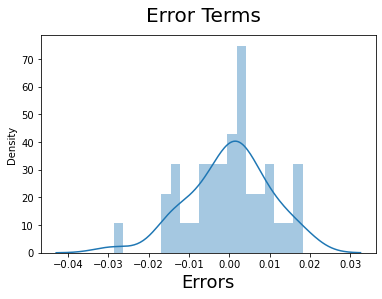

In [303]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [304]:
y_test = df2_test.pop('gmv')
X_test = df2_test

In [305]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'BoomBox', 'DJController', 'Dock', 'DockingStation',
       'FMRadio', 'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer',
       'VoiceRecorder'],
      dtype='object')

In [306]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
6,36,9.0,2015.0,0.251357,0.543614,0.686309,0.328887,0.288268,0.302840,0.466226,...,1.000000,0.0,1.000000,0.000000,0.773960,0.606061,0.401269,0.0,0.0,0.366337
36,66,4.0,2016.0,0.991014,0.586504,0.747992,0.222984,0.674726,0.779526,0.521111,...,0.483871,0.0,0.425532,0.526316,0.728752,0.454545,0.440920,0.0,0.0,0.910891
37,67,4.0,2016.0,0.912958,0.490263,0.697001,0.128704,0.690446,0.802640,0.521746,...,0.419355,0.0,0.638298,0.684211,0.721519,0.878788,0.373910,1.0,0.0,0.881188
28,58,2.0,2016.0,0.551818,0.565463,0.228689,0.988336,0.913530,1.000000,0.572998,...,0.532258,0.0,0.659574,0.210526,0.887884,0.515152,1.000000,0.0,0.0,0.742574
43,73,5.0,2016.0,0.247065,0.356931,0.825802,1.000000,1.000000,0.980708,0.841589,...,0.387097,0.0,0.021277,0.736842,0.571429,0.333333,0.385012,0.0,0.5,1.000000


In [307]:
X_test = X_test[X_train_lm2_3.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,adStock_SEM,HomeAudioSpeaker,VoiceRecorder
6,1.0,0.466226,0.401269,0.366337
36,1.0,0.521111,0.440920,0.910891
37,1.0,0.521746,0.373910,0.881188
28,1.0,0.572998,1.000000,0.742574
43,1.0,0.841589,0.385012,1.000000
49,1.0,0.000000,0.198255,0.257426
5,1.0,0.376183,0.000000,0.000000
33,1.0,0.536829,0.889770,0.811881
20,1.0,1.000000,0.969865,0.386139
42,1.0,0.820395,0.422284,0.950495


In [308]:
# Making predictions using the final model
y_pred = lr3.predict(X_test)

Text(0, 0.5, 'y_pred')

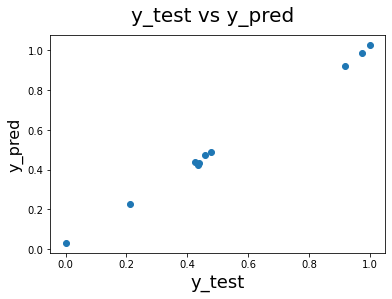

In [309]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Elasticity - Home Audio - Basic Linear model

In [310]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm2_3, y_train2, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

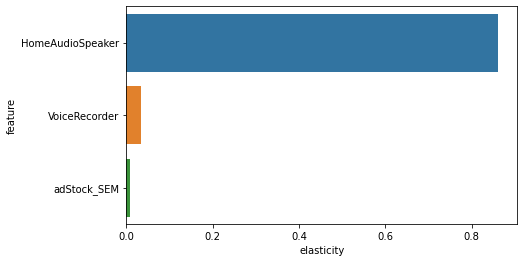

In [311]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

# Building the Multiplicative models

## I. Camera Accessory - Multiplicative model

In [312]:
# taking the camera accessory dataset
final_camera_data.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.0,0.0,4.0,13.0,0.0,14.0,0.0,0.0,1.0,1.0
1,28,7.0,2015.0,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,439.0,0.0,228.0,19.0,0.0,367.0,0.0,0.0,13.0,16.0
2,29,7.0,2015.0,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,495.0,0.0,190.0,23.0,0.0,382.0,0.0,0.0,24.0,22.0
3,30,7.0,2015.0,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,463.0,0.0,198.0,18.0,0.0,425.0,0.0,0.0,23.0,30.0
4,31,8.0,2015.0,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,...,367.0,0.0,118.0,26.0,0.0,235.0,0.0,0.0,23.0,13.0


In [313]:
# Begin by replacing '0' with '0.0000001' to avaoid NAN values when we take log of values in dataset
final_camera_data.replace(0.0, 0.000001).head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,16.0,0.000001,4.0,13.0,0.000001,14.0,0.000001,0.000001,1.0,1.0
1,28,7.000000,2015.000000,0.053833,0.633253,1.853567,0.000233,0.331819,0.136813,1.255924,...,439.0,0.000001,228.0,19.0,0.000001,367.0,0.000001,0.000001,13.0,16.0
2,29,7.000000,2015.000000,0.080749,0.949880,2.780351,0.000350,0.497729,0.205220,1.883887,...,495.0,0.000001,190.0,23.0,0.000001,382.0,0.000001,0.000001,24.0,22.0
3,30,7.000000,2015.000000,0.094207,1.108193,3.243743,0.000408,0.580684,0.239424,2.197868,...,463.0,0.000001,198.0,18.0,0.000001,425.0,0.000001,0.000001,23.0,30.0
4,31,8.000000,2015.000000,0.048713,0.873615,1.887704,0.000206,0.322653,0.138133,1.727316,...,367.0,0.000001,118.0,26.0,0.000001,235.0,0.000001,0.000001,23.0,13.0


In [314]:
# Taking log and dropping the uncotrollable features for the company
df = np.log(final_camera_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [315]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [316]:
# scaling 
scaler = MinMaxScaler()

In [317]:
# checking the features in the dataset
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'Binoculars',
       'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
       'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'ExtensionTube', 'Filter', 'Flash', 'FlashShoeAdapter',
       'Lens', 'ReflectorUmbrella', 'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [318]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Telescope']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [319]:
# assigning x_traim amd y_train values
y_train = df_train.pop('gmv')
X_train = df_train

In [320]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [321]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'discount', 'total_premiumness', 'Binoculars', 'CameraBag',
       'CameraBattery', 'CameraMount', 'CameraRemoteControl', 'CameraTripod',
       'Filter', 'Flash', 'Strap'],
      dtype='object')

In [322]:
# neglecting the features other than top 20 features given by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'sla', 'product_procurement_sla', 'NPS',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day',
       'CameraAccessory', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'ExtensionTube', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Telescope'],
      dtype='object')

In [323]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [324]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4141.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.21e-32
Time:                        21:18:06   Log-Likelihood:                 186.27
No. Observations:                  41   AIC:                            -330.5
Df Residuals:                      20   BIC:                            -294.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,132813.64
6,adStock_ Affiliates,119860.72
8,adStock_Radio,3175.92
9,adStock_Other,3024.36
0,const,2930.08
14,CameraBattery,1912.69
13,CameraBag,1452.43
18,Filter,1364.99
7,adStock_SEM,854.33
16,CameraRemoteControl,640.79


In [325]:
# Let's drop feature units with highest p-value 
X_train_new= X_train_rfe.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4555.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.39e-34
Time:                        21:18:39   Log-Likelihood:                 186.18
No. Observations:                  41   AIC:                            -332.4
Df Residuals:                      21   BIC:                            -298.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,adStock_Online marketing,28746.23
5,adStock_ Affiliates,24798.14
7,adStock_Radio,3121.52
8,adStock_Other,3001.04
0,const,1924.83
13,CameraBattery,1546.32
12,CameraBag,1420.42
17,Filter,982.31
6,adStock_SEM,767.98
16,CameraTripod,639.82


In [326]:
# Let's drop featuree with highest p-value
X_train_new1 = X_train_new.drop(["Strap"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     4943.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.59e-35
Time:                        21:19:21   Log-Likelihood:                 185.79
No. Observations:                  41   AIC:                            -333.6
Df Residuals:                      22   BIC:                            -301.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,adStock_Online marketing,26631.93
5,adStock_ Affiliates,22834.77
7,adStock_Radio,2757.48
8,adStock_Other,2708.13
12,CameraBag,1415.15
13,CameraBattery,1295.04
0,const,1255.73
17,Filter,970.56
6,adStock_SEM,744.45
16,CameraTripod,626.49


In [327]:
# Let's drop feature  with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5080.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.91e-37
Time:                        21:19:46   Log-Likelihood:                 184.27
No. Observations:                  41   AIC:                            -332.5
Df Residuals:                      23   BIC:                            -301.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,adStock_Online marketing,15881.37
4,adStock_ Affiliates,15088.55
6,adStock_Radio,2487.54
7,adStock_Other,2475.31
11,CameraBag,1407.42
0,const,1214.25
16,Filter,969.46
12,CameraBattery,837.11
10,Binoculars,494.39
14,CameraRemoteControl,473.76


In [328]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5294.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.34e-38
Time:                        21:20:11   Log-Likelihood:                 183.00
No. Observations:                  41   AIC:                            -332.0
Df Residuals:                      24   BIC:                            -302.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Radio,2485.82
6,adStock_Other,2471.36
10,CameraBag,1268.68
0,const,1211.16
15,Filter,949.48
11,CameraBattery,804.94
9,Binoculars,481.88
13,CameraRemoteControl,455.79
14,CameraTripod,351.62
1,adStock_TV,282.74


In [329]:
# drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["Binoculars"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5524.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.74e-40
Time:                        21:20:35   Log-Likelihood:                 181.71
No. Observations:                  41   AIC:                            -331.4
Df Residuals:                      25   BIC:                            -304.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Radio,2267.22
6,adStock_Other,2252.19
0,const,1153.64
14,Filter,905.11
9,CameraBag,824.62
10,CameraBattery,772.28
12,CameraRemoteControl,452.72
1,adStock_TV,269.54
13,CameraTripod,267.73
3,adStock_ Affiliates,259.54


In [330]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["Filter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5859.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.79e-42
Time:                        21:20:56   Log-Likelihood:                 180.70
No. Observations:                  41   AIC:                            -331.4
Df Residuals:                      26   BIC:                            -305.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Radio,2186.79
6,adStock_Other,2153.90
0,const,1144.92
10,CameraBattery,719.31
9,CameraBag,532.20
12,CameraRemoteControl,351.16
1,adStock_TV,268.45
3,adStock_ Affiliates,258.38
13,CameraTripod,206.73
8,total_premiumness,168.91


In [331]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6245.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.02e-43
Time:                        21:21:18   Log-Likelihood:                 179.71
No. Observations:                  41   AIC:                            -331.4
Df Residuals:                      27   BIC:                            -307.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,adStock_Radio,1121.40
5,adStock_Other,1115.13
0,const,1099.59
9,CameraBattery,719.31
8,CameraBag,532.13
11,CameraRemoteControl,344.09
12,CameraTripod,206.19
7,total_premiumness,158.25
10,CameraMount,140.30
1,adStock_TV,88.89


In [332]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6644.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.01e-45
Time:                        21:21:44   Log-Likelihood:                 178.60
No. Observations:                  41   AIC:                            -331.2
Df Residuals:                      28   BIC:                            -308.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0979    

,Features,VIF
0,const,788.51
8,CameraBattery,717.01
4,adStock_Other,521.14
3,adStock_Radio,517.19
7,CameraBag,482.79
10,CameraRemoteControl,343.07
11,CameraTripod,173.62
6,total_premiumness,152.65
9,CameraMount,130.43
12,Flash,66.24


In [333]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["CameraMount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6754.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.60e-46
Time:                        21:22:06   Log-Likelihood:                 176.43
No. Observations:                  41   AIC:                            -328.9
Df Residuals:                      29   BIC:                            -308.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1173    

,Features,VIF
8,CameraBattery,650.54
4,adStock_Other,520.78
3,adStock_Radio,516.79
7,CameraBag,475.35
0,const,439.11
9,CameraRemoteControl,336.19
10,CameraTripod,162.67
6,total_premiumness,115.20
11,Flash,57.13
2,adStock_SEM,45.96


In [334]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6787.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.85e-47
Time:                        21:22:38   Log-Likelihood:                 173.88
No. Observations:                  41   AIC:                            -325.8
Df Residuals:                      30   BIC:                            -306.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1200    

,Features,VIF
7,CameraBattery,573.36
6,CameraBag,459.61
0,const,434.05
8,CameraRemoteControl,335.64
9,CameraTripod,160.47
5,total_premiumness,110.58
10,Flash,53.04
2,adStock_SEM,43.08
1,adStock_TV,31.72
3,adStock_Other,6.23


In [335]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7447.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.08e-49
Time:                        21:23:03   Log-Likelihood:                 172.95
No. Observations:                  41   AIC:                            -325.9
Df Residuals:                      31   BIC:                            -308.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1223    

,Features,VIF
5,CameraBag,459.00
6,CameraBattery,457.90
0,const,424.21
7,CameraRemoteControl,275.32
8,CameraTripod,114.68
4,total_premiumness,106.21
9,Flash,51.74
2,adStock_SEM,41.07
1,adStock_TV,30.52
3,discount,4.61


In [336]:
# dropping the feature with highest p-value
X_train_new11= X_train_new10.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8143.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.10e-50
Time:                        21:23:28   Log-Likelihood:                 171.72
No. Observations:                  41   AIC:                            -325.4
Df Residuals:                      32   BIC:                            -310.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1385    

,Features,VIF
4,CameraBag,409.06
5,CameraBattery,345.54
6,CameraRemoteControl,270.64
7,CameraTripod,114.26
0,const,92.72
3,total_premiumness,53.16
8,Flash,23.37
1,adStock_TV,13.20
2,discount,4.49


In [337]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8621.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.33e-52
Time:                        21:23:45   Log-Likelihood:                 169.52
No. Observations:                  41   AIC:                            -323.0
Df Residuals:                      33   BIC:                            -309.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1299    

,Features,VIF
4,CameraBattery,341.66
3,CameraBag,315.09
5,CameraRemoteControl,269.74
6,CameraTripod,93.97
0,const,43.84
7,Flash,14.97
2,total_premiumness,12.63
1,discount,3.21


In [338]:
# # dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["CameraBattery"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5833.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.03e-49
Time:                        21:24:24   Log-Likelihood:                 157.75
No. Observations:                  41   AIC:                            -301.5
Df Residuals:                      34   BIC:                            -289.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1268    

,Features,VIF
4,CameraRemoteControl,267.82
3,CameraBag,152.98
5,CameraTripod,83.54
0,const,43.06
6,Flash,14.93
2,total_premiumness,10.77
1,discount,2.77


In [339]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["CameraBag"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6675.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.35e-51
Time:                        21:24:48   Log-Likelihood:                 156.18
No. Observations:                  41   AIC:                            -300.4
Df Residuals:                      35   BIC:                            -290.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1244    

,Features,VIF
3,CameraRemoteControl,105.58
4,CameraTripod,82.06
0,const,40.14
5,Flash,10.02
2,total_premiumness,8.33
1,discount,2.54


In [340]:
# dropping the feature with highest P-Value
X_train_new15= X_train_new14.drop(["CameraRemoteControl"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8286.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.24e-53
Time:                        21:25:12   Log-Likelihood:                 155.47
No. Observations:                  41   AIC:                            -300.9
Df Residuals:                      36   BIC:                            -292.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1236      0.00

,Features,VIF
0,const,39.57
4,Flash,9.83
3,CameraTripod,8.44
2,total_premiumness,5.35
1,discount,1.83


In [341]:
# dropping the feature with highest vif
X_train_new16= X_train_new15.drop(["Flash"], axis = 1)
 # Add a constant
X_train_lm1 = sm.add_constant(X_train_new16)
  
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.params
print(lr1.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm1 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1 .values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.66e-54
Time:                        21:25:29   Log-Likelihood:                 152.98
No. Observations:                  41   AIC:                            -298.0
Df Residuals:                      37   BIC:                            -291.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1239      0.00

,Features,VIF
0,const,39.56
2,total_premiumness,4.89
3,CameraTripod,4.64
1,discount,1.24


In [ ]:
# Selecting the above model as the First model as all the p-values & VIFs are in the acceptable range

In [342]:
# dropping the feature with highest VIF
X_train_new17= X_train_new16.drop(["total_premiumness"], axis = 1)
 # Add a constant
X_train_lm2 = sm.add_constant(X_train_new17)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.params
print(lr2.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm2 .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2 .values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     91.75
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.84e-15
Time:                        21:25:50   Log-Likelihood:                 51.668
No. Observations:                  41   AIC:                            -97.34
Df Residuals:                      38   BIC:                            -92.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0680      0.069     -0.979   

,Features,VIF
0,const,38.89
1,discount,1.18
2,CameraTripod,1.18


In [343]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top 2 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.9731942195357653
lr model 2 r2_score -0.16225482983884615


In [344]:
import numpy as np
from sklearn import metrics

# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm1, X_train_lm2]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.00020741732191289648
lr model 2 MSE 0.06140671119994705


### Residual Analysis

In [345]:
y_train_price = lr1.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

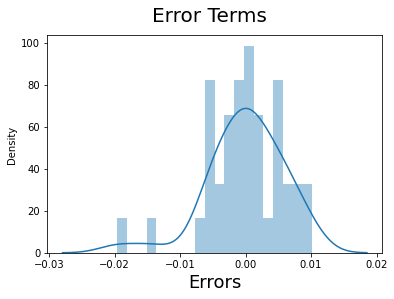

In [348]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [349]:
y_test = df_test.pop('gmv')
X_test = df_test

In [350]:
X_test.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'NPS', 'total_premiumness', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'Binoculars', 'CameraAccessory', 'CameraBag',
       'CameraBattery', 'CameraBatteryCharger', 'CameraBatteryGrip',
       'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone',
       'CameraMount', 'CameraRemoteControl', 'CameraTripod', 'ExtensionTube',
       'Filter', 'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella',
       'Softbox', 'Strap', 'Telescope'],
      dtype='object')

In [351]:
X_test.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
6,3.496508,2.079442,7.608374,0.641584,0.961428,0.808795,0.307112,0.723975,0.735064,0.924300,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
32,4.094345,0.693147,7.608871,0.945554,0.976517,0.916267,0.974538,0.991271,0.998182,0.959709,...,0.993626,0.000000,0.985755,0.982629,0.0,0.978939,0.0,0.0,0.982180,0.959405
38,4.189655,1.386294,7.608871,0.999396,0.953758,0.972906,0.872682,0.975796,0.984710,0.950983,...,0.944196,0.940597,0.984516,0.978435,0.0,0.976377,0.0,1.0,0.982180,0.983937
35,4.143135,1.098612,7.608871,1.000000,0.975885,0.972414,0.932966,0.976753,0.984286,0.952927,...,0.966557,1.000000,1.000000,0.980319,0.0,0.981713,1.0,0.0,0.997147,0.986365
33,4.110874,0.693147,7.608871,0.942760,0.980195,0.918806,0.972148,0.990687,0.997596,0.960290,...,0.996391,0.966883,0.982206,0.994015,0.0,0.973277,0.0,1.0,0.998591,0.981399


In [352]:
X_test = X_test[X_train_lm1.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,discount,total_premiumness,CameraTripod
6,1.0,1.000000,0.000000,0.000000
32,1.0,0.073534,8.670258,0.993626
38,1.0,0.168490,8.515392,0.944196
35,1.0,0.179840,8.557375,0.966557
33,1.0,0.256049,8.582794,0.996391
51,1.0,0.169281,7.480992,0.712998
5,1.0,0.164551,0.000000,0.000000
26,1.0,0.155297,8.501876,1.000000
25,1.0,0.000000,8.240121,0.985990
45,1.0,0.300944,8.465689,0.897660


In [353]:
# Making predictions using the final model
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'y_pred')

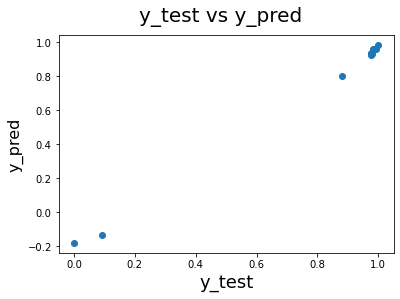

In [354]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

### Elasticity Analysis

In [355]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm1, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

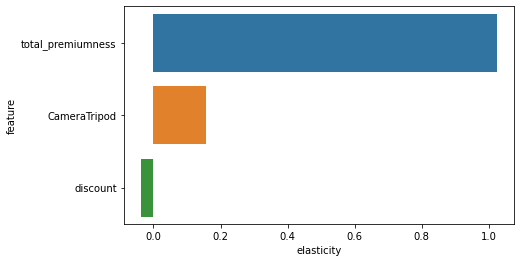

In [356]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

## II. Gaming Accessory - Multiplicative model

In [357]:
# replacing '0.0' with '0.0000001' and taking log of the dataset to avaoid the nana values for log 0
df = np.log(final_gaming_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [358]:
df.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
0,3.295837,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,...,-13.815511,2.484907,0.693147,0.000000,2.564949,1.098612,-13.815511,0.693147,0.000000,0.000000
1,3.332205,1.945910,7.608374,-2.921877,-0.456885,0.617112,-8.363510,-1.103164,-1.989137,0.227872,...,-13.815511,5.176150,6.045005,3.583519,6.874198,5.241747,-13.815511,2.397895,2.772589,4.304065
2,3.367296,1.945910,7.608374,-2.516412,-0.051419,1.022577,-7.958044,-0.697699,-1.583672,0.633337,...,-13.815511,5.187386,5.087596,3.332205,5.880533,4.465908,-13.815511,2.079442,2.397895,4.564348
3,3.401197,1.945910,7.608374,-2.362261,0.102731,1.176728,-7.803894,-0.543549,-1.429521,0.787488,...,-13.815511,5.645447,5.135798,3.637586,6.107023,4.634729,-13.815511,2.197225,2.397895,4.553877
4,3.433987,2.079442,7.608374,-3.021809,-0.135115,0.635362,-8.489322,-1.131178,-1.979540,0.546569,...,-13.815511,6.049733,4.262680,2.484907,5.451038,4.204693,0.000000,2.890372,2.079442,4.406719


In [359]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.20, random_state = 100)

In [360]:
# initialising scaler
scaler = MinMaxScaler()

In [361]:
# checking the columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'NPS', 'discount', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
       'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [362]:
# Apply scaler() to all the columns except the categorical features
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [363]:
# assigning the values for x_train and y_train
y_train = df_train.pop('gmv')
X_train = df_train

In [364]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [365]:
# selecting the top 20 features given by rfe
col = X_train.columns[rfe.support_]
col

Index(['adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'sla', 'product_procurement_sla',
       'discount', 'total_premiumness', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingHeadset', 'GamingKeyboard', 'GamingMouse',
       'JoystickGamingWheel', 'TVOutCableAccessory'],
      dtype='object')

In [366]:
# neglecting the features not selected in top 20 by rfe
X_train.columns[~rfe.support_]

Index(['order_week', 'Month', 'Year', 'adStock_Content Marketing', 'NPS',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'CoolingPad',
       'GameControlMount', 'GamingChargingStation', 'GamingMemoryCard',
       'GamingMousePad', 'GamingSpeaker', 'MotionController'],
      dtype='object')

In [367]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [368]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2697.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.96e-31
Time:                        21:30:31   Log-Likelihood:                 174.13
No. Observations:                  42   AIC:                            -306.3
Df Residuals:                      21   BIC:                            -269.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_Online marketing,17363.84
5,adStock_ Affiliates,17123.66
0,const,15083.20
8,adStock_Other,4125.67
7,adStock_Radio,4113.06
12,total_premiumness,1968.21
14,GamingAccessoryKit,1237.69
18,GamingMouse,725.27
16,GamingHeadset,575.00
15,GamingAdapter,469.28


In [369]:
# Let's drop feature  with highest p-value
X_train_new= X_train_rfe.drop(["JoystickGamingWheel"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2947.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.88e-33
Time:                        21:30:54   Log-Likelihood:                 173.94
No. Observations:                  42   AIC:                            -307.9
Df Residuals:                      22   BIC:                            -273.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_Online marketing,17346.82
5,adStock_ Affiliates,17075.54
0,const,13436.09
8,adStock_Other,4045.45
7,adStock_Radio,4017.03
12,total_premiumness,1697.07
14,GamingAccessoryKit,1236.31
18,GamingMouse,650.32
16,GamingHeadset,506.00
15,GamingAdapter,466.68


In [370]:
# Let's drop with highest p-value
X_train_new1 = X_train_new.drop(["GamingKeyboard"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3193.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.21e-35
Time:                        21:31:16   Log-Likelihood:                 173.55
No. Observations:                  42   AIC:                            -309.1
Df Residuals:                      23   BIC:                            -276.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_Online marketing,17259.77
5,adStock_ Affiliates,16916.45
0,const,13321.01
7,adStock_Radio,3129.34
8,adStock_Other,3106.21
12,total_premiumness,1479.49
14,GamingAccessoryKit,1188.43
17,GamingMouse,649.28
16,GamingHeadset,504.04
18,TVOutCableAccessory,445.03


In [371]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3502.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.47e-36
Time:                        21:31:40   Log-Likelihood:                 173.40
No. Observations:                  42   AIC:                            -310.8
Df Residuals:                      24   BIC:                            -279.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,12756.45
5,adStock_ Affiliates,7298.87
4,adStock_Online marketing,6236.03
11,total_premiumness,1416.95
13,GamingAccessoryKit,1051.43
16,GamingMouse,641.89
15,GamingHeadset,482.33
14,GamingAdapter,439.70
12,GamePad,328.16
17,TVOutCableAccessory,319.13


In [372]:
# Let's remove feature  with highest p-value
X_train_new3 = X_train_new2.drop(["GamingAccessoryKit"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3811.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.84e-38
Time:                        21:32:02   Log-Likelihood:                 173.04
No. Observations:                  42   AIC:                            -312.1
Df Residuals:                      25   BIC:                            -282.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,11570.40
5,adStock_ Affiliates,6947.35
4,adStock_Online marketing,5904.68
11,total_premiumness,1373.27
15,GamingMouse,542.71
14,GamingHeadset,396.58
13,GamingAdapter,370.75
6,adStock_SEM,317.28
12,GamePad,304.96
1,adStock_TV,293.57


In [373]:
# Let's drop feature  with higest p-value
X_train_new4 = X_train_new3.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4080.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.76e-40
Time:                        21:32:23   Log-Likelihood:                 172.30
No. Observations:                  42   AIC:                            -312.6
Df Residuals:                      26   BIC:                            -284.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,8626.87
5,adStock_ Affiliates,6663.07
4,adStock_Online marketing,5694.36
10,total_premiumness,1066.04
14,GamingMouse,352.79
13,GamingHeadset,322.26
6,adStock_SEM,308.95
12,GamingAdapter,297.97
1,adStock_TV,271.08
11,GamePad,251.72


In [374]:
# dropping the feature with highest p-value
X_train_new5 = X_train_new4.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4310.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.96e-41
Time:                        21:32:51   Log-Likelihood:                 171.21
No. Observations:                  42   AIC:                            -312.4
Df Residuals:                      27   BIC:                            -286.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,4860.46
0,const,4274.40
4,adStock_ Affiliates,4272.56
9,total_premiumness,608.86
11,GamingAdapter,289.47
12,GamingHeadset,208.64
13,GamingMouse,200.43
14,TVOutCableAccessory,197.64
10,GamePad,196.91
5,adStock_SEM,170.18


In [375]:
# dropping the feature with highest p-value
X_train_new6 = X_train_new5.drop(["product_procurement_sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4739.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.43e-43
Time:                        21:33:18   Log-Likelihood:                 170.88
No. Observations:                  42   AIC:                            -313.8
Df Residuals:                      28   BIC:                            -289.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,4855.43
4,adStock_ Affiliates,4269.83
0,const,3723.80
8,total_premiumness,550.40
10,GamingAdapter,289.45
11,GamingHeadset,200.66
13,TVOutCableAccessory,194.79
9,GamePad,191.86
12,GamingMouse,183.32
5,adStock_SEM,166.84


In [376]:
# dropping the feature with highest p-value
X_train_new7= X_train_new6.drop(["GamePad"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4985.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.16e-44
Time:                        21:33:39   Log-Likelihood:                 169.53
No. Observations:                  42   AIC:                            -313.1
Df Residuals:                      29   BIC:                            -290.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,4802.38
4,adStock_ Affiliates,4182.64
0,const,2704.34
9,GamingAdapter,267.97
12,TVOutCableAccessory,172.72
5,adStock_SEM,165.06
8,total_premiumness,152.89
10,GamingHeadset,135.00
11,GamingMouse,121.44
1,adStock_Digital,80.31


In [377]:
# dropping the feature with highest p-value
X_train_new8= X_train_new7.drop(["GamingAdapter"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4969.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.67e-46
Time:                        21:34:02   Log-Likelihood:                 166.92
No. Observations:                  42   AIC:                            -309.8
Df Residuals:                      30   BIC:                            -289.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,4183.98
4,adStock_ Affiliates,3781.80
0,const,1598.35
5,adStock_SEM,137.94
8,total_premiumness,135.86
11,TVOutCableAccessory,127.62
1,adStock_Digital,72.35
9,GamingHeadset,64.86
10,GamingMouse,56.94
2,adStock_Sponsorship,56.15


In [378]:
# dropping the feature with highest p-value
X_train_new9= X_train_new8.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5369.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.72e-47
Time:                        21:34:21   Log-Likelihood:                 165.86
No. Observations:                  42   AIC:                            -309.7
Df Residuals:                      31   BIC:                            -290.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,3964.93
4,adStock_ Affiliates,3497.82
0,const,1581.62
5,adStock_SEM,137.40
7,total_premiumness,130.76
10,TVOutCableAccessory,125.54
1,adStock_Digital,69.03
8,GamingHeadset,64.71
9,GamingMouse,56.85
2,adStock_Sponsorship,56.15


In [379]:
# dropping the feature with highest p-value
X_train_new10= X_train_new9.drop(["GamingMouse"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5964.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.60e-49
Time:                        21:34:45   Log-Likelihood:                 165.18
No. Observations:                  42   AIC:                            -310.4
Df Residuals:                      32   BIC:                            -293.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,3350.91
4,adStock_ Affiliates,3043.86
0,const,226.22
5,adStock_SEM,123.75
7,total_premiumness,92.03
9,TVOutCableAccessory,72.32
1,adStock_Digital,62.77
2,adStock_Sponsorship,43.32
8,GamingHeadset,5.19
6,discount,4.81


In [380]:
# dropping the feature with highest p-value

X_train_new11= X_train_new10.drop(["TVOutCableAccessory"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
   
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5746.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.38e-49
Time:                        21:35:17   Log-Likelihood:                 161.29
No. Observations:                  42   AIC:                            -304.6
Df Residuals:                      33   BIC:                            -288.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
3,adStock_Online marketing,3271.82
4,adStock_ Affiliates,2968.89
5,adStock_SEM,109.90
0,const,98.20
1,adStock_Digital,61.79
2,adStock_Sponsorship,42.09
7,total_premiumness,8.60
8,GamingHeadset,5.19
6,discount,2.04


In [381]:
# dropping the feature with highest p-value
X_train_new12= X_train_new11.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5884.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.73e-50
Time:                        21:36:00   Log-Likelihood:                 158.36
No. Observations:                  42   AIC:                            -300.7
Df Residuals:                      34   BIC:                            -286.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
4,adStock_SEM,106.23
0,const,90.63
1,adStock_Digital,54.83
2,adStock_Sponsorship,35.64
3,adStock_Online marketing,30.41
6,total_premiumness,7.54
7,GamingHeadset,5.18
5,discount,1.96


In [382]:
# dropping the feature with highest vif
X_train_new13= X_train_new12.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5403.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.13e-50
Time:                        21:36:41   Log-Likelihood:                 152.72
No. Observations:                  42   AIC:                            -291.4
Df Residuals:                      35   BIC:                            -279.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,84.50
2,adStock_Sponsorship,34.25
3,adStock_Online marketing,21.96
1,adStock_Digital,10.55
5,total_premiumness,7.30
6,GamingHeadset,5.14
4,discount,1.87


In [383]:
# dropping the feature with highest p-value
X_train_new14= X_train_new13.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)
     
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6316.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.56e-52
Time:                        21:37:04   Log-Likelihood:                 151.58
No. Observations:                  42   AIC:                            -291.2
Df Residuals:                      36   BIC:                            -280.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,78.17
2,adStock_Online marketing,20.02
1,adStock_Sponsorship,14.73
4,total_premiumness,7.24
5,GamingHeadset,5.09
3,discount,1.78


In [384]:
# dropping the feature on the basis of highest VIF
X_train_new15= X_train_new14.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6569.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.37e-52
Time:                        21:37:30   Log-Likelihood:                 147.15
No. Observations:                  42   AIC:                            -284.3
Df Residuals:                      37   BIC:                            -275.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0674    

,Features,VIF
0,const,72.95
3,total_premiumness,6.90
4,GamingHeadset,5.03
1,adStock_Sponsorship,2.31
2,discount,1.47


In [391]:
# dropping the feature on the basis of highest P-Value
X_train_new17= X_train_new15.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new17)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8933.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.72e-54
Time:                        21:43:03   Log-Likelihood:                 147.01
No. Observations:                  42   AIC:                            -286.0
Df Residuals:                      38   BIC:                            -279.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0705      0.00

,Features,VIF
0,const,47.15
2,total_premiumness,4.82
3,GamingHeadset,4.37
1,discount,1.22


In [390]:
# Model 2
# dropping the feature on the basis of highest vif
X_train_new18= X_train_new15.drop(["total_premiumness"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new18)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     85.00
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.57e-17
Time:                        21:42:47   Log-Likelihood:                 52.141
No. Observations:                  42   AIC:                            -96.28
Df Residuals:                      38   BIC:                            -89.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3830    

,Features,VIF
0,const,52.36
1,adStock_Sponsorship,1.61
2,discount,1.47
3,GamingHeadset,1.15


In [392]:
# Model 
# dropping the feature on the basis of highest vif
X_train_new19= X_train_new18.drop(["discount"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new19)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.54e-18
Time:                        21:43:42   Log-Likelihood:                 52.038
No. Observations:                  42   AIC:                            -98.08
Df Residuals:                      39   BIC:                            -92.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3865    

,Features,VIF
0,const,51.86
1,adStock_Sponsorship,1.15
2,GamingHeadset,1.15


In [393]:
# k-fold Cross Validation - Adjusted R-squared
lm = LinearRegression()
#Checking performance of top model finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='r2', cv=5)
    print("lr model",i+1,"r2_score", scores.mean())

lr model 1 r2_score 0.3748515151166326


In [394]:
# k-fold Cross Validation - MSE
lm = LinearRegression()
#Checking performance of top 4 models finding Adjusted R-squared
x_trains = [X_train_lm]
for i in range(0,len(x_trains)):
    x_test = x_trains[i]
    scores = cross_val_score(lm, x_test, y_train , scoring='neg_mean_squared_error', cv=5)
    print("lr model",i+1,"MSE", -scores.mean())

lr model 1 MSE 0.028493367465232795


### Elasticity

In [395]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

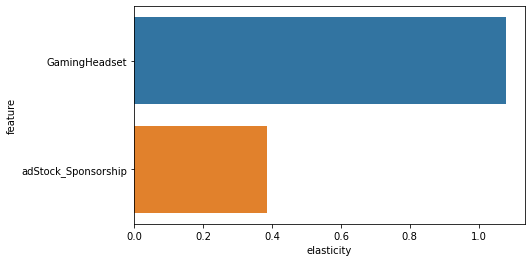

In [396]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Residual Analysis

In [397]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

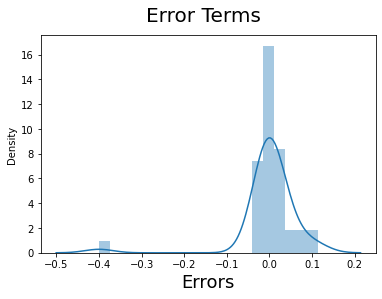

In [398]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Model Evaluation

In [399]:
# y_test = df_test.pop('gmv')
X_test = df_test

In [400]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test.head()

,const,adStock_Sponsorship,GamingHeadset
25,1.0,1.000000,0.979914
48,1.0,0.968478,0.914167
52,1.0,0.000000,0.808548
37,1.0,0.979193,0.869835
6,1.0,0.809864,0.000000


In [401]:
# Making predictions using the model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

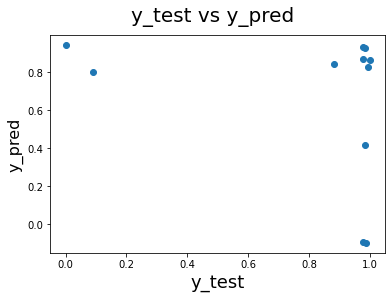

In [402]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

## III. Home Audio - Multiplicative model

In [403]:
#Creating df with removal of features uncontrollable by the company, also, replacing 0.0 with lowest value to handle infinity given by log
df = np.log(final_home_audio_data.replace(0.0, 0.000001).drop(['selling_price','units','product_mrp','total_transactions'], axis = 1))

In [404]:
#Checking the dataset
df.head()

,order_week,Month,Year,adStock_TV,adStock_Digital,adStock_Sponsorship,adStock_Content Marketing,adStock_Online marketing,adStock_ Affiliates,adStock_SEM,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,3.295837,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,-13.815511,...,1.386294,-13.815511,-13.815511,-13.815511,1.386294,-13.815511,3.688879,-13.815511,-13.815511,-13.815511
1,3.332205,1.945910,7.608374,-2.921877,-0.456885,0.617112,-8.363510,-1.103164,-1.989137,0.227872,...,4.094345,-13.815511,3.401197,0.000000,6.182085,2.564949,7.201171,-13.815511,-13.815511,3.178054
2,3.367296,1.945910,7.608374,-2.516412,-0.051419,1.022577,-7.958044,-0.697699,-1.583672,0.633337,...,4.043051,-13.815511,3.912023,0.000000,6.304449,3.295837,7.353082,-13.815511,-13.815511,3.258097
3,3.401197,1.945910,7.608374,-2.362261,0.102731,1.176728,-7.803894,-0.543549,-1.429521,0.787488,...,4.174387,-13.815511,4.007333,-13.815511,6.280396,2.995732,7.229839,-13.815511,-13.815511,3.044522
4,3.433987,2.079442,7.608374,-3.021809,-0.135115,0.635362,-8.489322,-1.131178,-1.979540,0.546569,...,3.610918,-13.815511,3.784190,-13.815511,5.929589,2.397895,6.863803,-13.815511,-13.815511,2.639057


In [405]:
#Test-train split
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [406]:
scaler = MinMaxScaler()

In [407]:
#Checking columns
df.columns

Index(['order_week', 'Month', 'Year', 'adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_premiumness',
       'total_holidays', 'is_holiday', 'total_special_sale_days',
       'is_special_sale_day', 'total_pay_days', 'is_pay_day', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [408]:
# Apply scaler() to all the columns except the categorical ones
num_vars=['adStock_TV', 'adStock_Digital',
       'adStock_Sponsorship', 'adStock_Content Marketing',
       'adStock_Online marketing', 'adStock_ Affiliates', 'adStock_SEM',
       'adStock_Radio', 'adStock_Other', 'gmv', 'sla',
       'product_procurement_sla', 'discount', 'NPS', 'total_holidays',
       'total_special_sale_days',
       'total_pay_days', 'BoomBox',
       'DJController', 'Dock', 'DockingStation', 'FMRadio', 'HiFiSystem',
       'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'VoiceRecorder']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [409]:
y_train = df_train.pop('gmv')
X_train = df_train

In [410]:
# Running RFE for selecting top 20 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [411]:
#Extracting selected columns by RFE into a list
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'adStock_TV', 'adStock_Digital', 'adStock_Sponsorship',
       'adStock_Content Marketing', 'adStock_Online marketing',
       'adStock_ Affiliates', 'adStock_SEM', 'adStock_Radio', 'adStock_Other',
       'sla', 'NPS', 'total_holidays', 'is_holiday', 'Dock', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SoundMixer', 'VoiceRecorder'],
      dtype='object')

In [412]:
#Columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['Month', 'Year', 'product_procurement_sla', 'discount',
       'total_premiumness', 'total_special_sale_days', 'is_special_sale_day',
       'total_pay_days', 'is_pay_day', 'BoomBox', 'DJController',
       'DockingStation', 'SlingBox'],
      dtype='object')

In [413]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [414]:
 # Add a constant
X_train_lm = sm.add_constant(X_train_rfe)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3337.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.39e-29
Time:                        21:46:02   Log-Likelihood:                 185.69
No. Observations:                  40   AIC:                            -329.4
Df Residuals:                      19   BIC:                            -293.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
6,adStock_Online marketing,106059.30
7,adStock_ Affiliates,94417.05
0,const,8359.58
9,adStock_Radio,3348.46
10,adStock_Other,3232.09
13,total_holidays,1452.50
14,is_holiday,1429.61
8,adStock_SEM,657.86
2,adStock_TV,656.41
4,adStock_Sponsorship,394.79


In [415]:
# Let's drop feature with highest p-value
X_train_new= X_train_rfe.drop(["adStock_Digital"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3685.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.30e-31
Time:                        21:46:24   Log-Likelihood:                 185.62
No. Observations:                  40   AIC:                            -331.2
Df Residuals:                      20   BIC:                            -297.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,62810.33
6,adStock_ Affiliates,57371.93
0,const,8264.11
8,adStock_Radio,2282.54
9,adStock_Other,2253.36
12,total_holidays,1451.62
13,is_holiday,1428.52
2,adStock_TV,505.36
3,adStock_Sponsorship,291.09
14,Dock,181.52


In [416]:
# Let's drop feature with highest p-value
X_train_new1 = X_train_new.drop(["VoiceRecorder"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new1)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3969.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.75e-33
Time:                        21:46:49   Log-Likelihood:                 185.05
No. Observations:                  40   AIC:                            -332.1
Df Residuals:                      21   BIC:                            -300.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,53783.13
6,adStock_ Affiliates,49742.58
0,const,7692.11
8,adStock_Radio,2263.34
9,adStock_Other,2244.58
12,total_holidays,1438.03
13,is_holiday,1417.42
2,adStock_TV,482.75
3,adStock_Sponsorship,286.26
16,HiFiSystem,160.40


In [417]:
# Let's drop feature with highest p-value
X_train_new2 = X_train_new1.drop(["NPS"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new2)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4291.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           9.25e-35
Time:                        21:47:14   Log-Likelihood:                 184.53
No. Observations:                  40   AIC:                            -333.1
Df Residuals:                      22   BIC:                            -302.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,53525.50
6,adStock_ Affiliates,49383.33
0,const,7433.04
8,adStock_Radio,1545.98
9,adStock_Other,1507.11
11,total_holidays,1435.30
12,is_holiday,1413.37
2,adStock_TV,353.59
3,adStock_Sponsorship,285.96
15,HiFiSystem,153.20


In [418]:
# Let's remove feature with highest p-value
X_train_new3 = X_train_new2.drop(["adStock_Radio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new3)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4443.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.93e-36
Time:                        21:47:43   Log-Likelihood:                 183.13
No. Observations:                  40   AIC:                            -332.3
Df Residuals:                      23   BIC:                            -303.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,45040.89
6,adStock_ Affiliates,43228.88
0,const,7380.05
10,total_holidays,1434.08
11,is_holiday,1412.77
2,adStock_TV,286.62
3,adStock_Sponsorship,284.34
14,HiFiSystem,138.88
4,adStock_Content Marketing,112.04
12,Dock,104.06


In [419]:
# Let's drop feature with higest p-value
X_train_new4 = X_train_new3.drop(["HiFiSystem"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new4)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4582.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.01e-37
Time:                        21:48:03   Log-Likelihood:                 181.61
No. Observations:                  40   AIC:                            -331.2
Df Residuals:                      24   BIC:                            -304.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,adStock_Online marketing,45022.93
6,adStock_ Affiliates,43173.20
0,const,7373.32
10,total_holidays,1412.81
11,is_holiday,1390.79
2,adStock_TV,266.51
3,adStock_Sponsorship,231.29
12,Dock,101.75
4,adStock_Content Marketing,99.39
7,adStock_SEM,81.54


In [420]:
# Let's drop feature with higest vif
X_train_new5 = X_train_new4.drop(["adStock_Online marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new5)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3700.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.83e-38
Time:                        21:48:39   Log-Likelihood:                 175.14
No. Observations:                  40   AIC:                            -320.3
Df Residuals:                      25   BIC:                            -294.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,7266.11
9,total_holidays,1329.94
10,is_holiday,1315.24
5,adStock_ Affiliates,168.39
2,adStock_TV,97.82
11,Dock,95.04
6,adStock_SEM,71.97
3,adStock_Sponsorship,70.43
12,FMRadio,28.90
4,adStock_Content Marketing,14.75


In [421]:
# Let's drop feature with higest p-value
X_train_new6 = X_train_new5.drop(["adStock_TV"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new6)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4135.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.22e-39
Time:                        21:49:12   Log-Likelihood:                 175.09
No. Observations:                  40   AIC:                            -322.2
Df Residuals:                      26   BIC:                            -298.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,7153.98
8,total_holidays,1312.29
9,is_holiday,1297.20
10,Dock,93.65
4,adStock_ Affiliates,90.16
5,adStock_SEM,64.86
2,adStock_Sponsorship,57.50
11,FMRadio,28.76
3,adStock_Content Marketing,13.89
12,HomeAudioSpeaker,12.01


In [422]:
# Let's drop feature with higest p-value
X_train_new7= X_train_new6.drop(["adStock_ Affiliates"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new7)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4533.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.45e-41
Time:                        21:49:33   Log-Likelihood:                 174.58
No. Observations:                  40   AIC:                            -323.2
Df Residuals:                      27   BIC:                            -301.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,6676.78
7,total_holidays,1311.20
8,is_holiday,1295.45
9,Dock,60.55
4,adStock_SEM,59.24
2,adStock_Sponsorship,57.42
10,FMRadio,28.02
11,HomeAudioSpeaker,11.78
6,sla,10.16
1,order_week,8.25


In [423]:
# Let's drop feature with higest p-value
X_train_new8= X_train_new7.drop(["adStock_SEM"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new8)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4783.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.79e-43
Time:                        21:50:00   Log-Likelihood:                 173.18
No. Observations:                  40   AIC:                            -322.4
Df Residuals:                      28   BIC:                            -302.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,6488.65
6,total_holidays,1286.41
7,is_holiday,1271.85
8,Dock,51.38
2,adStock_Sponsorship,37.75
9,FMRadio,25.14
10,HomeAudioSpeaker,10.18
5,sla,9.61
1,order_week,8.19
3,adStock_Content Marketing,5.47


In [424]:
# Let's drop feature with higest P-Value

X_train_new9= X_train_new8.drop(["adStock_Sponsorship"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new9)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5228.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.10e-44
Time:                        21:50:35   Log-Likelihood:                 172.35
No. Observations:                  40   AIC:                            -322.7
Df Residuals:                      29   BIC:                            -304.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,6131.82
5,total_holidays,1269.26
6,is_holiday,1256.73
8,FMRadio,24.52
7,Dock,13.45
4,sla,8.81
9,HomeAudioSpeaker,7.96
1,order_week,7.33
2,adStock_Content Marketing,4.29
3,adStock_Other,3.89


In [425]:
# Let's drop feature with higest vif
X_train_new10= X_train_new9.drop(["total_holidays"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new10)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4800.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.59e-45
Time:                        21:51:13   Log-Likelihood:                 167.86
No. Observations:                  40   AIC:                            -315.7
Df Residuals:                      30   BIC:                            -298.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,926.24
7,FMRadio,23.84
6,Dock,13.37
4,sla,8.74
1,order_week,7.12
8,HomeAudioSpeaker,6.91
2,adStock_Content Marketing,4.19
3,adStock_Other,3.47
9,SoundMixer,1.46
5,is_holiday,1.38


In [426]:
# Let's drop feature with higest p-value
X_train_new11= X_train_new10.drop(["is_holiday"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new11)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4889.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.56e-46
Time:                        21:51:43   Log-Likelihood:                 165.22
No. Observations:                  40   AIC:                            -312.4
Df Residuals:                      31   BIC:                            -297.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,924.18
6,FMRadio,23.53
5,Dock,13.05
4,sla,8.29
1,order_week,7.11
7,HomeAudioSpeaker,6.85
2,adStock_Content Marketing,4.19
3,adStock_Other,3.28
8,SoundMixer,1.45


In [427]:
# Let's drop feature with higest vif
X_train_new12= X_train_new11.drop(["FMRadio"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new12)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3488.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.95e-44
Time:                        21:52:10   Log-Likelihood:                 155.17
No. Observations:                  40   AIC:                            -294.3
Df Residuals:                      32   BIC:                            -280.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,918.55
5,Dock,10.43
1,order_week,7.06
4,sla,5.26
6,HomeAudioSpeaker,4.69
2,adStock_Content Marketing,3.36
3,adStock_Other,3.28
7,SoundMixer,1.40


In [428]:
# Let's drop feature with higest p-value
X_train_new13= X_train_new12.drop(["sla"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new13)
    
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4070.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           7.17e-46
Time:                        21:52:27   Log-Likelihood:                 154.56
No. Observations:                  40   AIC:                            -295.1
Df Residuals:                      33   BIC:                            -283.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,727.53
1,order_week,5.44
5,HomeAudioSpeaker,4.23
4,Dock,3.71
2,adStock_Content Marketing,3.27
3,adStock_Other,3.27
6,SoundMixer,1.39


In [429]:
# Let's drop feature with higest p-value
X_train_new14= X_train_new13.drop(["adStock_Other"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new14)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4414.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.83e-47
Time:                        21:52:47   Log-Likelihood:                 151.94
No. Observations:                  40   AIC:                            -291.9
Df Residuals:                      34   BIC:                            -281.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,296.36
4,HomeAudioSpeaker,4.09
3,Dock,3.67
2,adStock_Content Marketing,2.77
1,order_week,1.94
5,SoundMixer,1.34


In [430]:
# Let's drop feature with higest p-vlue
X_train_new15= X_train_new14.drop(["adStock_Content Marketing"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new15)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5280.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.92e-48
Time:                        21:53:21   Log-Likelihood:                 150.49
No. Observations:                  40   AIC:                            -291.0
Df Residuals:                      35   BIC:                            -282.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0263      0.014  

,Features,VIF
0,const,219.00
2,Dock,3.60
3,HomeAudioSpeaker,3.55
1,order_week,1.35
4,SoundMixer,1.31


In [431]:
# Let's drop feature with higest p-value
X_train_new16= X_train_new15.drop(["order_week"], axis = 1)
 # Add a constant
X_train_lm = sm.add_constant(X_train_new16)
    # Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())
vif = pd.DataFrame()
vif['Features'] = X_train_lm .columns
vif['VIF'] = [variance_inflation_factor(X_train_lm .values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6366.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.26e-49
Time:                        21:53:41   Log-Likelihood:                 147.92
No. Observations:                  40   AIC:                            -287.8
Df Residuals:                      36   BIC:                            -281.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0016      0.006  

,Features,VIF
0,const,38.95
2,HomeAudioSpeaker,3.55
1,Dock,3.54
3,SoundMixer,1.01


In [432]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='r2', cv=10)
scores.mean()

0.9364152011272109

In [433]:
# k-fold Cross validation
lm = LinearRegression()
scores = cross_val_score(lm, X_train_lm, y_train, scoring='neg_mean_squared_error', cv=10)
-scores.mean()

0.00011614847731283424

### Residual Analysis

In [434]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

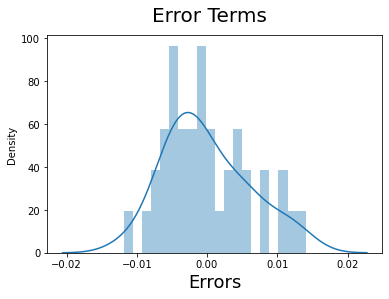

In [435]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Elasticity

In [436]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

<AxesSubplot:xlabel='elasticity', ylabel='feature'>

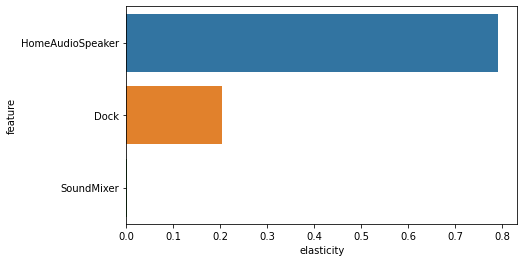

In [437]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))

### Model Evaluation

In [438]:
X_test = df_test
y_test = df_test.pop('gmv')

In [439]:
X_test = X_test[X_train_lm.drop('const', axis = 1).columns]
X_test = sm.add_constant(X_test)
X_test

,const,Dock,HomeAudioSpeaker,SoundMixer
6,1.0,1.000000,0.883505,0.000000
36,1.0,0.951634,0.895523,0.000000
37,1.0,0.974586,0.874499,0.000000
28,1.0,0.976442,1.000000,0.000000
43,1.0,0.782055,0.878230,0.954404
49,1.0,0.844244,0.793622,0.000000
5,1.0,0.000000,0.000000,0.000000
33,1.0,0.992269,0.985096,0.000000
20,1.0,0.990871,0.996095,0.000000
42,1.0,0.844244,0.890015,1.000000


In [440]:
# Making predictions using the fourth model
y_pred = lr.predict(X_test)

Text(0, 0.5, 'y_pred')

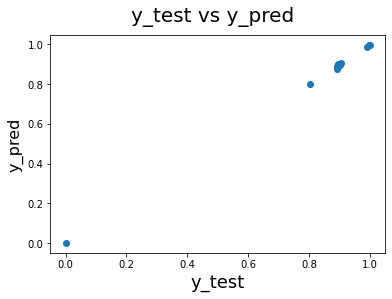

In [441]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   